# Project 2 : Programming for Data Analyis
***


## TABLE OF CONTENTS
- Introducion
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present
- Examine Irish context( Rainfall and Temperature)
- Examine one other (paleo/modern) feature: Methane (CH4)
- Fuse and analyse data
- Analyse the data, the trends and the relationships between variables
- Predict global temperature anomaly over next few decades
- Examine Irish context(CO2)
- Conclusion (Comment on accelerated warming)

## INTRODUCTION
The European Project for Ice Coring in Antarctica (EPICA) is a multinational European project for deep ice core drilling in Antarctica. Its main objective is to obtain full documentation of the climatic and atmospheric record archived in Antarctic ice by drilling and analyzing ice cores. Evaluation of these records provides information about the natural climate variability and mechanisms of rapid climatic changes during the last glacial epoch going back 800,000 years.

The European Science Foundation EPICA Programme (1996–2005) provides co-ordination for EPICA drilling activities at Dome Concordia and Kohnen Station, which are supported by the European Commission and by national contributions from Belgium, Denmark, France, Germany, Italy, the Netherlands, Norway, Sweden, Switzerland and the United Kingdom.

Deep drilling took place at two sites in Antarctica: Concordia Station at Dome C and Kohnen Station.

In 2008 the project received the Descartes Prize for Research.[51]

Changes in past atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica. So far, the Antarctic Vostok and EPICA Dome C ice cores have provided a composite record of atmospheric carbon dioxide levels over the past 650,000 years. Here we present results of the lowest 200 m of the Dome C ice core, extending the record of atmospheric carbon dioxide concentration by two complete glacial cycles to 800,000 yr before present.[52]

***
## Analyse CO2 vs Temperature Anomaly from 800kyrs – present
***

### Import python libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.neighbors as nei
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import fileinput
from scipy.interpolate import interp1d
#import pyleoclim as pyleo
#pyleo.set_style('web')

## About  Luthi et al. 2008 Nature Paper
From previously published data and the present work, they find that atmospheric carbon dioxide is strongly correlated with Antarctic temperature throughout eight glacial cycles but with significantly lower concentrations between 650,000 and 750,000 yr before present. Carbon dioxide levels are below 180 parts per million by volume (p.p.m.v.) for a period of 3,000 yr during Marine Isotope Stage 16, possibly reflecting more pronounced oceanic carbon storage. We report the lowest carbon dioxide concentration measured in an ice core, which extends the pre-industrial range of carbon dioxide concentrations during the late Quaternary by about 10 p.p.m.v. to 172–300 p.p.m.v.[52]

### Import dataset : CO2 data from Luthi et al. 2008 Nature Paper (New CO2 Data)
Pandas is a powerful, fast, flexible open-source library used for data analysis and manipulations of data frames/datasets. Pandas can be used to read and write data in a dataset of different formats like CSV(comma separated values), txt, xls(Microsoft Excel) etc.[57]

In [2]:
df = pd.read_excel('./data/41586_2008_BFnature06949_MOESM31_ESM.xls', skiprows=range(0, 6))

#### Display dataset in the jupyter notebook
A Pandas dataframe is a two-dimensional, mutable, and potentially heterogeneous data structure with labeled rows and columns. It serves as a container for Series objects and is a fundamental structure in Pandas, facilitating various operations with aligned row and column labels. Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.[60]

In [3]:
df

Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0      3026.58           611269       257.8           2.1      3061.71   
1      3030.97           616164       252.6           0.6      3063.98   
2      3036.44           623109       243.3           2.8      3085.78   
3      3040.87           630183       204.4           0.9      3086.88   
4      3043.07           635364       195.0           1.5      3087.98   
..         ...              ...         ...           ...          ...   
242    3187.87           794608       199.4           1.7          NaN   
243    3188.23           795202       195.2           2.0          NaN   
244    3188.98           796467       189.3           2.1          NaN   
245    3189.33           797099       188.4           1.4          NaN   
246    3190.08           798512       191.0           2.2          NaN   

     EDC3_gas_a (yr).1  CO2 (ppmv).1  
0             667435.0         178.5  
1             670124.0         189.0  
2             688035.0         234.0  
3             688751.0         235.4  
4             689444.0         241.0  
..                 ...           ...  
242                NaN           NaN  
243                NaN           NaN  
244                NaN           NaN  
245                NaN           NaN  
246                NaN           NaN  

[247 rows x 7 columns]

#### RENAME COLUMNS
Column names with a space and curly brackets are difficult to manipulate so I renamed them.
 
The pandas API states:Rename columns or index labels.
Function / dict values must be unique (1-to-1). Labels not contained in a dict / Series will be left as-is. Extra labels listed don’t throw an error.[63]

In [4]:
df = df.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df

Depth (m)    Year    CO2  sigma (ppmv)  Depth (m).1  EDC3_gas_a (yr).1  \
0      3026.58  611269  257.8           2.1      3061.71           667435.0   
1      3030.97  616164  252.6           0.6      3063.98           670124.0   
2      3036.44  623109  243.3           2.8      3085.78           688035.0   
3      3040.87  630183  204.4           0.9      3086.88           688751.0   
4      3043.07  635364  195.0           1.5      3087.98           689444.0   
..         ...     ...    ...           ...          ...                ...   
242    3187.87  794608  199.4           1.7          NaN                NaN   
243    3188.23  795202  195.2           2.0          NaN                NaN   
244    3188.98  796467  189.3           2.1          NaN                NaN   
245    3189.33  797099  188.4           1.4          NaN                NaN   
246    3190.08  798512  191.0           2.2          NaN                NaN   

     CO2 (ppmv).1  
0           178.5  
1           189.0  
2           234.0  
3           235.4  
4           241.0  
..            ...  
242           NaN  
243           NaN  
244           NaN  
245           NaN  
246           NaN  

[247 rows x 7 columns]

#### Set the Year column as the dataframe index
The Pandas Dataframe.set_index() method is used to assign a list, series, or another data frame as the index of a given data frame. It is particularly useful when combining multiple data frames, allowing for easy modification of the index. While an index column can be specified during data frame creation, set_index() provides a flexible way to change the index later on. In essence, it allows you to set a List, Series, or Data frame as the index of a Data Frame. But sometimes a data frame is made out of two or more data frames and hence later index can be changed using this method. Alternatively, we can use df.index as I have done below.[21]

In [5]:
df.index = df["Year"]

### Plot CO2 between 611 - 800 ky BP

Text(0.5, 1.0, 'CO2 between 611 - 800 ky BP (Uni of Bern)')

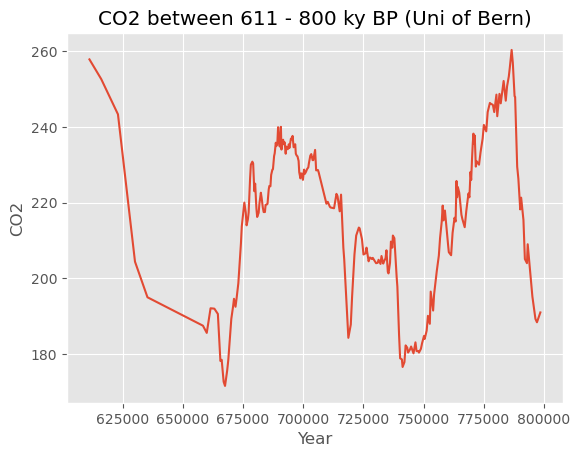

In [6]:
#plt.plot(x="Year",y="CO2")
sns.lineplot(data=df, x="Year", y="CO2")
plt.title('CO2 between 611 - 800 ky BP (Uni of Bern)')

#### Display data types
There are 2 types in the dataframe:
- integer (int64)

In the df dataset there is only one integer variable:Year. The rest are all flaots.
In Python, integer variables, or "int" variables, are variables that specifically store, as the name suggests, integers as its value. As such, all whole numbers (0, 1, 2, 3, 4, 5, ...) are included in integer variables, including negative numbers (0, -1, -2, -3, -4, -5, ...)

**Integers**
  
  $\mathbb{Z} = \{ \ldots, -3, -2, -1, 0, 1, 2, 3, \ldots \}$

- float (float64)

The float type in Python represents the floating point number. Float is used to represent real numbers and is written with a decimal point dividing the integer and fractional parts. For example in the first row of the penguin dataset, 39.1 and 18.7 are floating point numbers. Python float values are represented as 64-bit double-precision values.[62]

In [7]:
df.dtypes

Depth (m)            float64
Year                   int64
CO2                  float64
sigma (ppmv)         float64
Depth (m).1          float64
EDC3_gas_a (yr).1    float64
CO2 (ppmv).1         float64
dtype: object

#### Describe the dataframe : 
count the number of rows, mean, standard deviation, minimum, 25% of the values, 50% of the values, 75% of the values, maximum [59]

In [8]:
df.describe()

Depth (m)           Year         CO2  sigma (ppmv)  Depth (m).1  \
count   247.000000     247.000000  247.000000    247.000000    47.000000   
mean   3123.501134  723999.655870  216.088664      1.248178  3148.893617   
std      40.589369   41319.636469   20.259783      0.614713    35.427754   
min    3026.580000  611269.000000  171.600000      0.200000  3061.710000   
25%    3089.115000  690175.500000  203.950000      0.800000  3130.880000   
50%    3125.530000  723464.000000  218.400000      1.100000  3160.580000   
75%    3159.535000  759094.500000  231.850000      1.600000  3174.330000   
max    3190.080000  798512.000000  260.300000      3.700000  3190.280000   

       EDC3_gas_a (yr).1  CO2 (ppmv).1  
count          47.000000      47.00000  
mean       750698.170213     222.33617  
std         36597.113508      20.93293  
min        667435.000000     178.50000  
25%        729879.000000     208.15000  
50%        760338.000000     224.20000  
75%        778397.500000     238.95000  
max        798893.000000     256.60000

#### Dataframe size:
Return an int representing the number of elements in this object.
Return the number of rows if Series. Otherwise return the number of rows times number of columns if DataFrame.[58]

In [9]:
df.size

1729

Text(0.5, 1.0, 'CO2 between 611 - 800 ky BP (LGGE Grenoble)')

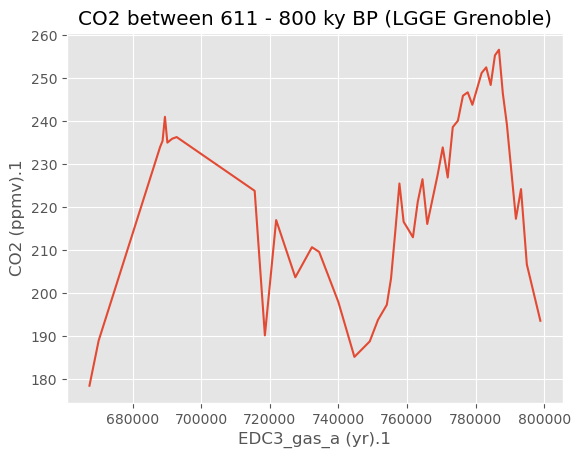

In [10]:
sns.lineplot(data=df, x="EDC3_gas_a (yr).1", y="CO2 (ppmv).1")
plt.title('CO2 between 611 - 800 ky BP (LGGE Grenoble)')

### Import dataset : CO2 data from Luthi et al. 2008 Nature Paper (Vostok-TD-Dome C)

In [11]:
df_sheet1 = pd.read_excel('./data/41586_2008_BFnature06949_MOESM31_ESM.xls', skiprows=range(0, 6), sheet_name=1)
df_sheet1

Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0       102.83            137.0       280.4           1.8       149.10   
1       106.89            268.0       274.9           0.7       173.10   
2       107.20            279.0       277.9           0.7       177.40   
3       110.25            395.0       279.1           1.3       228.60   
4       110.50            404.0       281.9           1.1       250.30   
..         ...              ...         ...           ...          ...   
367        NaN              NaN         NaN           NaN      3340.39   
368        NaN              NaN         NaN           NaN      3343.39   
369        NaN              NaN         NaN           NaN      3346.51   
370        NaN              NaN         NaN           NaN      3346.56   
371        NaN              NaN         NaN           NaN      3349.51   

     EDC3_gas_a (yr).1  CO2 (ppmv).1  Depth (m).2  \
0                 2690         284.7       380.82   
1                 3897         272.7       382.42   
2                 4124         268.1       382.76   
3                 6735         262.2       383.54   
4                 7873         254.5       385.33   
..                 ...           ...          ...   
367             428394         229.7          NaN   
368             433925         199.0          NaN   
369             437580         201.5          NaN   
370             437601         207.8          NaN   
371             438986         205.9          NaN   

     tentatively synchronized on EDC3_gas_a (yr)  CO2 (ppmv).2  ...  \
0                                        18906.0         190.5  ...   
1                                        23379.0         189.1  ...   
2                                        24011.0         189.0  ...   
3                                        25337.0         187.7  ...   
4                                        27507.0         195.2  ...   
..                                           ...           ...  ...   
367                                          NaN           NaN  ...   
368                                          NaN           NaN  ...   
369                                          NaN           NaN  ...   
370                                          NaN           NaN  ...   
371                                          NaN           NaN  ...   

     Depth (m).4  EDC3_gas_a (yr).3  CO2 (ppmv).4  Depth (m).5  \
0        2700.77           392544.0         259.5      3026.58   
1        2702.97           393579.0         273.6      3030.97   
2        2705.17           394560.0         260.7      3036.44   
3        2713.97           398086.0         276.3      3040.87   
4        2718.37           399722.0         277.1      3043.07   
..           ...                ...           ...          ...   
367          NaN                NaN           NaN          NaN   
368          NaN                NaN           NaN          NaN   
369          NaN                NaN           NaN          NaN   
370          NaN                NaN           NaN          NaN   
371          NaN                NaN           NaN          NaN   

     EDC3_gas_a (yr).4  CO2 (ppmv).5  sigma (ppmv).3  Depth (m).6  \
0             611269.0         257.8             2.1      3061.71   
1             616164.0         252.6             0.6      3063.98   
2             623109.0         243.3             2.8      3085.78   
3             630183.0         204.4             0.9      3086.88   
4             635364.0         195.0             1.5      3087.98   
..                 ...           ...             ...          ...   
367                NaN           NaN             NaN          NaN   
368                NaN           NaN             NaN          NaN   
369                NaN           NaN             NaN          NaN   
370                NaN           NaN             NaN          NaN   
371                NaN           NaN             NaN          NaN   

    

### Create a dataframe for Dome C data

In [12]:
#df_sheet1 = df_sheet1.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df_domec = df_sheet1[['EDC3_gas_a (yr)','CO2 (ppmv)']]
df_domec = df_domec.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df_domec.dropna()

Year    CO2
0      137.0  280.4
1      268.0  274.9
2      279.0  277.9
3      395.0  279.1
4      404.0  281.9
..       ...    ...
178  21011.0  186.5
179  21257.0  184.7
180  21507.0  186.1
181  21854.0  185.7
182  22015.0  184.4

[183 rows x 2 columns]

#### Categorical Variable
Add a Categorical Variable to Dataframe to identify where the data originated from.

In Python terminolgy, they are type string. For example, Dome C is a string.

According to Laerd statistics website, categorical variables are also known as discrete or qualitative variables. Categorical variables can be further categorized as either nominal, ordinal or dichotomous. 

Place is a categorical variable. Since there are more than 2 categories and no order, it is referred to as a nominal variable. Nominal variables are variables that have two or more categories, but which do not have an intrinsic order. [61]

In [13]:
df_domec["Place"] = "Dome C"
df_domec

Year    CO2   Place
0    137.0  280.4  Dome C
1    268.0  274.9  Dome C
2    279.0  277.9  Dome C
3    395.0  279.1  Dome C
4    404.0  281.9  Dome C
..     ...    ...     ...
367    NaN    NaN  Dome C
368    NaN    NaN  Dome C
369    NaN    NaN  Dome C
370    NaN    NaN  Dome C
371    NaN    NaN  Dome C

[372 rows x 3 columns]

### PLOT CO2 0-22 kyr BP(Dome C)

Text(0.5, 1.0, 'Dome C : CO2 between 0-22 kyr BP')

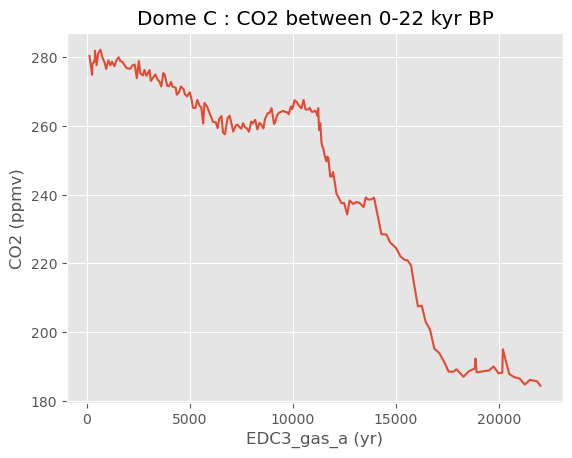

In [14]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr)", y="CO2 (ppmv)")
plt.title('Dome C : CO2 between 0-22 kyr BP')

### PLOT CO2 0-440 kyr BP(Vostok)

Text(0.5, 1.0, 'Vostok : CO2 between 0 - 440 kyr BP')

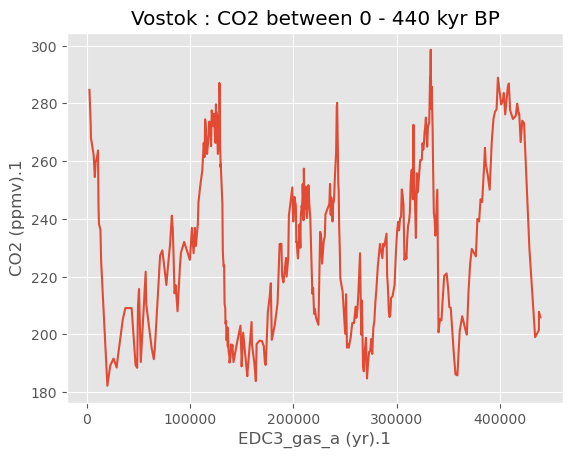

In [15]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr).1", y="CO2 (ppmv).1")
plt.title('Vostok : CO2 between 0 - 440 kyr BP')

#### Create a dataframe for Vostok data

In [16]:
#df_sheet1 = df_sheet1.rename(columns={'EDC3_gas_a (yr).1': 'Year(1)','CO2 (ppmv).1': 'CO2(1)'})
df_vostok = df_sheet1[['EDC3_gas_a (yr).1','CO2 (ppmv).1']]
df_vostok = df_vostok.rename(columns={'EDC3_gas_a (yr).1': 'Year','CO2 (ppmv).1': 'CO2'})
df_vostok.dropna()
#df_domec.dropna()

Year    CO2
0      2690  284.7
1      3897  272.7
2      4124  268.1
3      6735  262.2
4      7873  254.5
..      ...    ...
367  428394  229.7
368  433925  199.0
369  437580  201.5
370  437601  207.8
371  438986  205.9

[372 rows x 2 columns]

#### Categorical Variable

In [17]:
df_vostok["Place"] = "Vostok"
df_vostok

Year    CO2   Place
0      2690  284.7  Vostok
1      3897  272.7  Vostok
2      4124  268.1  Vostok
3      6735  262.2  Vostok
4      7873  254.5  Vostok
..      ...    ...     ...
367  428394  229.7  Vostok
368  433925  199.0  Vostok
369  437580  201.5  Vostok
370  437601  207.8  Vostok
371  438986  205.9  Vostok

[372 rows x 3 columns]

### PLOT CO2 19 - 63 kyr BP (Taylor Dome)

Text(0.5, 1.0, 'Taylor Dome : CO2 between 19 - 63 kyr BP')

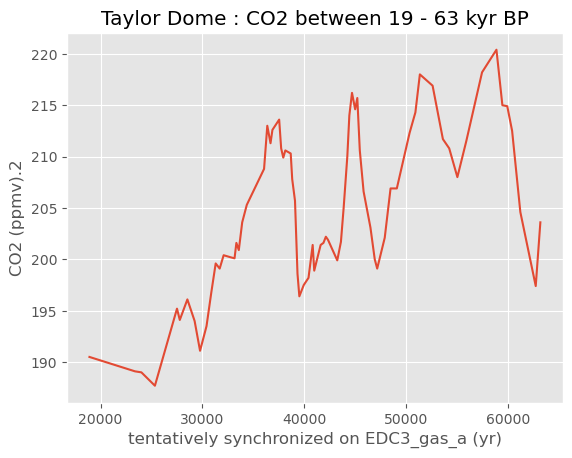

In [18]:
sns.lineplot(data=df_sheet1, x="tentatively synchronized on EDC3_gas_a (yr)", y="CO2 (ppmv).2")
plt.title('Taylor Dome : CO2 between 19 - 63 kyr BP')

#### Create a dataframe for Taylor Dome data

In [19]:
df_taylor = df_sheet1[['tentatively synchronized on EDC3_gas_a (yr)','CO2 (ppmv).2']]
df_taylor = df_taylor.rename(columns={'tentatively synchronized on EDC3_gas_a (yr)': "Year", 'CO2 (ppmv).2': 'CO2'})
df_taylor.dropna()

Year    CO2
0   18906.0  190.5
1   23379.0  189.1
2   24011.0  189.0
3   25337.0  187.7
4   27507.0  195.2
..      ...    ...
68  59955.0  214.9
69  60431.0  212.5
70  61239.0  204.6
71  62751.0  197.4
72  63205.0  203.6

[73 rows x 2 columns]

#### Categorical Variable

In [20]:
df_taylor["Place"] = "Taylor"
df_taylor

Year    CO2   Place
0    18906.0  190.5  Taylor
1    23379.0  189.1  Taylor
2    24011.0  189.0  Taylor
3    25337.0  187.7  Taylor
4    27507.0  195.2  Taylor
..       ...    ...     ...
367      NaN    NaN  Taylor
368      NaN    NaN  Taylor
369      NaN    NaN  Taylor
370      NaN    NaN  Taylor
371      NaN    NaN  Taylor

[372 rows x 3 columns]

#### Concatenate 3 dataframes

In [21]:
composite_df = pd.concat([df_domec,df_vostok,df_taylor])
composite_df.dropna()

Year    CO2   Place
0     137.0  280.4  Dome C
1     268.0  274.9  Dome C
2     279.0  277.9  Dome C
3     395.0  279.1  Dome C
4     404.0  281.9  Dome C
..      ...    ...     ...
68  59955.0  214.9  Taylor
69  60431.0  212.5  Taylor
70  61239.0  204.6  Taylor
71  62751.0  197.4  Taylor
72  63205.0  203.6  Taylor

[628 rows x 3 columns]

### PLOT CO2 470-660 kyr BP (Dome C)

Text(0.5, 1.0, '470-660 kyr BP(Dome C)')

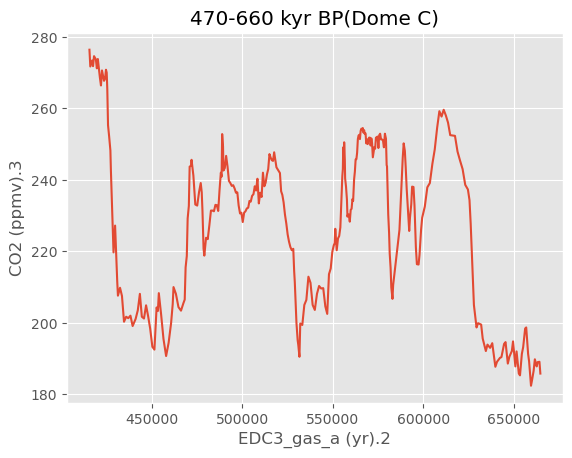

In [22]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr).2", y="CO2 (ppmv).3")
plt.title('470-660 kyr BP(Dome C)')

#### Create a dataframe for Dome C data processed by the University of Bern

In [23]:
df_domec_2 = df_sheet1[['EDC3_gas_a (yr).2','CO2 (ppmv).3']]
df_domec_2 = df_domec_2.rename(columns={'EDC3_gas_a (yr).2': "Year", 'CO2 (ppmv).3': 'CO2'})
df_domec_2.dropna()

Year    CO2
0    415717.0  276.4
1    416193.0  271.7
2    417191.0  273.4
3    417698.0  271.8
4    418245.0  274.6
..        ...    ...
317  661650.0  189.8
318  662669.0  187.8
319  663206.0  189.0
320  664192.0  189.1
321  664690.0  185.8

[322 rows x 2 columns]

#### Categorical Variable

In [24]:
df_domec_2["Place"] = "DomeC_Bern"
df_domec_2

Year    CO2       Place
0    415717.0  276.4  DomeC_Bern
1    416193.0  271.7  DomeC_Bern
2    417191.0  273.4  DomeC_Bern
3    417698.0  271.8  DomeC_Bern
4    418245.0  274.6  DomeC_Bern
..        ...    ...         ...
367       NaN    NaN  DomeC_Bern
368       NaN    NaN  DomeC_Bern
369       NaN    NaN  DomeC_Bern
370       NaN    NaN  DomeC_Bern
371       NaN    NaN  DomeC_Bern

[372 rows x 3 columns]

#### Concatenate 4 dataframes

In [25]:
composite_df = pd.concat([df_domec,df_vostok,df_taylor,df_domec_2])
composite_df.dropna()

Year    CO2       Place
0       137.0  280.4      Dome C
1       268.0  274.9      Dome C
2       279.0  277.9      Dome C
3       395.0  279.1      Dome C
4       404.0  281.9      Dome C
..        ...    ...         ...
317  661650.0  189.8  DomeC_Bern
318  662669.0  187.8  DomeC_Bern
319  663206.0  189.0  DomeC_Bern
320  664192.0  189.1  DomeC_Bern
321  664690.0  185.8  DomeC_Bern

[950 rows x 3 columns]

### PLOT CO2 393 - 664 kyr BP (Dome C)

Text(0.5, 1.0, 'Dome C : CO2 between 393 - 664 kyr BP')

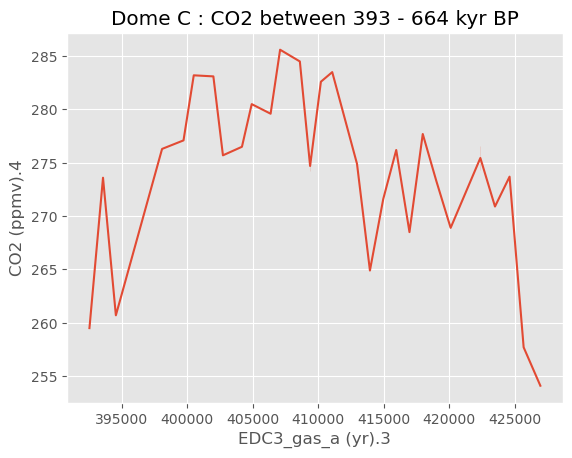

In [26]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr).3", y="CO2 (ppmv).4")
plt.title('Dome C : CO2 between 393 - 664 kyr BP')

#### Create a dataframe for Dome C data processed by Grenoble

In [27]:
df_domec_1 = df_sheet1[['EDC3_gas_a (yr).3','CO2 (ppmv).4']]
df_domec_1 = df_domec_1.rename(columns={'EDC3_gas_a (yr).3': "Year", 'CO2 (ppmv).4': 'CO2'})
df_domec_1.dropna()
df_domec_1.head()

Year    CO2
0  392544.0  259.5
1  393579.0  273.6
2  394560.0  260.7
3  398086.0  276.3
4  399722.0  277.1

#### Categorical Variable

In [28]:
df_domec_1["Place"] = "DomeC_Gren"
df_domec_1

Year    CO2       Place
0    392544.0  259.5  DomeC_Gren
1    393579.0  273.6  DomeC_Gren
2    394560.0  260.7  DomeC_Gren
3    398086.0  276.3  DomeC_Gren
4    399722.0  277.1  DomeC_Gren
..        ...    ...         ...
367       NaN    NaN  DomeC_Gren
368       NaN    NaN  DomeC_Gren
369       NaN    NaN  DomeC_Gren
370       NaN    NaN  DomeC_Gren
371       NaN    NaN  DomeC_Gren

[372 rows x 3 columns]

#### Concatenate 5 dataframes

In [29]:
composite_df = pd.concat([df_domec,df_vostok,df_taylor,df_domec_1,df_domec_2])
composite_df.dropna()

Year    CO2       Place
0       137.0  280.4      Dome C
1       268.0  274.9      Dome C
2       279.0  277.9      Dome C
3       395.0  279.1      Dome C
4       404.0  281.9      Dome C
..        ...    ...         ...
317  661650.0  189.8  DomeC_Bern
318  662669.0  187.8  DomeC_Bern
319  663206.0  189.0  DomeC_Bern
320  664192.0  189.1  DomeC_Bern
321  664690.0  185.8  DomeC_Bern

[981 rows x 3 columns]

### PLOT CO2 611 - 800 kyr BP (Dome C)(University of Bern)

Text(0.5, 1.0, 'Dome C (University of Bern) : CO2 between 611 - 800 kyr BP')

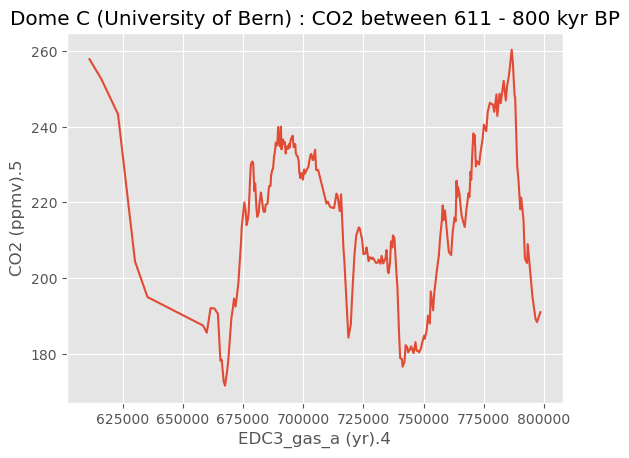

In [30]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr).4", y="CO2 (ppmv).5")
plt.title('Dome C (University of Bern) : CO2 between 611 - 800 kyr BP')

#### Create a dataframe for Dome C data processed by Bern

In [31]:
df_domec_bern = df_sheet1[['EDC3_gas_a (yr).4','CO2 (ppmv).5']]
df_domec_bern = df_domec_bern.rename(columns={'EDC3_gas_a (yr).4': "Year", 'CO2 (ppmv).5': 'CO2'})
df_domec_bern.dropna()

Year    CO2
0    611269.0  257.8
1    616164.0  252.6
2    623109.0  243.3
3    630183.0  204.4
4    635364.0  195.0
..        ...    ...
242  794608.0  199.4
243  795202.0  195.2
244  796467.0  189.3
245  797099.0  188.4
246  798512.0  191.0

[247 rows x 2 columns]

#### Categorical Variable

In [32]:
df_domec_bern["Place"] = "DomeC_Bern"
df_domec_bern

Year    CO2       Place
0    611269.0  257.8  DomeC_Bern
1    616164.0  252.6  DomeC_Bern
2    623109.0  243.3  DomeC_Bern
3    630183.0  204.4  DomeC_Bern
4    635364.0  195.0  DomeC_Bern
..        ...    ...         ...
367       NaN    NaN  DomeC_Bern
368       NaN    NaN  DomeC_Bern
369       NaN    NaN  DomeC_Bern
370       NaN    NaN  DomeC_Bern
371       NaN    NaN  DomeC_Bern

[372 rows x 3 columns]

#### Concatenate 6 dataframes

In [33]:
composite_df = pd.concat([df_domec,df_vostok,df_taylor,df_domec_1,df_domec_2,df_domec_bern])
composite_df.dropna()

Year    CO2       Place
0       137.0  280.4      Dome C
1       268.0  274.9      Dome C
2       279.0  277.9      Dome C
3       395.0  279.1      Dome C
4       404.0  281.9      Dome C
..        ...    ...         ...
242  794608.0  199.4  DomeC_Bern
243  795202.0  195.2  DomeC_Bern
244  796467.0  189.3  DomeC_Bern
245  797099.0  188.4  DomeC_Bern
246  798512.0  191.0  DomeC_Bern

[1228 rows x 3 columns]

### PLOT CO2 611 - 800 kyr BP (Dome C)(LDGE Grenoble)

Text(0.5, 1.0, 'Dome C (LDGE Grenoble) : CO2 between 611 - 800 kyr BP')

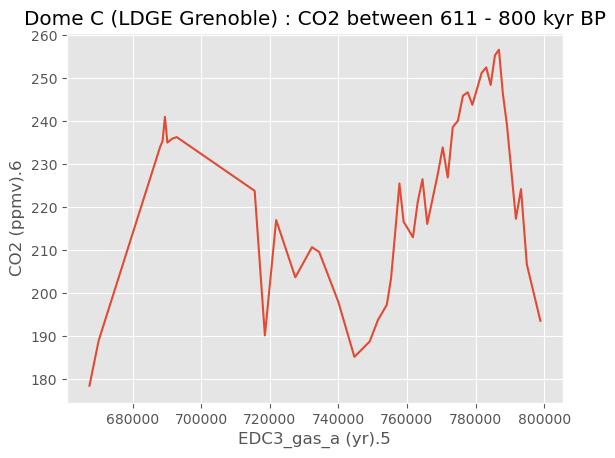

In [34]:
sns.lineplot(data=df_sheet1, x="EDC3_gas_a (yr).5", y="CO2 (ppmv).6")
plt.title('Dome C (LDGE Grenoble) : CO2 between 611 - 800 kyr BP')

#### Create a dataframe for Dome C data processed by Grenoble

In [35]:
df_domec_gren = df_sheet1[['EDC3_gas_a (yr).5','CO2 (ppmv).6']]
df_domec_gren = df_domec_gren.rename(columns={'EDC3_gas_a (yr).5': "Year", 'CO2 (ppmv).6': 'CO2'})
df_domec_gren.dropna()
df_domec_gren.head()

Year    CO2
0  667435.0  178.5
1  670124.0  189.0
2  688035.0  234.0
3  688751.0  235.4
4  689444.0  241.0

#### Categorical Variable

In [36]:
df_domec_gren["Place"] = "DomeC_Gren"
df_domec_gren

Year    CO2       Place
0    667435.0  178.5  DomeC_Gren
1    670124.0  189.0  DomeC_Gren
2    688035.0  234.0  DomeC_Gren
3    688751.0  235.4  DomeC_Gren
4    689444.0  241.0  DomeC_Gren
..        ...    ...         ...
367       NaN    NaN  DomeC_Gren
368       NaN    NaN  DomeC_Gren
369       NaN    NaN  DomeC_Gren
370       NaN    NaN  DomeC_Gren
371       NaN    NaN  DomeC_Gren

[372 rows x 3 columns]

#### Check for null values

In [37]:
composite_df.isnull().values.any()

True

In [38]:
#composite_df = np.nan_to_num(composite_df)

#### Calculate mean of Dome C data

In [39]:
domec =composite_df[composite_df['Place']=='Dome C']
domec.CO2.mean()

250.74644808743165

In [40]:
df_comp = pd.read_excel('./data/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name = 2, skiprows=range(0, 6))
df_comp

EDC3_gas_a (yr)  CO2 (ppmv)
0                 137       280.4
1                 268       274.9
2                 279       277.9
3                 395       279.1
4                 404       281.9
...               ...         ...
1091           794608       199.4
1092           795202       195.2
1093           796467       189.3
1094           797099       188.4
1095           798512       191.0

[1096 rows x 2 columns]

In [41]:
df_comp = df_comp.rename(columns={'EDC3_gas_a (yr)': 'Year','CO2 (ppmv)': 'CO2'})
df_comp

Year    CO2
0        137  280.4
1        268  274.9
2        279  277.9
3        395  279.1
4        404  281.9
...      ...    ...
1091  794608  199.4
1092  795202  195.2
1093  796467  189.3
1094  797099  188.4
1095  798512  191.0

[1096 rows x 2 columns]

Text(0.5, 1.0, 'CO2 over the past 800,000 years')

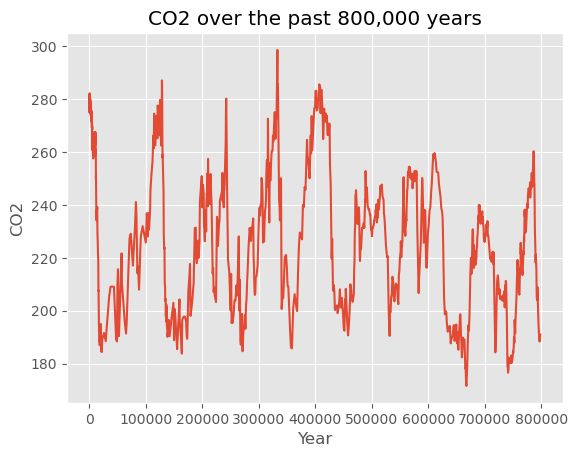

In [42]:
sns.lineplot(data=df_comp, x="Year", y="CO2", palette='coolwarm')
plt.title('CO2 over the past 800,000 years')

In [43]:
#https://www.co2.earth/daily-co2
df2 = pd.DataFrame([[0,420]], columns=['Year','CO2'])
df2

Year  CO2
0     0  420

In [44]:
df_comp = pd.concat([df2, df_comp]).reset_index(drop=True)
df_comp

Year    CO2
0          0  420.0
1        137  280.4
2        268  274.9
3        279  277.9
4        395  279.1
...      ...    ...
1092  794608  199.4
1093  795202  195.2
1094  796467  189.3
1095  797099  188.4
1096  798512  191.0

[1097 rows x 2 columns]

In [45]:
# Split data in training (not NaN values) and missing (NaN values)
missing = df_comp.isna().any(axis=1)
df_training = df_comp[~missing]
df_missing = df_comp[missing].reset_index(drop=True)

In [46]:
df_training

Year    CO2
0          0  420.0
1        137  280.4
2        268  274.9
3        279  277.9
4        395  279.1
...      ...    ...
1092  794608  199.4
1093  795202  195.2
1094  796467  189.3
1095  797099  188.4
1096  798512  191.0

[1097 rows x 2 columns]

In [47]:
#f = interp1d(df_training.year, df_training.CO2)
intfunc = interp1d(df_comp.Year,df_comp.CO2,fill_value="extrapolate")

In [48]:
# Interpolate the missing values
#df_missing["CO2"] = f(df_missing.year)
df_comp['CO2_interp'] = intfunc(df_comp.Year)
df_comp

Year    CO2  CO2_interp
0          0  420.0       420.0
1        137  280.4       280.4
2        268  274.9       274.9
3        279  277.9       277.9
4        395  279.1       279.1
...      ...    ...         ...
1092  794608  199.4       199.4
1093  795202  195.2       195.2
1094  796467  189.3       189.3
1095  797099  188.4       188.4
1096  798512  191.0       191.0

[1097 rows x 3 columns]

In [49]:
df_comp.dtypes

Year            int64
CO2           float64
CO2_interp    float64
dtype: object

In [50]:
#pd.to_timedelta(df_comp['Year'], unit='Y')

Text(0.5, 1.0, 'CO2 over the past 800,000 years')

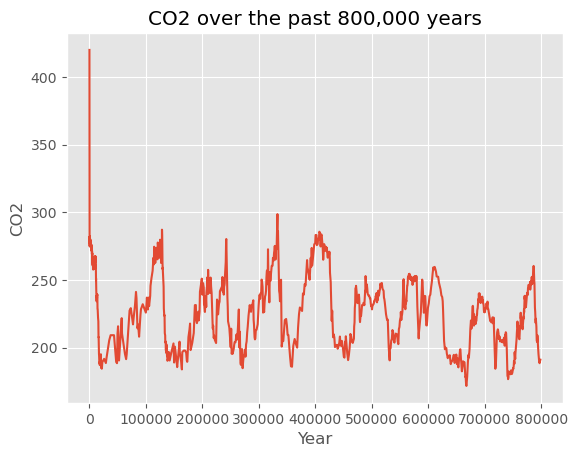

In [51]:
sns.lineplot(data=df_comp, x="Year", y="CO2", palette='coolwarm')
plt.title('CO2 over the past 800,000 years')

### Import dataset : Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [52]:
df1 = pd.read_excel('./data/epicaDC.deuttemp.EDC3-AICC.xlsx')
df1

bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3         3.104025  
4         3.103453  
...            ...  
5814      1.529000  
5815      1.548000  
5816      1.576000  
5817      1.589000  
5818      1.583000  

[5819 rows x 7 columns]

In [53]:
df1_sample = df1.sample(1097)
df1_sample

bag     ztop      EDC3béta      AICC2012  deutfinal   temp  \
11      12     6.05      30.70987      22.14000        NaN  218.3   
3928  3929  2160.40  213744.20000  214531.00000     -407.6  215.4   
2532  2533  1392.60  102664.10000  101302.00000     -417.5  213.7   
2011  2012  1106.05   75968.84000   76170.86667     -425.9  212.0   
642    643   353.10   11570.64000   11551.30000     -393.5  217.4   
...    ...      ...           ...           ...        ...    ...   
2673  2674  1470.15  111309.70000  108940.00000     -418.0  213.5   
1279  1280   703.45   39210.05000   38362.93333     -431.0  211.1   
3522  3523  1937.10  170071.00000  170981.00000     -429.8  211.2   
1300  1301   715.00   40113.00000   39192.73333     -427.1  211.8   
5383  5384  2960.65  560866.70000  568784.33330     -401.7  215.9   

      acc-EDC3beta  
11        3.080266  
3928      2.350000  
2532      2.052000  
2011      1.749000  
642       3.059446  
...            ...  
2673      1.874000  
1279      1.519000  
3522      1.555000  
1300      1.632000  
5383      2.472000  

[1097 rows x 7 columns]

In [54]:
df1.describe()

bag         ztop       EDC3béta       AICC2012    deutfinal  \
count  5819.00000  5819.000000    5819.000000    5819.000000  5804.000000   
mean   2910.00000  1599.950000  191800.948469  192715.210134  -417.742884   
std    1679.94494   923.969717  193448.729761  195698.666350    17.949569   
min       1.00000     0.000000     -50.000000     -55.000000  -450.100000   
25%    1455.50000   799.975000   47540.535000   46505.000000  -432.300000   
50%    2910.00000  1599.950000  123446.200000  121574.666700  -421.300000   
75%    4364.50000  2399.925000  276835.550000  277050.500000  -403.200000   
max    5819.00000  3199.900000  820093.900000  821838.000000  -361.200000   

              temp  acc-EDC3beta  
count  5819.000000   5819.000000  
mean    213.474721      2.044824  
std       3.130075      0.678126  
min     207.900000      1.096556  
25%     210.900000      1.508500  
50%     212.900000      1.838000  
75%     216.000000      2.514000  
max     223.100000      4.641000

In [55]:
df1.size

40733

In [56]:
#df1.index = df1["AICC2012"]
#df1

In [57]:
df1.temp

0       218.3
1       218.3
2       218.3
3       218.3
4       218.3
        ...  
5814    211.0
5815    211.2
5816    211.3
5817    211.4
5818    211.4
Name: temp, Length: 5819, dtype: float64

In [58]:
df1.temp.mean()

213.47472074239568

In [59]:
year_avg=df1.groupby(df1.AICC2012).temp.mean()
year_avg

AICC2012
-55.000000        218.3
-50.513333        218.3
-46.026667        218.3
-41.540000        218.3
-34.516667        218.3
                  ...  
 817562.000000    211.0
 818631.000000    211.2
 819700.000000    211.3
 820769.000000    211.4
 821838.000000    211.4
Name: temp, Length: 5819, dtype: float64

Text(0, 0.5, 'Temperature(Kelvin)')

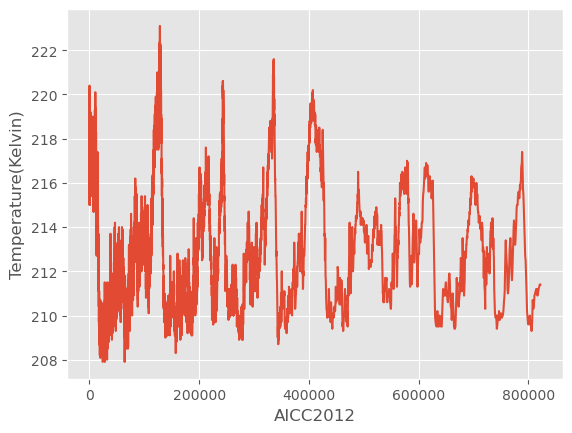

In [60]:
year_avg.plot()
plt.ylabel("Temperature(Kelvin)")

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

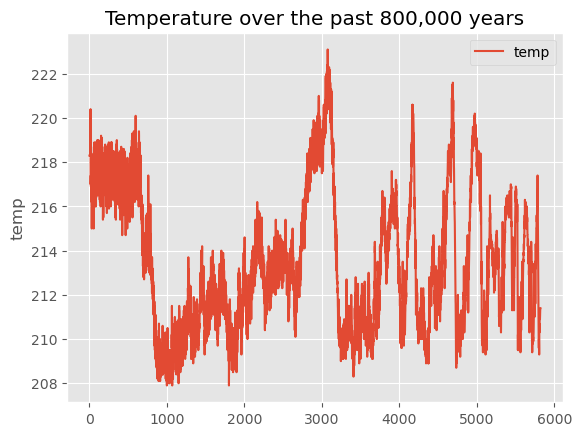

In [61]:
df1.plot(y='temp', ylabel='temp')
plt.title('Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

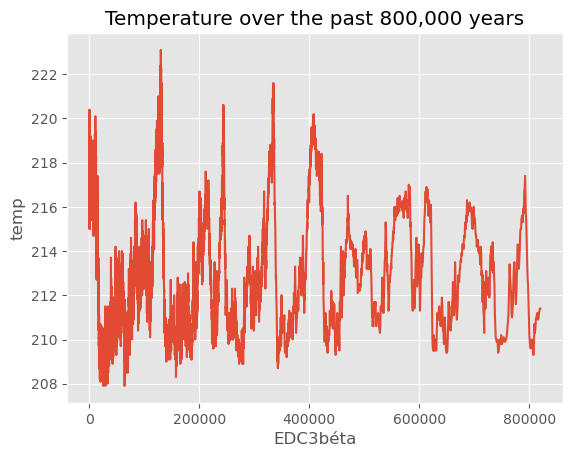

In [62]:
sns.lineplot(data=df1, x="EDC3béta", y="temp")
plt.title('Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Temperature over the past 800,000 years')

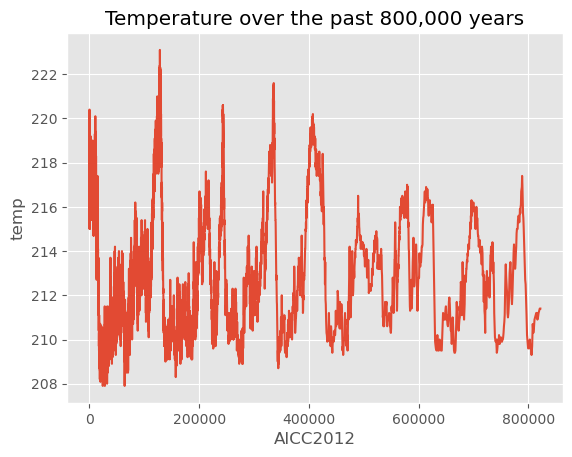

In [63]:
sns.lineplot(data=df1, x="AICC2012", y="temp")
plt.title('Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Average Temperature over the past 800,000 years')

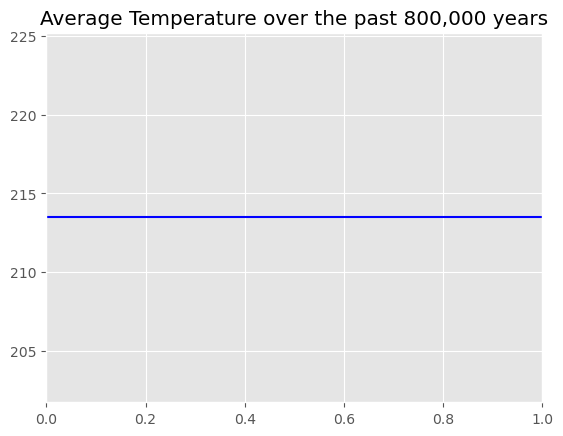

In [64]:
plt.axhline(y=213.47472074239568, color='b', linestyle='-')
plt.title('Average Temperature over the past 800,000 years')

Text(0.5, 1.0, 'Temperature Anomaly over the past 800,000 years')

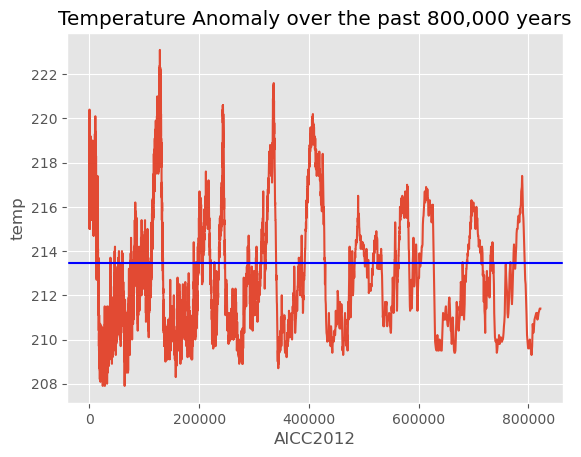

In [65]:
sns.lineplot(data=df1, x="AICC2012", y="temp")
plt.axhline(y=213.47472074239568, color='b', linestyle='-')
plt.title('Temperature Anomaly over the past 800,000 years')

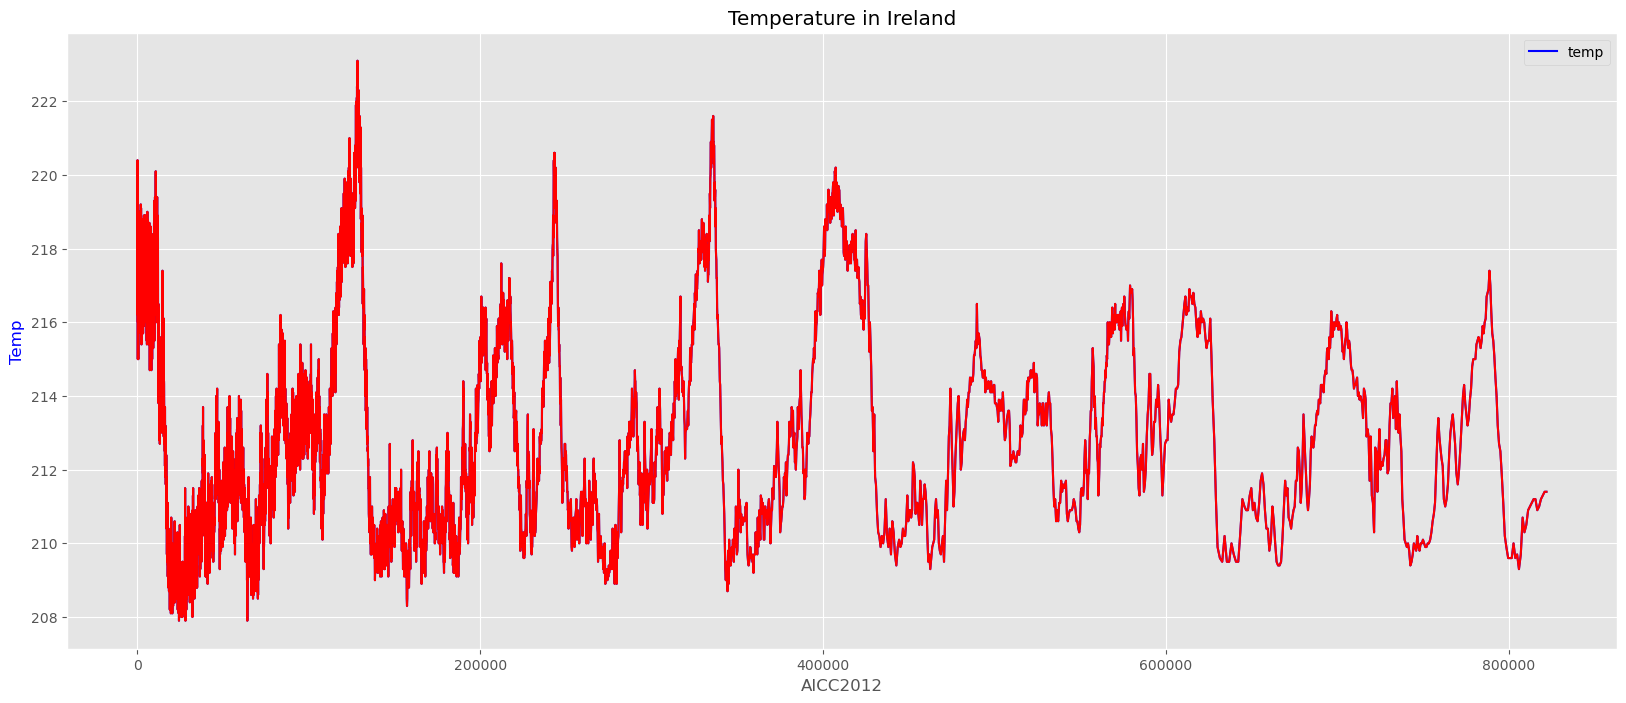

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
df1.plot(x="AICC2012", y="temp",color='b',ax=ax)
ax.set_ylabel('Temp', color='b')
#ax.set_xlim(0, 800000)
year_avg.plot(color='r',ax=ax )
#ax.right_ax.set_ylabel('Temperature')
plt.title('Temperature in Ireland')
plt.show()

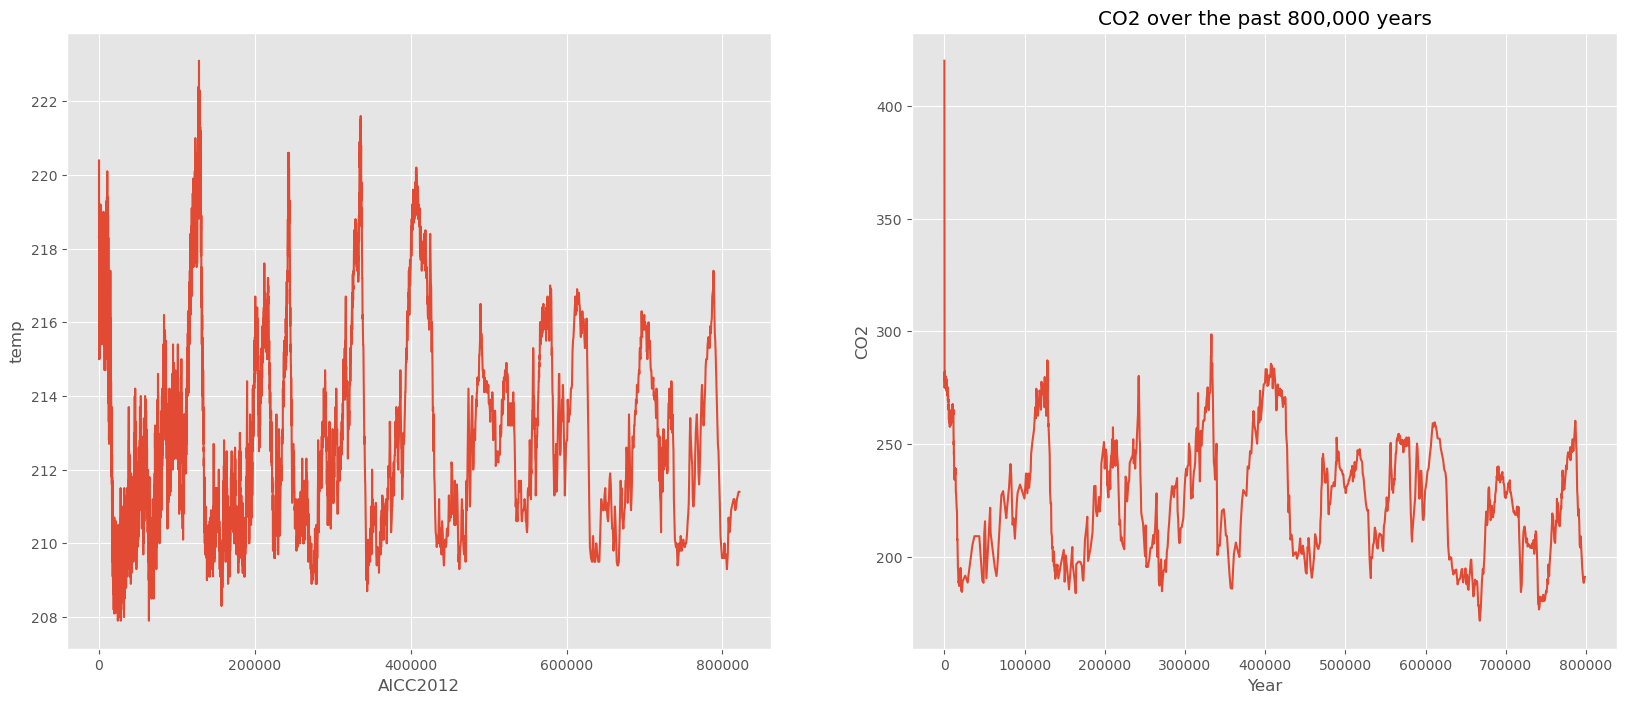

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax1)
plt.title('Temperature over the past 800,000 years')
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax2)
plt.title('CO2 over the past 800,000 years')
plt.show()

In [68]:
#fig, ax = plt.subplots(figsize=(20,8))
#sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax)
#sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
#plt.show()

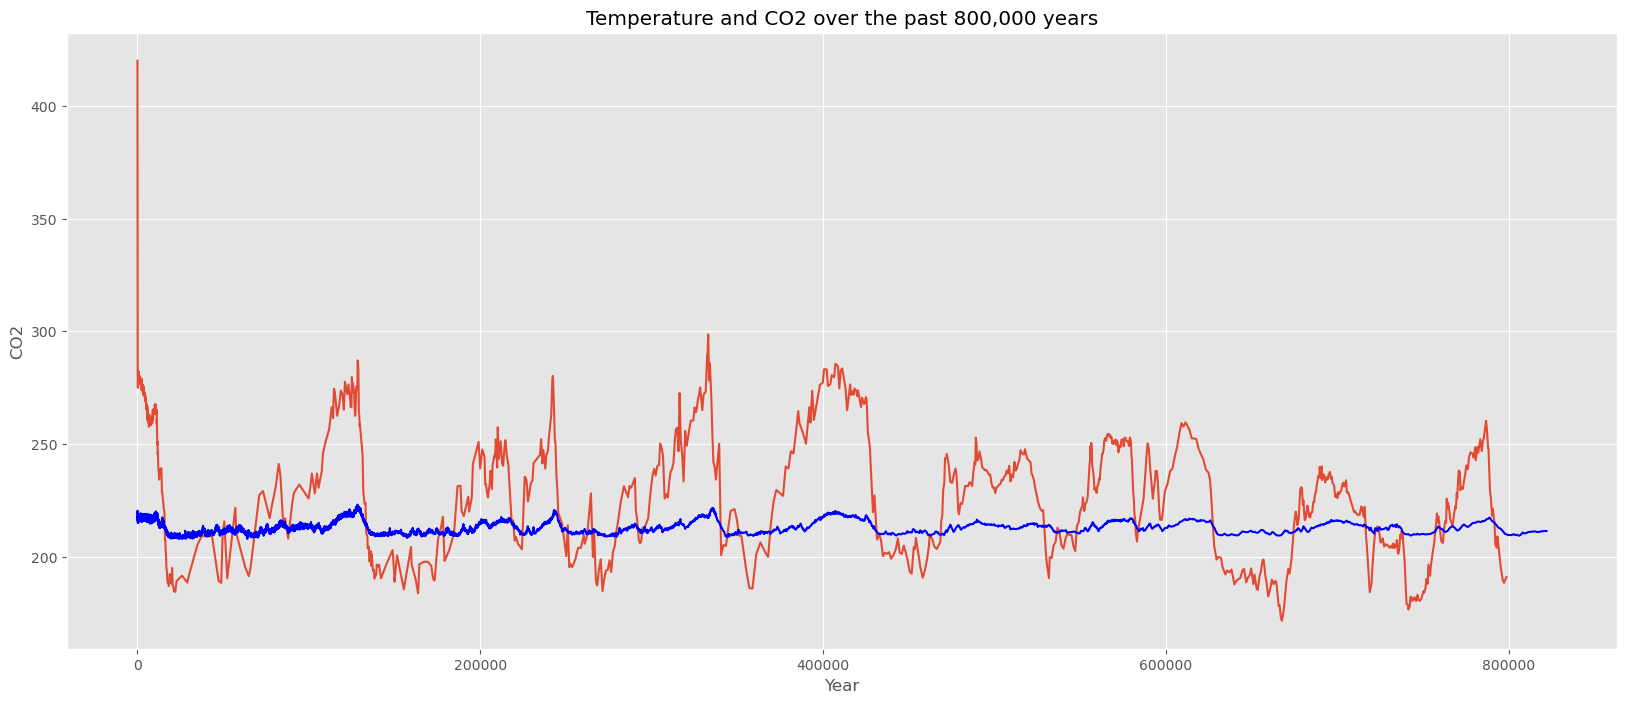

In [69]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax)
sns.lineplot(data=df1, x="AICC2012", y="temp", ax=ax, color = "blue")
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

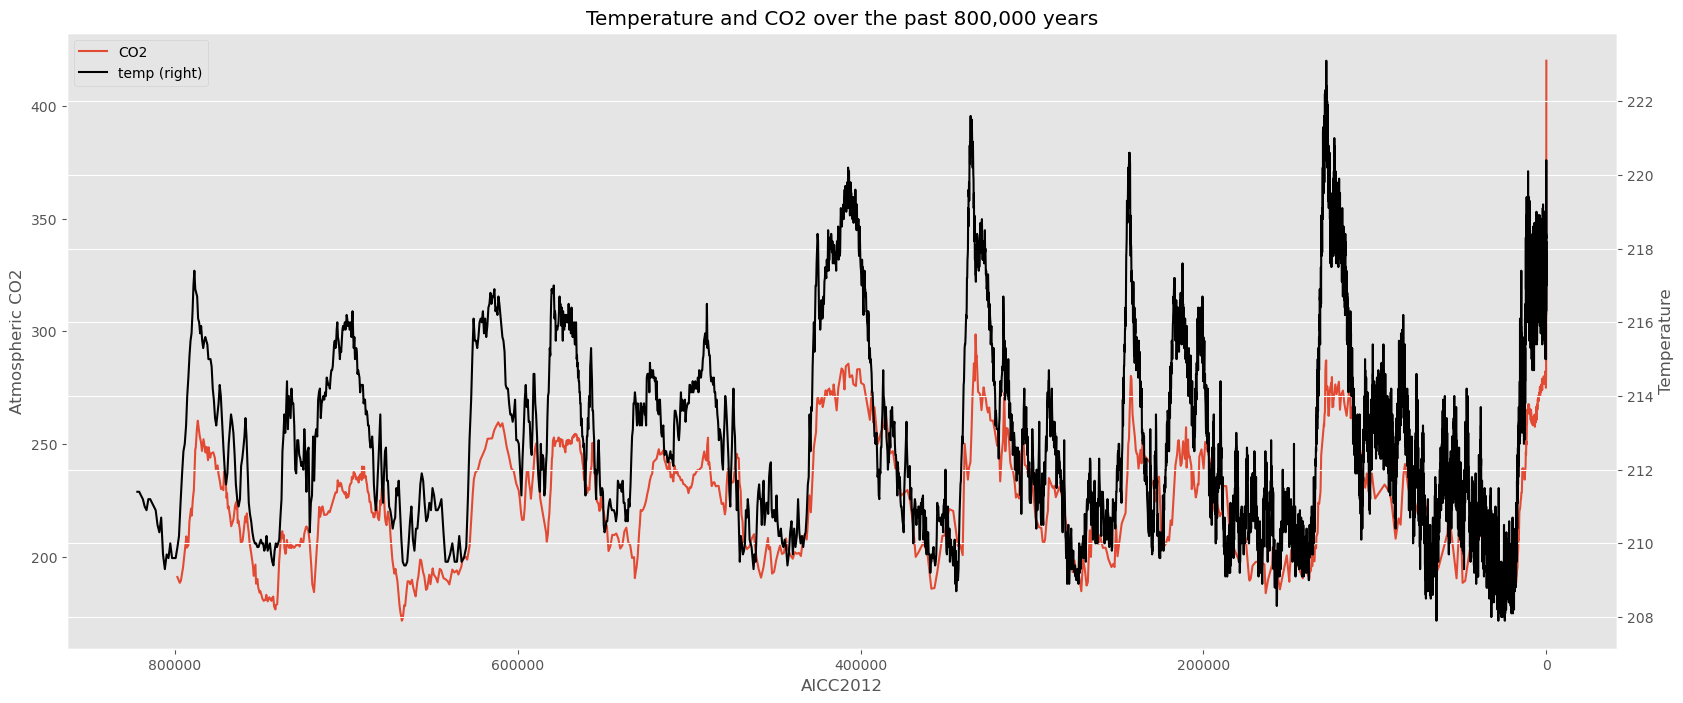

In [70]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df1.plot(x="AICC2012", y="temp",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature')
plt.gca().invert_xaxis()
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [71]:
temp = df1.temp
df_comp["temp"] = temp
df_comp

Year    CO2  CO2_interp   temp
0          0  420.0       420.0  218.3
1        137  280.4       280.4  218.3
2        268  274.9       274.9  218.3
3        279  277.9       277.9  218.3
4        395  279.1       279.1  218.3
...      ...    ...         ...    ...
1092  794608  199.4       199.4  209.3
1093  795202  195.2       195.2  209.5
1094  796467  189.3       189.3  209.2
1095  797099  188.4       188.4  210.1
1096  798512  191.0       191.0  209.6

[1097 rows x 4 columns]

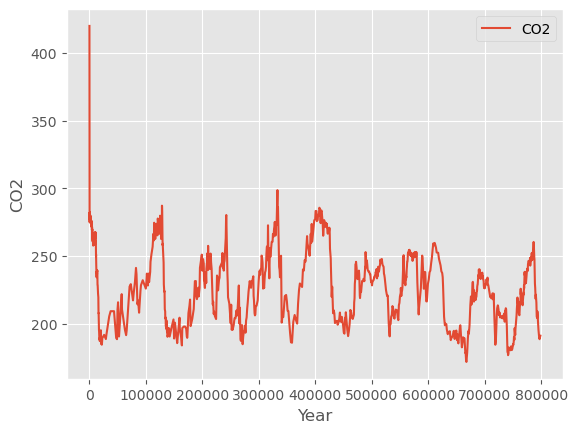

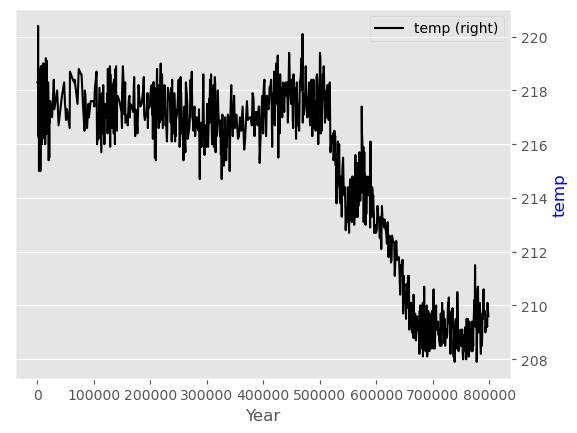

In [72]:
df_comp.plot(x="Year", y="CO2", ylabel=('CO2'))
#ax.set_xlim(0, 800000)
ax = df_comp.plot(x="Year", y="temp",secondary_y=True, color='k')
ax.set_ylabel('temp', color='b')
#ax2.set_ylim(200, 230)
plt.show()

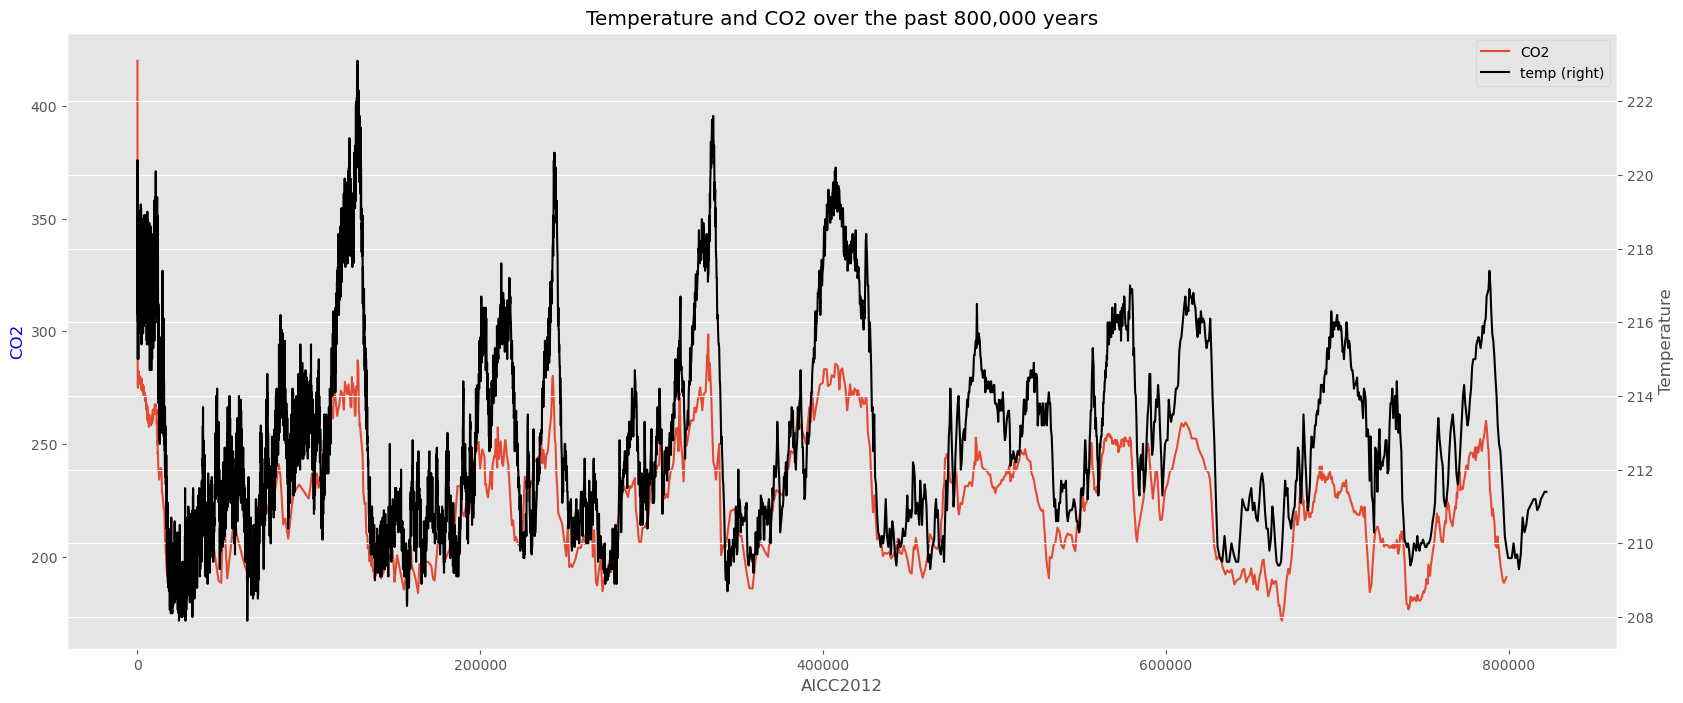

In [73]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax)
ax.set_ylabel('CO2', color='b')
#ax.set_xlim(0, 800000)
df1.plot(x="AICC2012", y="temp",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature')
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

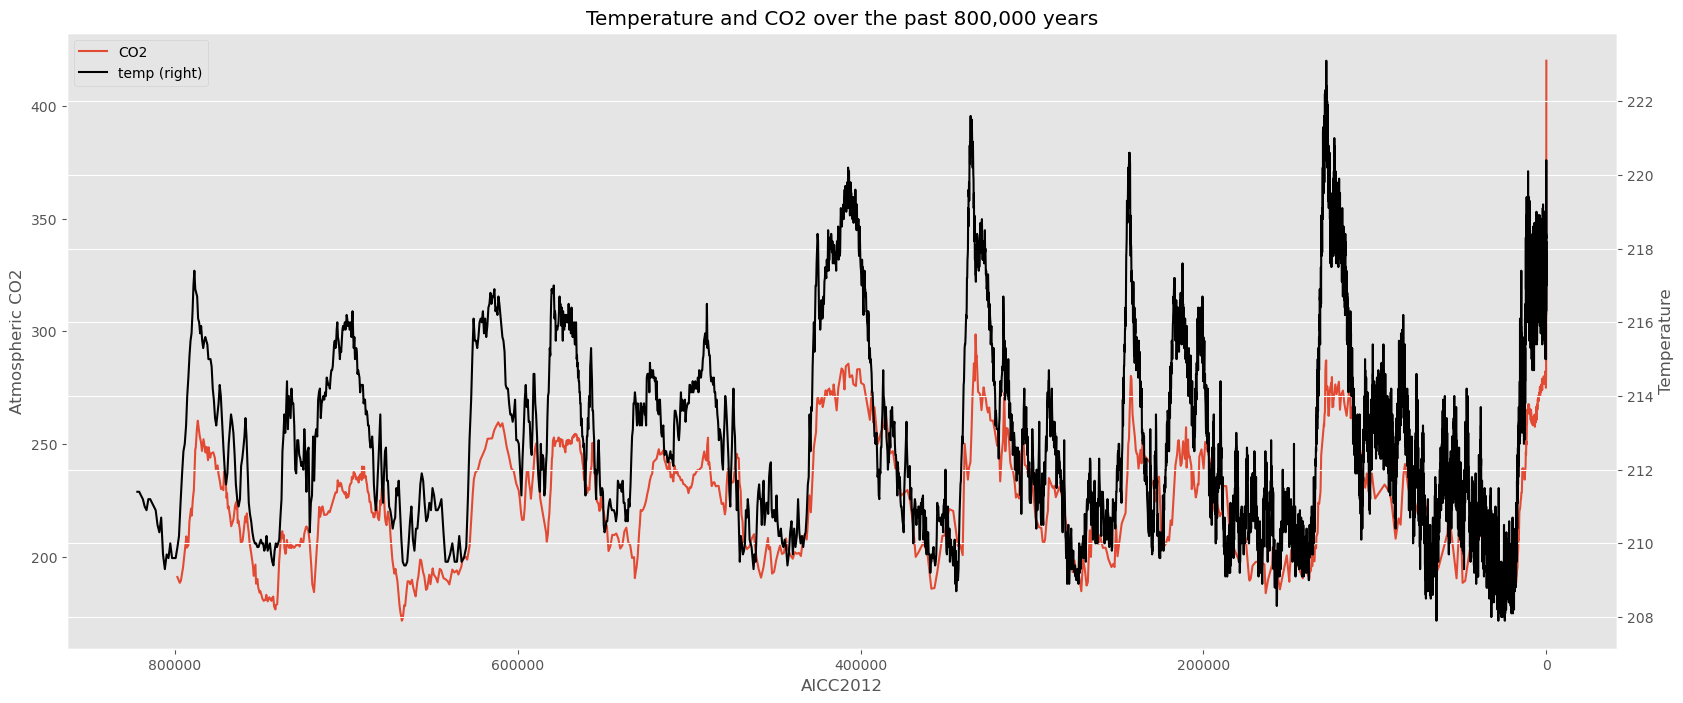

In [74]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df1.plot(x="AICC2012", y="temp",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature')
plt.gca().invert_xaxis()
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [75]:
df_comp.dtypes

Year            int64
CO2           float64
CO2_interp    float64
temp          float64
dtype: object

### Import EPICA Dome C temperature dataset

In [76]:
epica_df1 = pd.read_csv("./data/epicadomec.txt", delimiter= '\s+', usecols = ['Age','Deuterium','Temperature'])
epica_df1

Age  Deuterium  Temperature
0         38.37379    -390.90         0.88
1         46.81203    -385.10         1.84
2         55.05624    -377.80         3.04
3         64.41511    -394.10         0.35
4         73.15077    -398.70        -0.42
...            ...        ...          ...
5783  797408.00000    -440.20        -8.73
5784  798443.00000    -439.00        -8.54
5785  799501.00000    -441.10        -8.88
5786  800589.00000    -441.42        -8.92
5787  801662.00000    -440.90        -8.82

[5788 rows x 3 columns]

### Temperature in Degrees Celsius over the past 800,000 years

Text(0.5, 1.0, 'Temperature in Degrees Celsius over the past 800,000 years')

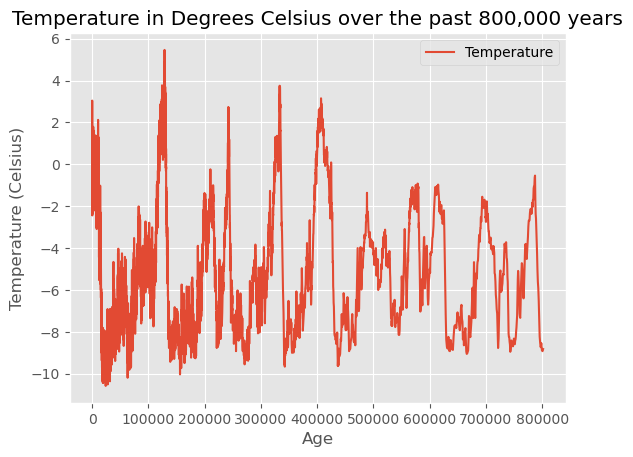

In [77]:
epica_df1.plot(x="Age", y="Temperature")
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature in Degrees Celsius over the past 800,000 years')

***
## Examine Irish context (Temperature and Rainfall)
***

In [78]:
df_birr = pd.read_csv("./data/Birr_Castle_second_order_station_1872-1911.csv")
df_birr = df_birr.rename(columns={'Daily': 'Day'})
df_birr["Station"] = "Birr"
df_birr.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C) Station
0  1872      5    1    59.5    49.6    15.3     9.8    Birr
1  1872      5    2    56.8    47.6    13.8     8.7    Birr
2  1872      5    3    62.5    42.7    16.9     5.9    Birr
3  1872      5    4    59.2    42.1    15.1     5.6    Birr
4  1872      5    5    54.6    40.1    12.6     4.5    Birr

In [79]:
df_Blacksod = pd.read_csv("./data/Blacksod Point_Belmullet_1872-1920.csv")
df_Blacksod["Station"] = "Blacksod"
df_Blacksod.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station
0  1884      9   30    56.0     NaN    13.3     NaN  Blacksod
1  1884     10    1    56.0    50.0    13.3    10.0  Blacksod
2  1884     10    2    54.0    50.0    12.2    10.0  Blacksod
3  1884     10    3    53.0    51.0    11.7    10.6  Blacksod
4  1884     10    4    53.0    47.0    11.7     8.3  Blacksod

In [80]:
df_Botanic = pd.read_csv("./data/Botanic Gardens Dublin NLI series_1882-1952.csv")
df_Botanic["Station"] = "Botanic"
df_Botanic.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)  Station
0  1882     10    1     NaN     NaN     NaN     NaN  Botanic
1  1882     10    2     NaN     NaN     NaN     NaN  Botanic
2  1882     10    3     NaN     NaN     NaN     NaN  Botanic
3  1882     10    4     NaN     NaN     NaN     NaN  Botanic
4  1882     10    5     NaN     NaN     NaN     NaN  Botanic

In [81]:
df_Fitzwilliam = pd.read_csv("./data/Fitzwilliam Square Dublin_1871-1937.csv")
df_Fitzwilliam["Station"] = "Fitzwilliam"
df_Fitzwilliam.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)      Station
0  1871      1    1    33.3    32.6     0.7     0.3  Fitzwilliam
1  1871      1    2    45.1    33.4     7.3     0.8  Fitzwilliam
2  1871      1    3    39.5    34.0     4.2     1.1  Fitzwilliam
3  1871      1    4    40.2    35.6     4.6     2.0  Fitzwilliam
4  1871      1    5    46.3    39.8     7.9     4.3  Fitzwilliam

In [82]:
df_Killarney = pd.read_csv("./data/Killarney_1881-1933.csv")
df_Killarney["Station"] = "Killarney"
df_Killarney.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)    Station
0  1881      5    1    56.8    43.0    13.8     6.1  Killarney
1  1881      5    2    55.8    38.1    13.2     3.4  Killarney
2  1881      5    3    59.0    37.0    15.0     2.8  Killarney
3  1881      5    4    57.7    45.7    14.3     7.6  Killarney
4  1881      5    5     NaN     NaN     NaN     NaN  Killarney

In [83]:
#df_Malin = pd.read_csv("./data/Malin Head closed station_1955.csv")
df_Malin = pd.read_csv("./data/Malin Head_1885-1920.csv")
df_Malin["Station"] = "Malin"
df_Malin.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C) Station
0  1885      1    1    50.0    43.0    10.0     6.1   Malin
1  1885      1    2    44.0    36.0     6.7     2.2   Malin
2  1885      1    3    47.0    34.0     8.3     1.1   Malin
3  1885      1    4    50.0    35.0    10.0     1.7   Malin
4  1885      1    5    43.0    37.0     6.1     2.8   Malin

In [84]:
df_Markree = pd.read_csv("./data/Markree_ new screen_1953-1954.csv")
df_Markree["Station"] = "Markree"
df_Markree.head()

Year  Month  Day  Max(F)  Min (F)  Max(C)  Min(C)  Station
0  1953     10    1     NaN      NaN     NaN     NaN  Markree
1  1953     10    2     NaN      NaN     NaN     NaN  Markree
2  1953     10    3     NaN      NaN     NaN     NaN  Markree
3  1953     10    4     NaN      NaN     NaN     NaN  Markree
4  1953     10    5     NaN      NaN     NaN     NaN  Markree

In [85]:
df_Markree_1850 = pd.read_csv("./data/Markree_1850-1968.csv")
df_Markree_1850["Station"] = "Markree"
df_Markree_1850.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)  Station
0  1850     10    1    59.0    39.1    15.0     3.9  Markree
1  1850     10    2    55.4    43.6    13.0     6.4  Markree
2  1850     10    3    57.2    45.3    14.0     7.4  Markree
3  1850     10    4    55.5    39.5    13.1     4.2  Markree
4  1850     10    5    54.4    40.2    12.4     4.6  Markree

In [86]:
df_NUIGalway = pd.read_csv("./data/NUI Galway_1851-1965.csv")
df_NUIGalway["Station"] = "NUI Galway"
df_NUIGalway.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)     Station
0  1851      1    1     NaN     NaN     NaN     NaN  NUI Galway
1  1851      1    2     NaN     NaN     NaN     NaN  NUI Galway
2  1851      1    3     NaN     NaN     NaN     NaN  NUI Galway
3  1851      1    4     NaN     NaN     NaN     NaN  NUI Galway
4  1851      1    5     NaN     NaN     NaN     NaN  NUI Galway

In [87]:
df_Phoenix = pd.read_csv("./data/Phoenix Park Dublin_1831-1958.csv")
df_Phoenix["Station"] = "Phoenix"
df_Phoenix.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)  Station
0  1831      1    1     NaN     NaN     NaN     NaN  Phoenix
1  1831      1    2     NaN     NaN     NaN     NaN  Phoenix
2  1831      1    3     NaN     NaN     NaN     NaN  Phoenix
3  1831      1    4     NaN     NaN     NaN     NaN  Phoenix
4  1831      1    5     NaN     NaN     NaN     NaN  Phoenix

In [88]:
df_Trinity = pd.read_csv("./data/Trinity College Dublin_1840-1959.csv")
df_Trinity["Station"] = "Trinity"
df_Trinity.head()
#df_Fitzwilliam = pd.read_csv("./data/Fitzwilliam Square Dublin_1871-1937.csv")
#df_Killarney = pd.read_csv("./data/Killarney_1881-1933.csv")
#df_Malin = pd.read_csv("./data/Malin Head closed station_1955.csv")
#df_Malin = pd.read_csv("./data/Malin Head_1885-1920.csv")
#df_Markree = pd.read_csv("./data/Markree_ new screen_1953-1954.csv")
#df_Markree_1850 = pd.read_csv("./data/Markree_1850-1968.csv")
#df_NUIGalway = pd.read_csv("./data/NUI Galway_1851-1965.csv")
#df_Phoenix = pd.read_csv("./data/Phoenix Park Dublin_1831-1958.csv")
#df_Trinity = pd.read_csv("./data/Trinity College Dublin_1840-1959.csv")
#df_Valentia = pd.read_csv("./data/Valentia Observatory telegraphic reporting station_1850-1920.csv")
#df_Valentia_second = pd.read_csv("./data/Valentia Observatory_second order station_1883-1909.csv"

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)  Station
0  1840      5    1     NaN    48.5     NaN     9.2  Trinity
1  1840      5    2     NaN    45.6     NaN     7.6  Trinity
2  1840      5    3     NaN     NaN     NaN     NaN  Trinity
3  1840      5    4     NaN    44.6     NaN     7.0  Trinity
4  1840      5    5     NaN    46.0     NaN     7.8  Trinity

In [89]:
df_Valentia = pd.read_csv("./data/Valentia Observatory telegraphic reporting station_1850-1920.csv")
df_Valentia["Station"] = "Valentia"
df_Valentia.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station
0  1850     10    1     NaN     NaN     NaN     NaN  Valentia
1  1850     10    2     NaN     NaN     NaN     NaN  Valentia
2  1850     10    3     NaN     NaN     NaN     NaN  Valentia
3  1850     10    4     NaN     NaN     NaN     NaN  Valentia
4  1850     10    5     NaN     NaN     NaN     NaN  Valentia

In [90]:
df_Valentia_second = pd.read_csv("./data/Valentia Observatory_second order station_1883-1909.csv")
df_Valentia_second["Station"] = "Valentia"
df_Valentia_second.head()

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station
0  1883      1    1    54.1    47.5    12.3     8.6  Valentia
1  1883      1    2    48.9    40.8     9.4     4.9  Valentia
2  1883      1    3    49.9    41.1     9.9     5.1  Valentia
3  1883      1    4    50.9    46.1    10.5     7.8  Valentia
4  1883      1    5    51.4    44.0    10.8     6.7  Valentia

In [91]:
concat = pd.concat([df_birr, df_Blacksod, df_Fitzwilliam, df_Killarney, df_Malin, df_Markree, df_Markree_1850, df_NUIGalway, df_Phoenix, df_Trinity, df_Valentia, df_Valentia_second]).reset_index(drop=True)

In [92]:
Birr =concat[concat['Station']=='Birr']
Fitzwilliam =concat[concat['Station']=='Fitzwilliam']
Killarney =concat[concat['Station']=='Killarney']
Markree =concat[concat['Station']=='Markree']
Malin =concat[concat['Station']=='Malin']
NUIGalway = concat[concat['Station']=='NUIGalway']
Phoenix = concat[concat['Station']=='Phoenix']
Botanic = concat[concat['Station']=='Botanic']
Blacksod = concat[concat['Station']=='Blacksod']
Trinity = concat[concat['Station']=='Trinity']
Valentia = concat[concat['Station']=='Valentia']

In [93]:
concat['date'] = pd.to_datetime(dict(year=concat.Year, month=concat.Month, day=concat.Day))
concat

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  Min (F)  \
0       1872      5    1    59.5    49.6    15.3     9.8      Birr      NaN   
1       1872      5    2    56.8    47.6    13.8     8.7      Birr      NaN   
2       1872      5    3    62.5    42.7    16.9     5.9      Birr      NaN   
3       1872      5    4    59.2    42.1    15.1     5.6      Birr      NaN   
4       1872      5    5    54.6    40.1    12.6     4.5      Birr      NaN   
...      ...    ...  ...     ...     ...     ...     ...       ...      ...   
295325  1909      9   26    62.9    47.2    17.2     8.4  Valentia      NaN   
295326  1909      9   27    60.6    56.2    15.9    13.4  Valentia      NaN   
295327  1909      9   28    63.5    54.9    17.5    12.7  Valentia      NaN   
295328  1909      9   29    61.0    45.4    16.1     7.4  Valentia      NaN   
295329  1909      9   30    60.9    45.5    16.1     7.5  Valentia      NaN   

             date  
0      1872-05-01  
1      1872-05-02  
2      1872-05-03  
3      1872-05-04  
4      1872-05-05  
...           ...  
295325 1909-09-26  
295326 1909-09-27  
295327 1909-09-28  
295328 1909-09-29  
295329 1909-09-30  

[295330 rows x 10 columns]

In [94]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Valentia.mean()

Year       1888.269081
Month         6.523089
Day          15.729169
Max(F)       55.629770
Min(F)       45.926060
Max(C)       13.128292
Min(C)        7.736847
Min (F)            NaN
dtype: float64

In [95]:
concat.dtypes

Year                int64
Month               int64
Day                 int64
Max(F)            float64
Min(F)            float64
Max(C)            float64
Min(C)            float64
Station            object
Min (F)           float64
date       datetime64[ns]
dtype: object

In [96]:
concat = concat.set_index('date')
concat

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  \
date                                                                     
1872-05-01  1872      5    1    59.5    49.6    15.3     9.8      Birr   
1872-05-02  1872      5    2    56.8    47.6    13.8     8.7      Birr   
1872-05-03  1872      5    3    62.5    42.7    16.9     5.9      Birr   
1872-05-04  1872      5    4    59.2    42.1    15.1     5.6      Birr   
1872-05-05  1872      5    5    54.6    40.1    12.6     4.5      Birr   
...          ...    ...  ...     ...     ...     ...     ...       ...   
1909-09-26  1909      9   26    62.9    47.2    17.2     8.4  Valentia   
1909-09-27  1909      9   27    60.6    56.2    15.9    13.4  Valentia   
1909-09-28  1909      9   28    63.5    54.9    17.5    12.7  Valentia   
1909-09-29  1909      9   29    61.0    45.4    16.1     7.4  Valentia   
1909-09-30  1909      9   30    60.9    45.5    16.1     7.5  Valentia   

            Min (F)  
date                 
1872-05-01      NaN  
1872-05-02      NaN  
1872-05-03      NaN  
1872-05-04      NaN  
1872-05-05      NaN  
...             ...  
1909-09-26      NaN  
1909-09-27      NaN  
1909-09-28      NaN  
1909-09-29      NaN  
1909-09-30      NaN  

[295330 rows x 9 columns]

In [97]:
concat['Avg_Cel'] = (concat['Max(C)']+concat['Min(C)'])/2
concat

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  \
date                                                                     
1872-05-01  1872      5    1    59.5    49.6    15.3     9.8      Birr   
1872-05-02  1872      5    2    56.8    47.6    13.8     8.7      Birr   
1872-05-03  1872      5    3    62.5    42.7    16.9     5.9      Birr   
1872-05-04  1872      5    4    59.2    42.1    15.1     5.6      Birr   
1872-05-05  1872      5    5    54.6    40.1    12.6     4.5      Birr   
...          ...    ...  ...     ...     ...     ...     ...       ...   
1909-09-26  1909      9   26    62.9    47.2    17.2     8.4  Valentia   
1909-09-27  1909      9   27    60.6    56.2    15.9    13.4  Valentia   
1909-09-28  1909      9   28    63.5    54.9    17.5    12.7  Valentia   
1909-09-29  1909      9   29    61.0    45.4    16.1     7.4  Valentia   
1909-09-30  1909      9   30    60.9    45.5    16.1     7.5  Valentia   

            Min (F)  Avg_Cel  
date                          
1872-05-01      NaN    12.55  
1872-05-02      NaN    11.25  
1872-05-03      NaN    11.40  
1872-05-04      NaN    10.35  
1872-05-05      NaN     8.55  
...             ...      ...  
1909-09-26      NaN    12.80  
1909-09-27      NaN    14.65  
1909-09-28      NaN    15.10  
1909-09-29      NaN    11.75  
1909-09-30      NaN    11.80  

[295330 rows x 10 columns]

In [98]:
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
Birr['Avg_Cel'] = (Birr['Max(C)']+Birr['Min(C)'])/2
Avg_Cel = Birr.Avg_Cel.mean()
Avg_Cel

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_8632\3074128498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Birr['Avg_Cel'] = (Birr['Max(C)']+Birr['Min(C)'])/2


9.029977479062559

Text(0, 0.5, 'Temperature (Celsius)')

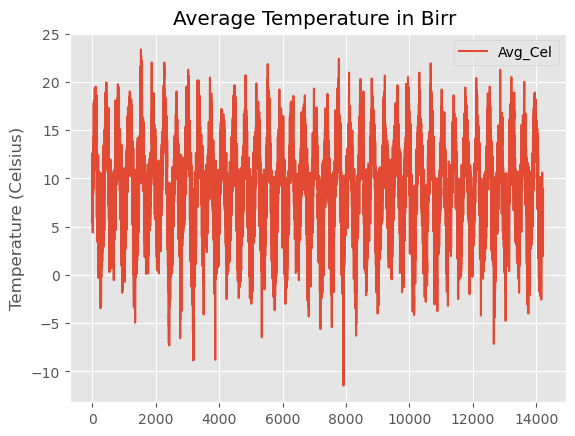

In [99]:
Birr.plot(y="Avg_Cel")
plt.title('Average Temperature in Birr ')
plt.ylabel('Temperature (Celsius)')

In [100]:
Birr.groupby('Year').mean()

Month        Day     Max(F)     Min(F)     Max(C)    Min(C)  Min (F)  \
Year                                                                            
1872  8.497959  15.816327  58.124898  43.757143  14.516327  6.530204      NaN   
1873  6.526027  15.720548  55.109315  41.162466  12.840548  5.093425      NaN   
1874  6.526027  15.720548  56.468219  42.179178  13.591233  5.654521      NaN   
1875  6.526027  15.720548  56.327123  42.785042  13.514247  5.991967      NaN   
1876  6.513661  15.756831  56.321038  42.553825  13.512842  5.865027      NaN   
1877  6.526027  15.720548  55.953973  42.453425  13.308493  5.806027      NaN   
1878  6.526027  15.720548  55.824932  42.532329  13.235616  5.852877      NaN   
1879  6.526027  15.720548  53.112603  39.636438  11.729315  4.244384      NaN   
1880  6.513661  15.756831  56.222131  42.118306  13.453825  5.624317      NaN   
1881  6.526027  15.720548  54.452055  40.746849  12.473151  4.858356      NaN   
1882  6.526027  15.720548  55.459726  41.763836  13.033151  5.427123      NaN   
1883  6.526027  15.720548  54.880548  40.960274  12.710685  4.975616      NaN   
1884  6.513661  15.756831  55.762842  41.864208  13.198087  5.479235      NaN   
1885  6.526027  15.720548  54.383014  40.056712  12.436986  4.476438      NaN   
1886  6.526027  15.720548  54.176986  40.562192  12.320548  4.754247      NaN   
1887  6.526027  15.720548  55.414795  39.598082  13.007945  4.220274      NaN   
1888  6.513661  15.756831  54.131148  40.322404  12.295082  4.623224      NaN   
1889  6.526027  15.720548  55.341644  41.206301  12.966575  5.111781      NaN   
1890  6.526027  15.720548  55.115890  41.332055  12.842466  5.184658      NaN   
1891  6.526027  15.720548  54.493699  40.043562  12.496712  4.468767      NaN   
1892  6.513661  15.756831  53.809016  39.235246  12.113115  4.019945      NaN   
1893  6.526027  15.720548  57.140000  42.051781  13.967397  5.584384      NaN   
1894  6.526027  15.720548  55.715890  40.672055  13.173151  4.819178      NaN   
1895  6.526027  15.720548  54.167123  39.932877  12.314247  4.404932      NaN   
1896  6.513661  15.756831  55.471858  41.490984  13.041530  5.272951      NaN   
1897  6.526027  15.720548  55.520274  42.220000  13.069041  5.678904      NaN   
1898  6.526027  15.720548  56.604110  43.152603  13.668493  6.197260      NaN   
1899  6.526027  15.720548  56.818356  42.215068  13.788493  5.672877      NaN   
1900  6.526027  15.720548  54.915342  41.620000  12.730137  5.345205      NaN   
1901  6.526027  15.720548  54.649863  40.753151  12.582466  4.863014      NaN   
1902  6.526027  15.720548  54.384384  41.536986  12.437260  5.296438      NaN   
1903  6.526027  15.720548  54.635342  41.046301  12.573973  5.026027      NaN   
1904  6.513661  15.756831  54.653005  41.378142  12.587158  5.209016      NaN   
1905  6.526027  15.720548  55.081096  41.510411  12.821918  5.283014      NaN   
1906  6.526027  15.720548  55.359726  40.953699  12.978904  4.974795      NaN   
1907  6.526027  15.720548  54.507123  41.447123  12.503014  5.247945      NaN   
1908  6.513661  15.756831  56.124590  42.343169  13.401366  5.745082      NaN   
1909  6.526027  15.720548  54.614521  40.579452  12.563288  4.766575      NaN   
1910  6.526027  15.720548  54.826849  41.530411  12.684384  5.294521      NaN   
1911  2.000000  15.533333  47.110000  34.523333   8.395556  1.403333      NaN   

        Avg_Cel  
Year             
1872  10.523265  
1873   8.966986  
1874   9.622877  
1875   9.724100  
1876   9.688934  
1877   9.557260  
1878   9.544247  
1879   7.986849  
1880   9.539071  
1881   8.665753  
1882   9.230137  
1883   8.843151  
1884   9.338661  
1885   8.456712  
1886   8.537397  
1887   8.614110  
1888   8.459153  
1889   9.039178  
1890   9.013562  
1891   8.482740  
1892   8.066530  
1893   9.775890  
1894   8.996164  
1895   8.359589  
1896   9.157240  
1897   9.373973  
1898   9.932877  
1899   9.730685  
1900   9.037671  
1901   8.722740  
1902   8.866849  
1903   8.800

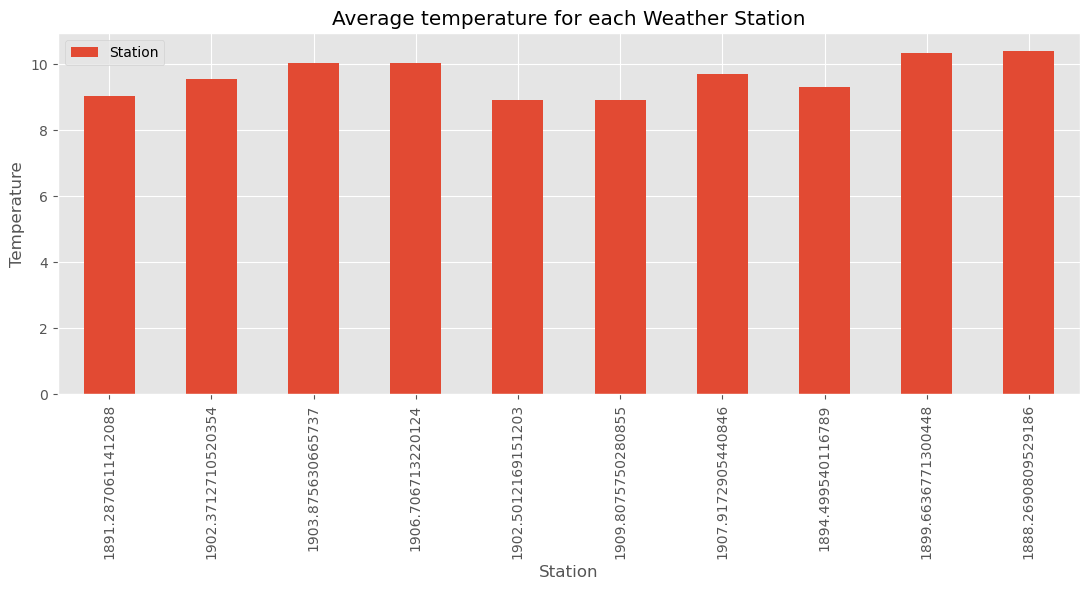

In [101]:
concat.groupby('Station').mean().plot(x="Year", y="Avg_Cel", figsize=(11, 6), label='Station', legend=True, kind='bar',xlabel = "Station", ylabel = "Temperature", title='Average temperature for each Weather Station', )
plt.tight_layout()
plt.show()

In [102]:
concat.groupby('Station').resample('10Y')['Min(C)'].mean()

Station   date      
Birr      1872-12-31    6.530204
          1882-12-31    5.441365
          1892-12-31    4.731399
          1902-12-31    5.313503
          1912-12-31    5.080312
                          ...   
Valentia  1880-12-31    7.849405
          1890-12-31    7.658138
          1900-12-31    7.820633
          1910-12-31    7.706090
          1920-12-31    7.536436
Name: Min(C), Length: 91, dtype: float64

In [103]:
#Birr.resample('10Y').mean()

In [104]:
concat.groupby('Station').Avg_Cel.mean()

Station
Birr            9.029977
Blacksod        9.544836
Fitzwilliam    10.033080
Killarney      10.047253
Malin           8.934557
Markree         8.931574
NUI Galway      9.724859
Phoenix         9.308935
Trinity        10.340941
Valentia       10.422351
Name: Avg_Cel, dtype: float64

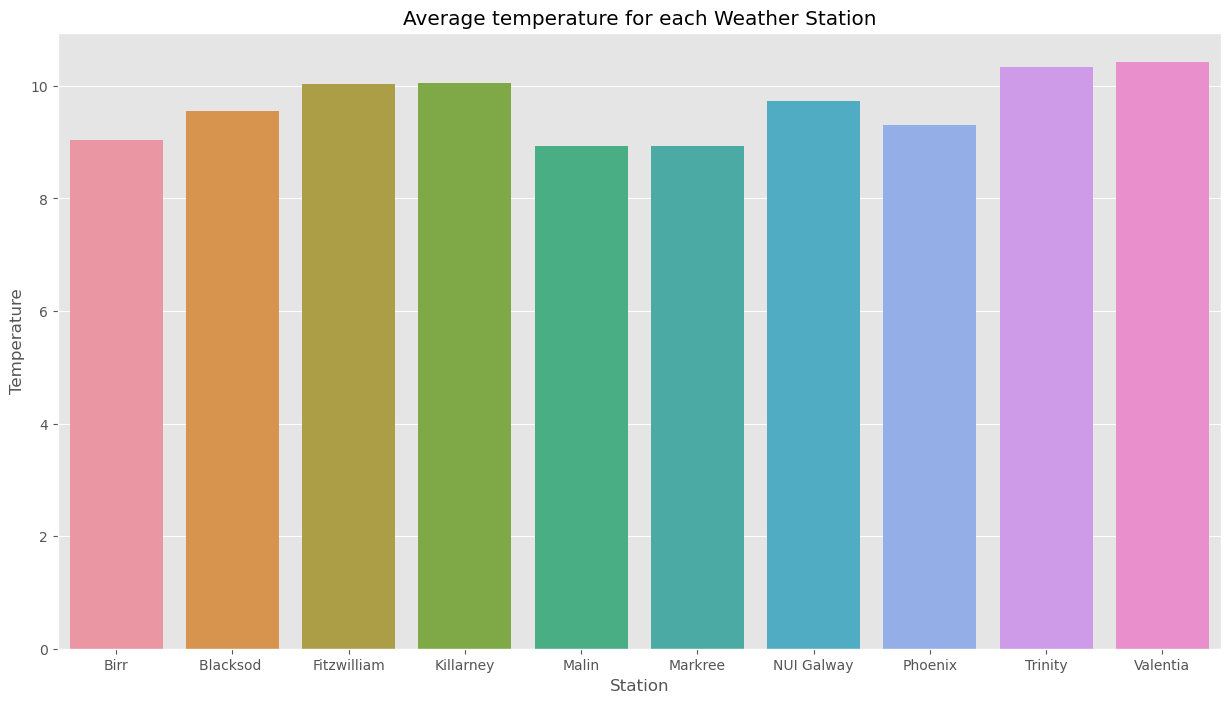

In [105]:
random_dict = {
    "Station": ["Birr", "Blacksod ", "Fitzwilliam", "Killarney", "Malin", "Markree", "NUI Galway", "Phoenix", "Trinity", "Valentia"],
    "Temperature": [9.029977, 9.544836, 10.033080, 10.047253, 8.934557, 8.931574, 9.724859, 9.308935, 10.340941, 10.422351]
}

df = pd.DataFrame.from_dict(random_dict)
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Station", y="Temperature", data=df).set_title('Average temperature for each Weather Station')
#for heights in ax.containers:
#    ax.bar_label(heights)

In [106]:
concat.loc['1872-05-01' : '1872-05-31'].Avg_Cel.mean()

10.047983870967741

In [107]:
#concat.loc[:].Avg_Cel.mean()

In [108]:
warnings.filterwarnings("ignore", category=FutureWarning)
concat.iloc[0 : 1000].mean()

Year       1873.17000
Month         6.87100
Day          15.67600
Max(F)       56.22630
Min(F)       42.13550
Max(C)       13.45960
Min(C)        5.63130
Min (F)           NaN
Avg_Cel       9.54545
dtype: float64

Text(0, 0.5, 'Frequency')

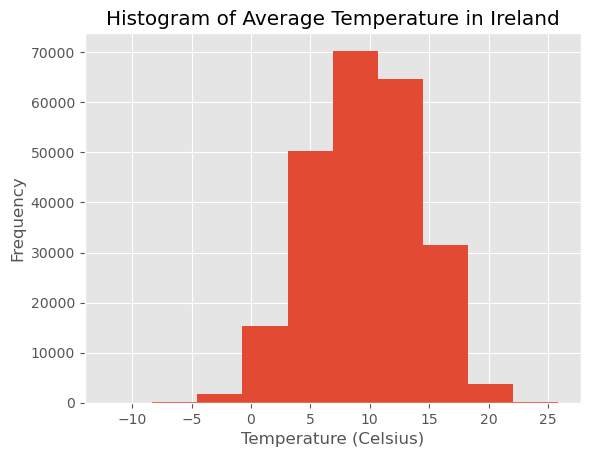

In [109]:
plt.hist(concat.Avg_Cel)
plt.title('Histogram of Average Temperature in Ireland')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Avg_Cel', ylabel='Density'>

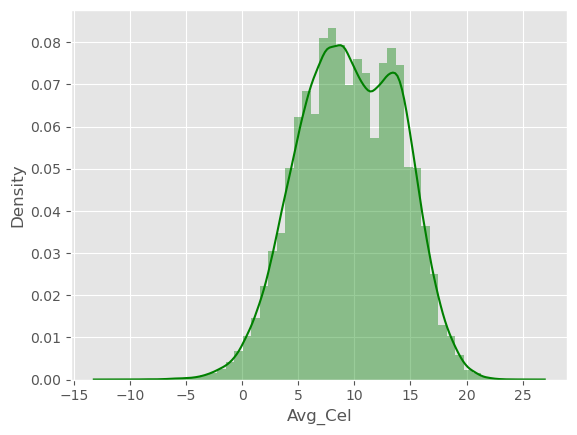

In [110]:
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(concat.Avg_Cel, kde = True, color = "g")

In [111]:
concat.Avg_Cel.isnull().values.any()

True

In [112]:
concat.Avg_Cel.dtype

dtype('float64')

In [113]:
Avg_Cel = concat.Avg_Cel.astype(float)

In [114]:
concat.Avg_Cel.dtype

dtype('float64')

In [115]:
Avg_Cel.dtype

dtype('float64')

In [116]:
mean = Avg_Cel.mean()

In [117]:
std = Avg_Cel.std()

In [118]:
size = len(concat)

In [119]:
rng = np.random.default_rng()
ts = pd.DataFrame(data=rng.normal(mean,std,size),index=concat.index, columns=['Temp'])
ts

Temp
date                 
1872-05-01   5.279960
1872-05-02  16.801023
1872-05-03  10.798115
1872-05-04   5.321005
1872-05-05   0.308598
...               ...
1909-09-26   7.873739
1909-09-27  22.345154
1909-09-28   9.817960
1909-09-29   7.169592
1909-09-30   8.272771

[295330 rows x 1 columns]

In [120]:
concat['Syn Temp'] = ts.Temp
concat

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  \
date                                                                     
1872-05-01  1872      5    1    59.5    49.6    15.3     9.8      Birr   
1872-05-02  1872      5    2    56.8    47.6    13.8     8.7      Birr   
1872-05-03  1872      5    3    62.5    42.7    16.9     5.9      Birr   
1872-05-04  1872      5    4    59.2    42.1    15.1     5.6      Birr   
1872-05-05  1872      5    5    54.6    40.1    12.6     4.5      Birr   
...          ...    ...  ...     ...     ...     ...     ...       ...   
1909-09-26  1909      9   26    62.9    47.2    17.2     8.4  Valentia   
1909-09-27  1909      9   27    60.6    56.2    15.9    13.4  Valentia   
1909-09-28  1909      9   28    63.5    54.9    17.5    12.7  Valentia   
1909-09-29  1909      9   29    61.0    45.4    16.1     7.4  Valentia   
1909-09-30  1909      9   30    60.9    45.5    16.1     7.5  Valentia   

            Min (F)  Avg_Cel   Syn Temp  
date                                     
1872-05-01      NaN    12.55   5.279960  
1872-05-02      NaN    11.25  16.801023  
1872-05-03      NaN    11.40  10.798115  
1872-05-04      NaN    10.35   5.321005  
1872-05-05      NaN     8.55   0.308598  
...             ...      ...        ...  
1909-09-26      NaN    12.80   7.873739  
1909-09-27      NaN    14.65  22.345154  
1909-09-28      NaN    15.10   9.817960  
1909-09-29      NaN    11.75   7.169592  
1909-09-30      NaN    11.80   8.272771  

[295330 rows x 11 columns]

In [121]:
#concat = pd.concat(['concat','ts']).reset_index(drop=True)

Text(0, 0.5, 'Frequency')

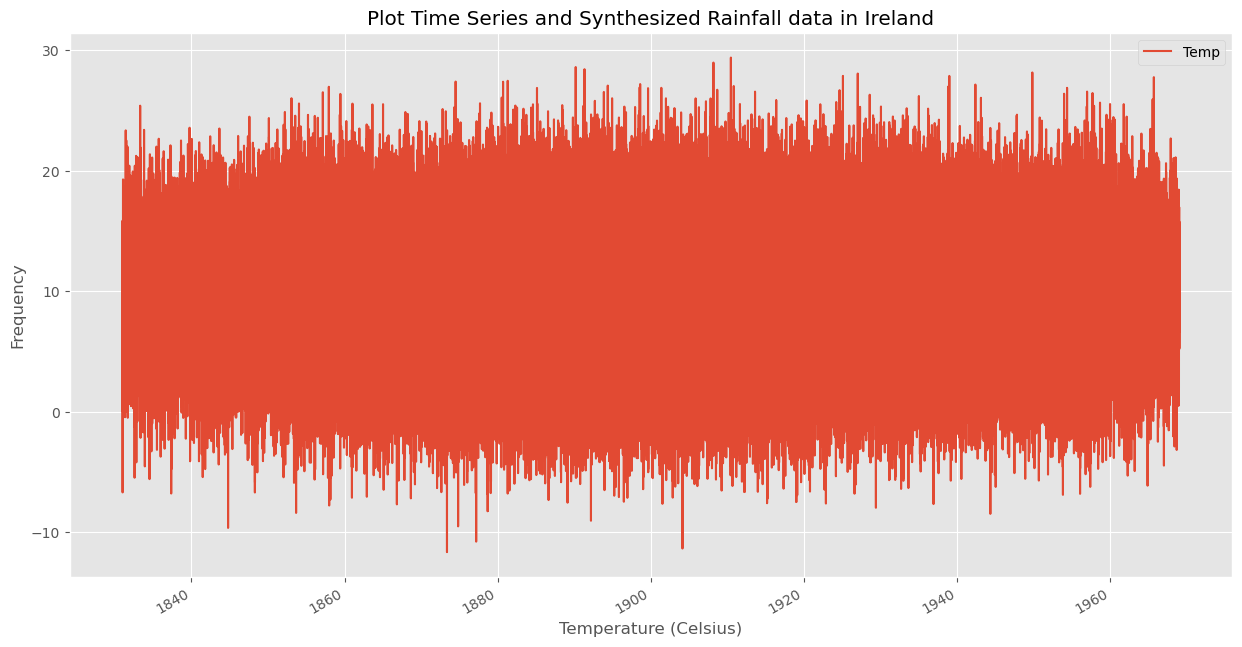

In [122]:
ts.plot(figsize=(15,8))
plt.title('Plot Time Series and Synthesized Rainfall data in Ireland')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')

In [123]:
ts.resample('Y').mean()

Temp
date                 
1831-12-31  10.138446
1832-12-31   9.837462
1833-12-31   9.524738
1834-12-31   9.526949
1835-12-31  10.035352
...               ...
1964-12-31   9.759147
1965-12-31   9.645076
1966-12-31   9.766985
1967-12-31   9.705634
1968-12-31   9.469408

[138 rows x 1 columns]

Text(0, 0.5, 'Frequency')

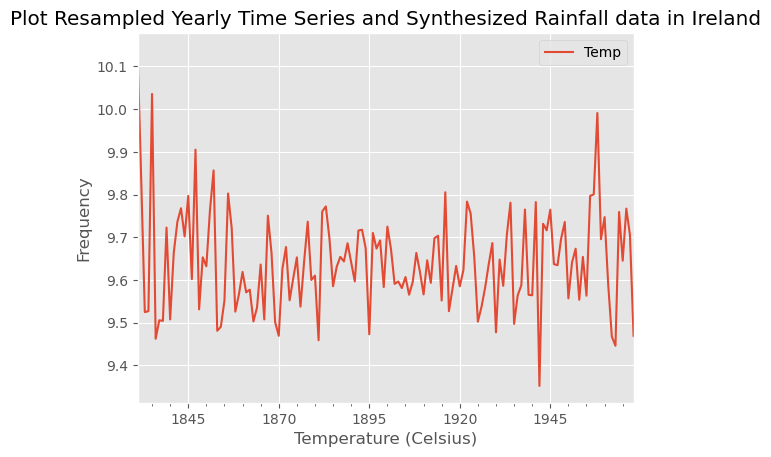

In [124]:
ts.resample('Y').mean().plot()
plt.title('Plot Resampled Yearly Time Series and Synthesized Rainfall data in Ireland')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')

In [125]:
ts.resample('10Y').mean()

Temp
date                 
1831-12-31  10.138446
1841-12-31   9.625025
1851-12-31   9.714116
1861-12-31   9.618691
1871-12-31   9.577916
1881-12-31   9.605478
1891-12-31   9.661399
1901-12-31   9.663729
1911-12-31   9.602597
1921-12-31   9.630254
1931-12-31   9.626359
1941-12-31   9.636530
1951-12-31   9.646651
1961-12-31   9.708470
1971-12-31   9.597217

Text(0, 0.5, 'Frequency')

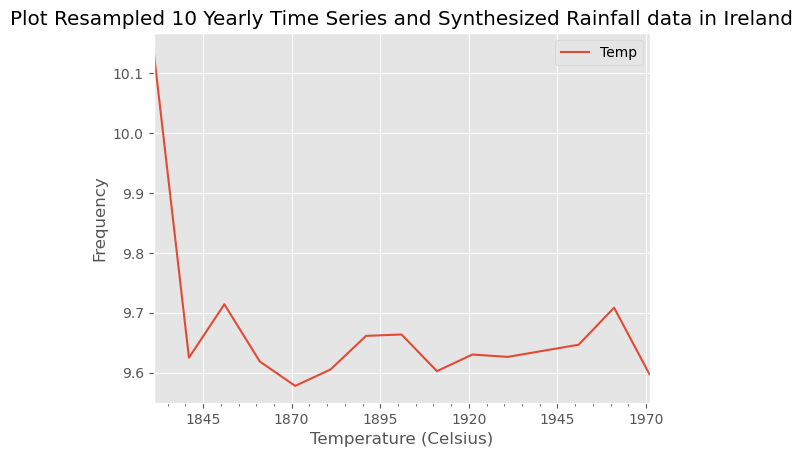

In [126]:
ts.resample('10Y').mean().plot()
plt.title('Plot Resampled 10 Yearly Time Series and Synthesized Rainfall data in Ireland')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')

In [127]:
concat.sort_values(by='date')

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)  Station  \
date                                                                    
1831-01-01  1831      1    1     NaN     NaN     NaN     NaN  Phoenix   
1831-01-02  1831      1    2     NaN     NaN     NaN     NaN  Phoenix   
1831-01-03  1831      1    3     NaN     NaN     NaN     NaN  Phoenix   
1831-01-04  1831      1    4     NaN     NaN     NaN     NaN  Phoenix   
1831-01-05  1831      1    5     NaN     NaN     NaN     NaN  Phoenix   
...          ...    ...  ...     ...     ...     ...     ...      ...   
1968-12-27  1968     12   27     NaN     NaN     4.2    -2.8  Markree   
1968-12-28  1968     12   28     NaN     NaN     4.0     0.0  Markree   
1968-12-29  1968     12   29     NaN     NaN     5.9    -1.0  Markree   
1968-12-30  1968     12   30     NaN     NaN     7.6    -1.5  Markree   
1968-12-31  1968     12   31     NaN     NaN     8.6     2.4  Markree   

            Min (F)  Avg_Cel   Syn Temp  
date                                     
1831-01-01      NaN      NaN   4.779588  
1831-01-02      NaN      NaN  12.868352  
1831-01-03      NaN      NaN   7.362498  
1831-01-04      NaN      NaN  15.857803  
1831-01-05      NaN      NaN   9.198127  
...             ...      ...        ...  
1968-12-27      NaN     0.70  12.682528  
1968-12-28      NaN     2.00   5.203142  
1968-12-29      NaN     2.45  15.786532  
1968-12-30      NaN     3.05  14.845777  
1968-12-31      NaN     5.50  12.613067  

[295330 rows x 11 columns]

Text(0.5, 1.0, 'Temperature in Ireland between 1831 and 1968')

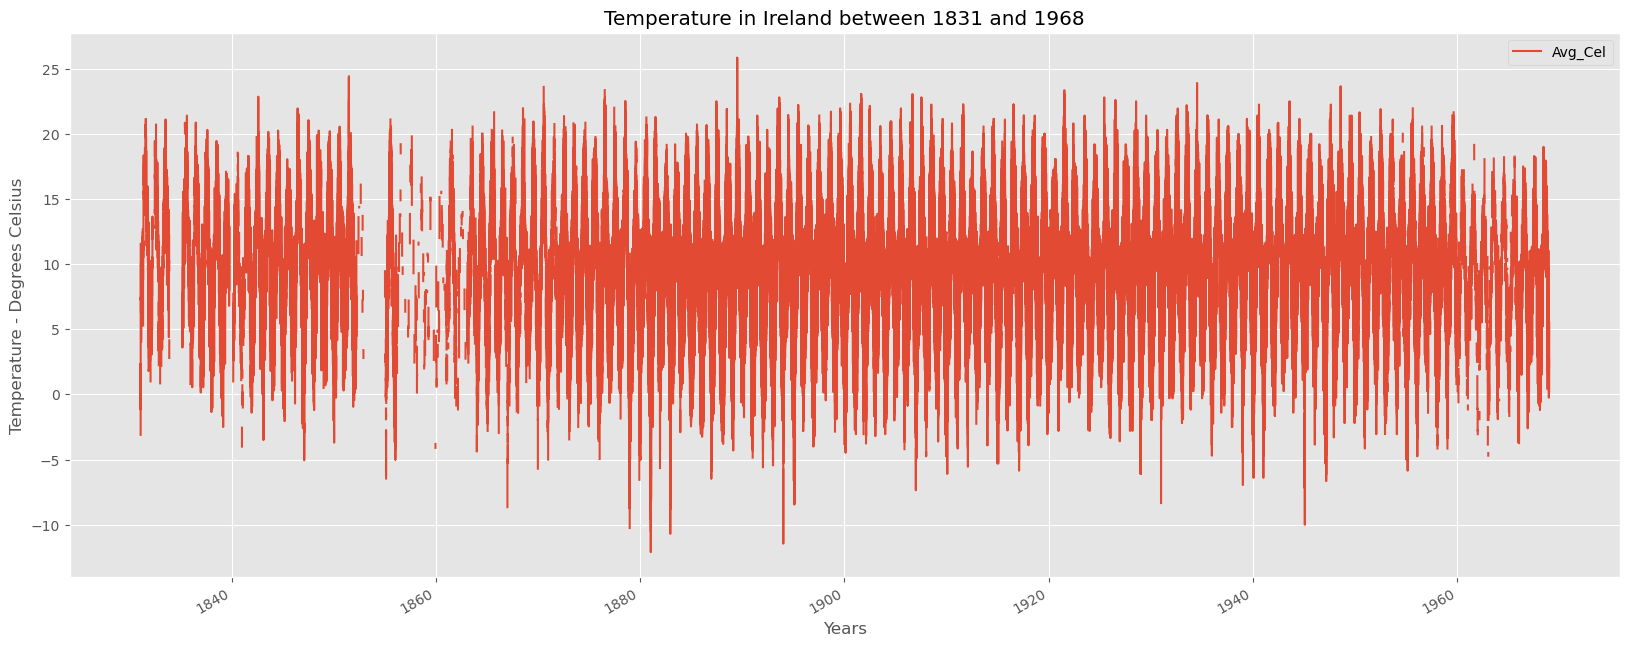

In [128]:
concat.plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8))
plt.title('Temperature in Ireland between 1831 and 1968')

In [129]:
concat.resample('Y').mean()

Year     Month        Day     Max(F)     Min(F)     Max(C)  \
date                                                                       
1831-12-31  1831.0  6.526027  15.720548  57.285522  46.534483  14.047475   
1832-12-31  1832.0  6.513661  15.756831  55.440000  46.199013  13.022857   
1833-12-31  1833.0  6.526027  15.720548  56.446774  46.188172  13.580968   
1834-12-31  1834.0  6.526027  15.720548  57.869775        NaN  14.370096   
1835-12-31  1835.0  6.526027  15.720548  56.569132  49.054475  13.649196   
...            ...       ...        ...        ...        ...        ...   
1964-12-31  1964.0  6.513661  15.756831  47.100000        NaN  12.480570   
1965-12-31  1965.0  6.071749  15.717489        NaN        NaN  12.378042   
1966-12-31  1966.0  6.526027  15.720548        NaN        NaN  12.684384   
1967-12-31  1967.0  6.526027  15.720548        NaN        NaN  12.868219   
1968-12-31  1968.0  6.513661  15.756831        NaN        NaN  13.208470   

              Min(C)  Min (F)    Avg_Cel   Syn Temp  
date                                                 
1831-12-31  8.074483      NaN  10.926337  10.138446  
1832-12-31  7.885855      NaN  10.227919   9.837462  
1833-12-31  7.883154      NaN  10.901509   9.524738  
1834-12-31       NaN      NaN        NaN   9.526949  
1835-12-31  9.477043      NaN  12.117689  10.035352  
...              ...      ...        ...        ...  
1964-12-31  5.124297      NaN   8.813601   9.759147  
1965-12-31  4.609019      NaN   8.493369   9.645076  
1966-12-31  5.206849      NaN   8.945616   9.766985  
1967-12-31  4.986301      NaN   8.927260   9.705634  
1968-12-31  4.628962      NaN   8.918716   9.469408  

[138 rows x 10 columns]

Text(0.5, 1.0, 'Temperature in Ireland between 1831 and 1968')

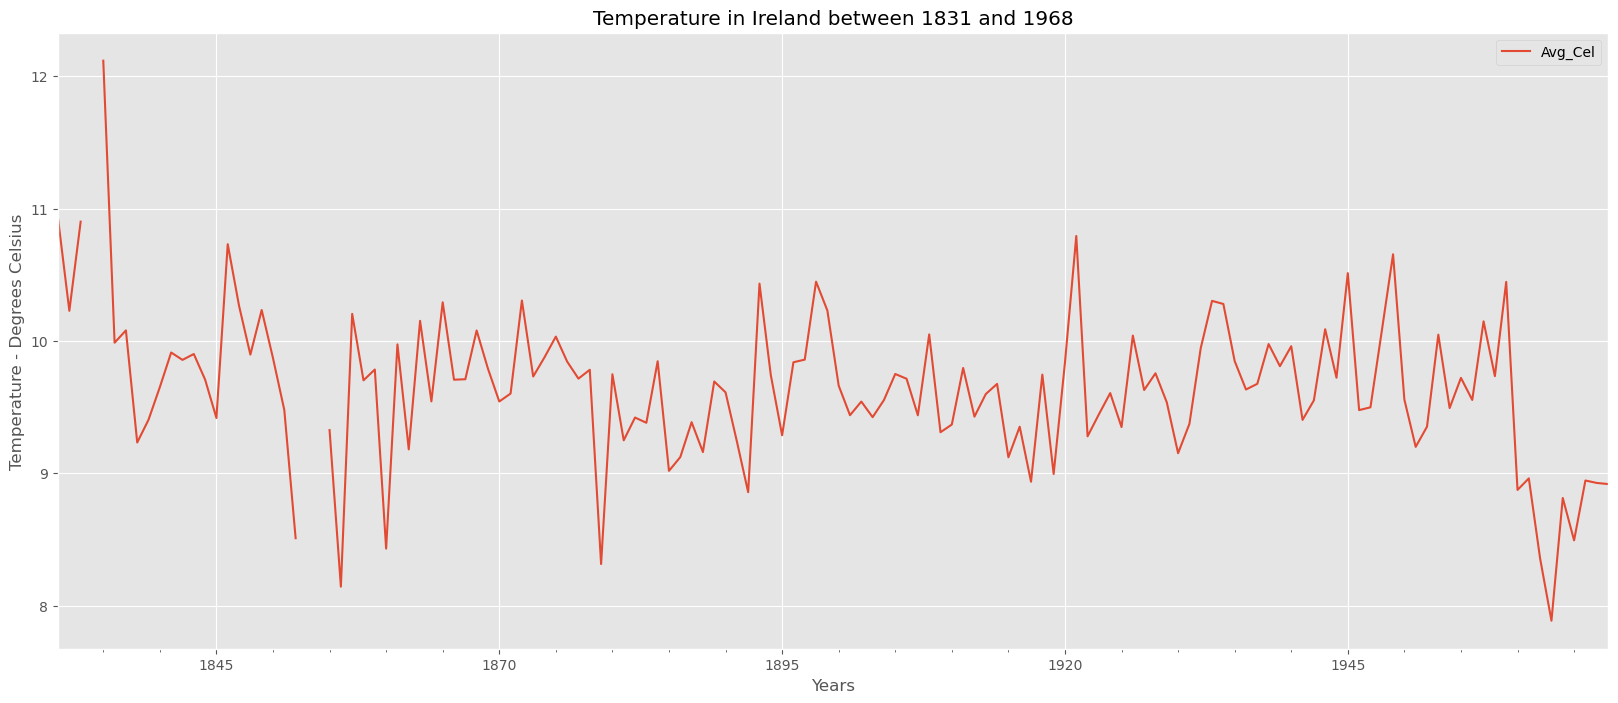

In [130]:
concat.resample('Y').mean().plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8))
plt.title('Temperature in Ireland between 1831 and 1968')

In [131]:
#sns.lineplot(data=concat, y="Avg_Cel", hue='Station')
#plt.title('Temperature in Ireland between 1831 and 1968')

In [132]:
df_cork = pd.read_csv("./data/cork_airport_climate_averages_1961_1990.csv")
df_cork

Cork Airport 1961-1990 averages Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0        TEMPERATURE (degrees Celsius)        Jan        Feb        Mar   
1                      mean daily max.        7.6        7.5        9.3   
2                      mean daily min.        2.6        2.5        3.1   
3                                 mean        5.1          5        6.2   
4                        absolute max.       12.6       13.5       15.5   
5                        absolute min.       -8.5       -8.6       -6.1   
6      mean no. of days with air frost        6.7        5.6        3.4   
7   mean no. of days with ground frost         15       12.7         12   
8                                  NaN        NaN        NaN        NaN   
9                RELATIVE HUMIDITY (%)        NaN        NaN        NaN   
10                     mean at 0900UTC         90         90         88   
11                     mean at 1500UTC         84         80         75   
12                                 NaN        NaN        NaN        NaN   
13                    SUNSHINE (hours)        NaN        NaN        NaN   
14                 mean daily duration        1.7       2.28       3.51   
15             greatest daily duration        7.3        9.3       11.8   
16        mean no. of days with no sun         11          9          6   
17                                 NaN        NaN        NaN        NaN   
18                       RAINFALL (mm)        NaN        NaN        NaN   
19                  mean monthly total      138.3      115.6       98.7   
20                greatest daily total       55.1       48.2       39.3   
21      mean no. of days with >= 0.2mm         20         17         18   
22      mean no. of days with >= 1.0mm         16         13         13   
23      mean no. of days with >= 5.0mm          9          8          6   
24                                 NaN        NaN        NaN        NaN   
25                        WIND (knots)        NaN        NaN        NaN   
26                  mean monthly speed       12.9       12.6       12.3   
27                           max. gust         94         83         70   
28           max. mean 10-minute speed         58         54         44   
29         mean no. of days with gales        3.2        2.2        1.7   
30                                 NaN        NaN        NaN        NaN   
31  WEATHER (mean no. of days with...)        NaN        NaN        NaN   
32                       snow or sleet        4.5        4.7          3   
33               snow lying at 0900UTC        2.7        1.8        0.4   
34                                hail          1        1.1        1.9   
35                             thunder        0.4        0.1        0.1   
36                                 fog        7.4        7.3        7.9   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0         Apr        May        Jun        Jul        Aug        Sep   
1        11.3       13.8       16.6       18.5       18.2         16   
2         4.2        6.5        9.2       11.1       10.9        9.4   
3         7.7       10.2       12.9       14.8       14.5       12.7   
4        20.5       23.6       25.7       28.7       27.5       24.7   
5        -2.4       -0.9        2.4        4.8        4.9        2.3   
6         1.8        0.1          0          0          0          0   
7         9.4        2.9        0.2          0          0        0.4   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
10         83         81         81         83         86         88   
11         71         71         72         72         73         76   
12        NaN        NaN        NaN        NaN        NaN        NaN   
13        NaN        NaN        NaN        NaN        NaN        NaN   
14       5.21       6.02       5.73        5.4       5.14       4.13   
15  

In [133]:
df_rainfall = pd.read_csv("./data/IOI_1711_SERIES.csv")
df_rainfall

Year  Month  Median montly series
0     1711      1                  16.4
1     1711      2                  73.1
2     1711      3                 121.2
3     1711      4                  85.2
4     1711      5                  66.6
...    ...    ...                   ...
3667  2016      8                  79.1
3668  2016      9                 108.1
3669  2016     10                  51.8
3670  2016     11                  58.0
3671  2016     12                  92.1

[3672 rows x 3 columns]

In [134]:
df_rainfall['Median montly series'].mean()

90.05637254901966

Text(0.5, 1.0, 'Rainfall in Ireland between 1711 and 2016')

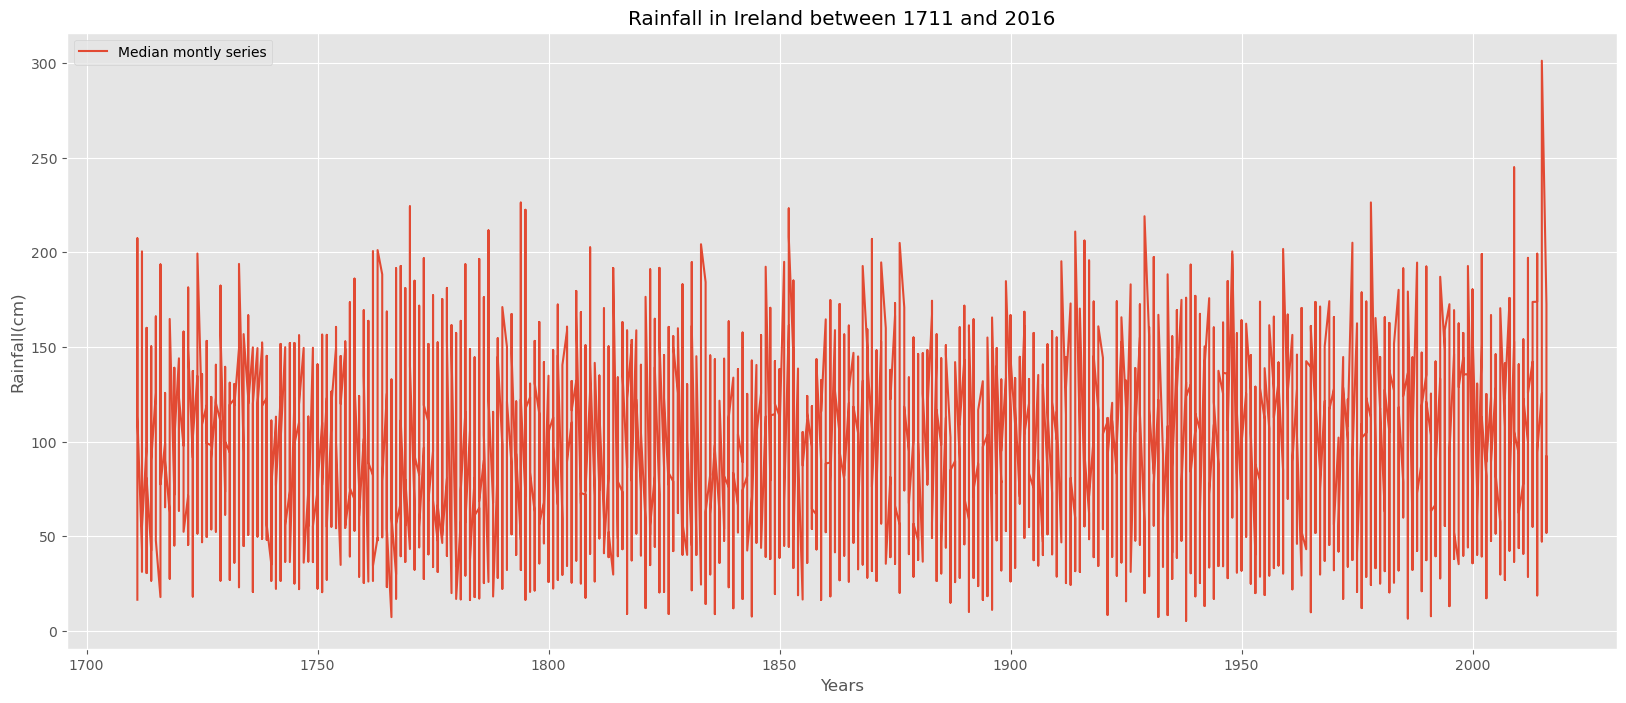

In [135]:
df_rainfall.plot(x="Year", y="Median montly series", xlabel=('Years'), ylabel=('Rainfall(cm)'), figsize=(20,8))
plt.title('Rainfall in Ireland between 1711 and 2016')

Text(0, 0.5, 'Frequency')

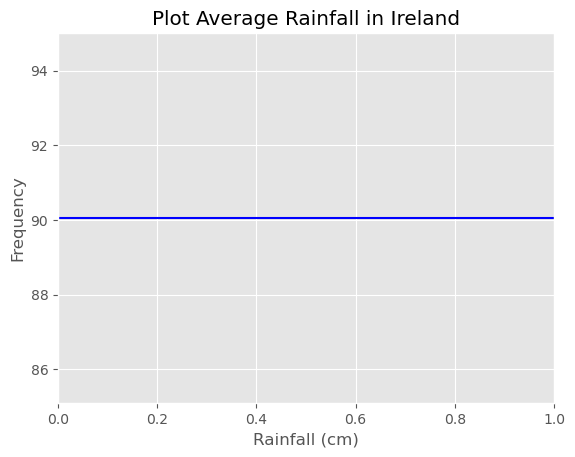

In [136]:
plt.axhline(y=90.05637254901966, color='b', linestyle='-')
plt.title('Plot Average Rainfall in Ireland')
plt.xlabel('Rainfall (cm)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Rainfall in Ireland between 1711 and 2016')

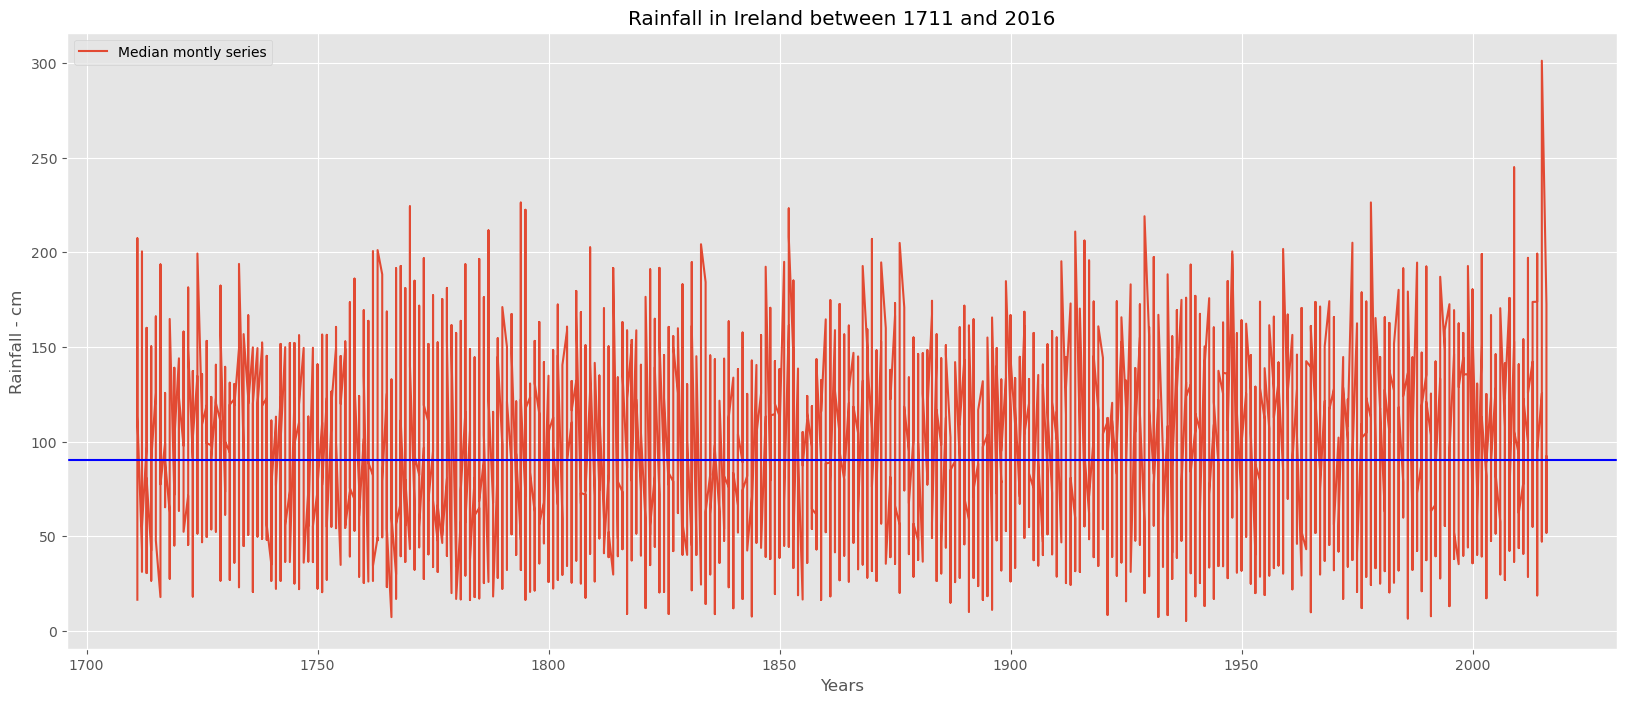

In [137]:
df_rainfall.plot(x="Year", y="Median montly series", xlabel=('Years'), ylabel=('Rainfall - cm'), figsize=(20,8))
plt.axhline(y=90.05637254901966, color='b', linestyle='-')
plt.title('Rainfall in Ireland between 1711 and 2016')

In [138]:
year_avg = df_rainfall.groupby("Year").mean()
year_avg

Month  Median montly series
Year                             
1711    6.5             90.966667
1712    6.5            104.383333
1713    6.5             81.875000
1714    6.5             73.683333
1715    6.5            104.833333
...     ...                   ...
2012    6.5             98.641667
2013    6.5             93.041667
2014    6.5            105.225000
2015    6.5            112.166667
2016    6.5             88.391667

[306 rows x 2 columns]

Text(0.5, 1.0, 'Rainfall in Ireland between 1711 and 2016')

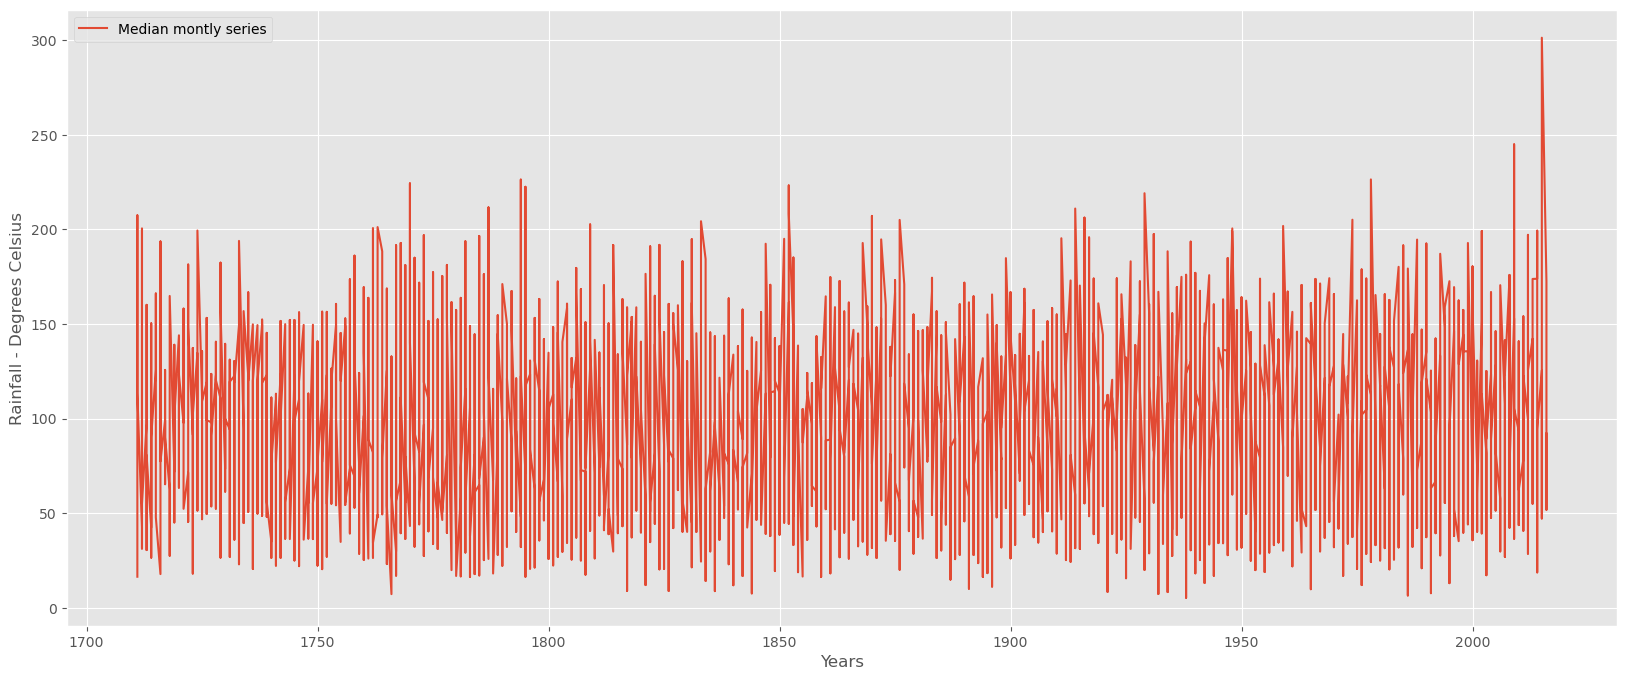

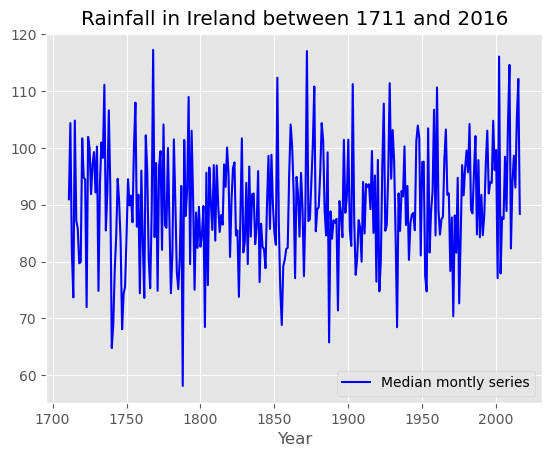

In [139]:
df_rainfall.plot(x="Year", y="Median montly series", xlabel=('Years'), ylabel=('Rainfall - Degrees Celsius'), figsize=(20,8))
year_avg.plot(y="Median montly series", color="b" )
plt.title('Rainfall in Ireland between 1711 and 2016')

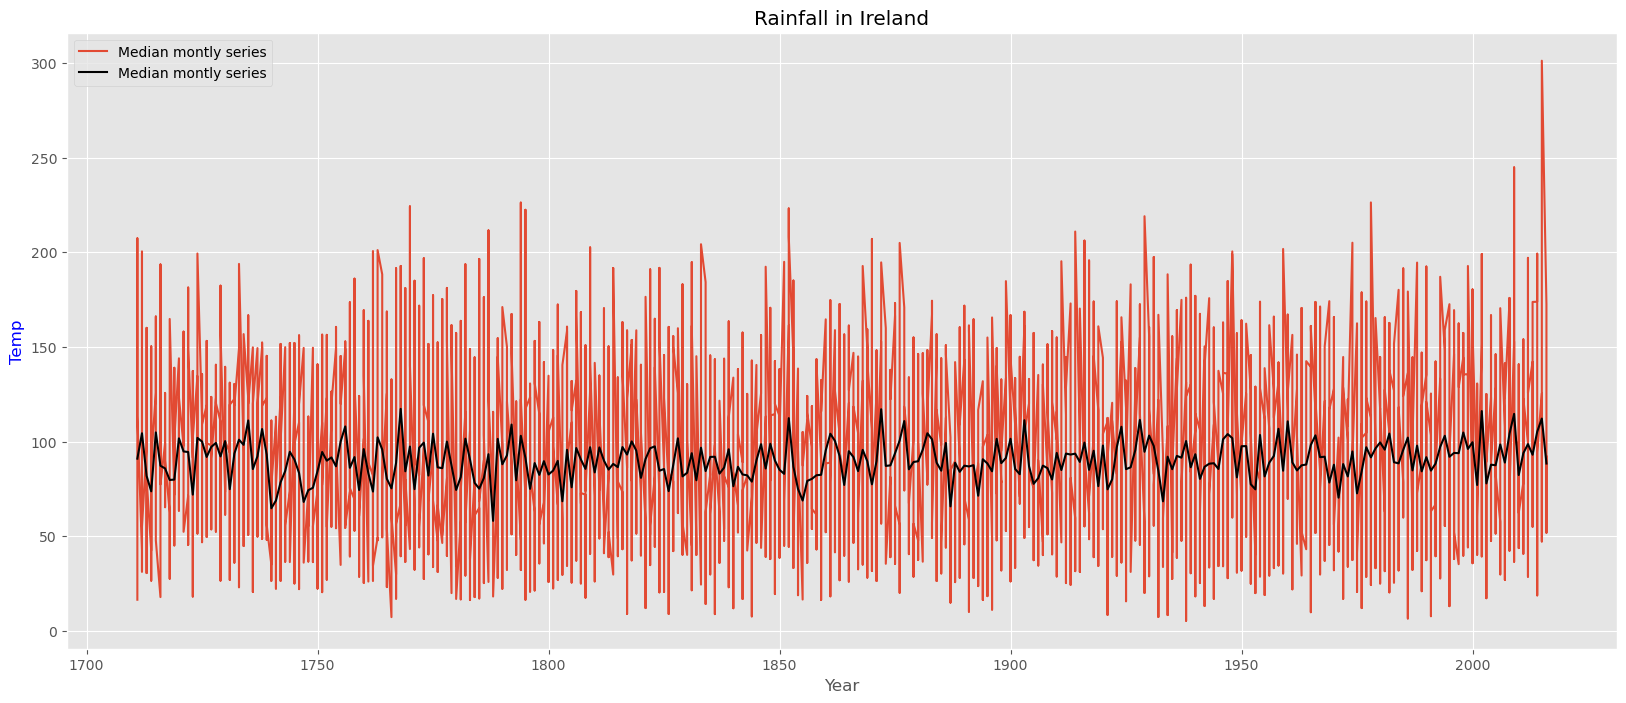

In [140]:
fig, ax = plt.subplots(figsize=(20,8))
df_rainfall.plot(x="Year", y="Median montly series", xlabel=('Years'),ax=ax)
ax.set_ylabel('Temp', color='b')
#ax.set_xlim(0, 800000)
year_avg.plot(y="Median montly series", color='k',ax=ax )
#ax.right_ax.set_ylabel('Temperature')
plt.title('Rainfall in Ireland')
plt.show()

In [141]:
concat.Avg_Cel.mean()

9.62459703044022

In [142]:
MTT=concat.groupby(concat.index.strftime("%m")).Avg_Cel.mean()
MTT

date
01     5.271785
02     5.545378
03     6.298720
04     8.211001
05    10.845588
06    13.600754
07    14.955017
08    14.803078
09    12.988522
10     9.915392
11     7.146968
12     5.753010
Name: Avg_Cel, dtype: float64

In [143]:
#concat = concat.reset_index()

In [144]:
year_avg=concat.groupby(concat.Year).Avg_Cel.mean()
year_avg

Year
1831    10.926337
1832    10.227919
1833    10.901509
1834          NaN
1835    12.117689
          ...    
1964     8.813601
1965     8.493369
1966     8.945616
1967     8.927260
1968     8.918716
Name: Avg_Cel, Length: 138, dtype: float64

In [145]:
year_avg.dropna()

Year
1831    10.926337
1832    10.227919
1833    10.901509
1835    12.117689
1836     9.986861
          ...    
1964     8.813601
1965     8.493369
1966     8.945616
1967     8.927260
1968     8.918716
Name: Avg_Cel, Length: 135, dtype: float64

In [146]:
#year_avg = year_avg.rename(columns={'Year': 'Years'})
#year_avg
concat['year_avg'] = year_avg
concat

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  \
date                                                                     
1872-05-01  1872      5    1    59.5    49.6    15.3     9.8      Birr   
1872-05-02  1872      5    2    56.8    47.6    13.8     8.7      Birr   
1872-05-03  1872      5    3    62.5    42.7    16.9     5.9      Birr   
1872-05-04  1872      5    4    59.2    42.1    15.1     5.6      Birr   
1872-05-05  1872      5    5    54.6    40.1    12.6     4.5      Birr   
...          ...    ...  ...     ...     ...     ...     ...       ...   
1909-09-26  1909      9   26    62.9    47.2    17.2     8.4  Valentia   
1909-09-27  1909      9   27    60.6    56.2    15.9    13.4  Valentia   
1909-09-28  1909      9   28    63.5    54.9    17.5    12.7  Valentia   
1909-09-29  1909      9   29    61.0    45.4    16.1     7.4  Valentia   
1909-09-30  1909      9   30    60.9    45.5    16.1     7.5  Valentia   

            Min (F)  Avg_Cel   Syn Temp  year_avg  
date                                               
1872-05-01      NaN    12.55   5.279960       NaN  
1872-05-02      NaN    11.25  16.801023       NaN  
1872-05-03      NaN    11.40  10.798115       NaN  
1872-05-04      NaN    10.35   5.321005       NaN  
1872-05-05      NaN     8.55   0.308598       NaN  
...             ...      ...        ...       ...  
1909-09-26      NaN    12.80   7.873739       NaN  
1909-09-27      NaN    14.65  22.345154       NaN  
1909-09-28      NaN    15.10   9.817960       NaN  
1909-09-29      NaN    11.75   7.169592       NaN  
1909-09-30      NaN    11.80   8.272771       NaN  

[295330 rows x 12 columns]

Text(0, 0.5, 'Rainfall(cm)')

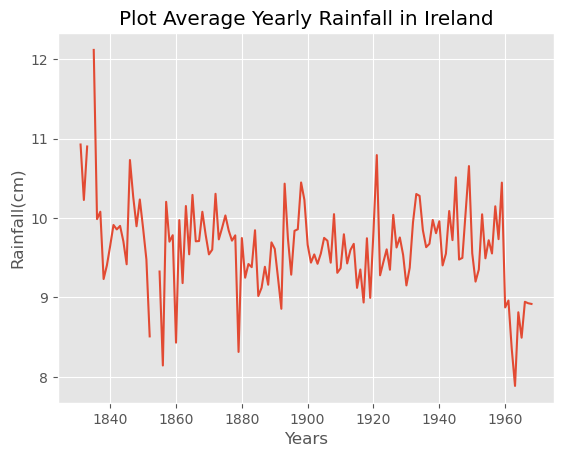

In [147]:
year_avg.plot()
plt.title('Plot Average Yearly Rainfall in Ireland')
plt.xlabel('Years')
plt.ylabel('Rainfall(cm)')

In [148]:
#concat = concat.reset_index()

In [149]:
temp_year = concat.groupby(concat.index.strftime("%m")).Avg_Cel.mean()
temp_year

date
01     5.271785
02     5.545378
03     6.298720
04     8.211001
05    10.845588
06    13.600754
07    14.955017
08    14.803078
09    12.988522
10     9.915392
11     7.146968
12     5.753010
Name: Avg_Cel, dtype: float64

In [150]:
#concat = concat.reset_index()

In [151]:
concat['temp_year'] = concat.groupby(concat.index.strftime("%y")).Avg_Cel.mean()
concat['temp_year']

date
1872-05-01   NaN
1872-05-02   NaN
1872-05-03   NaN
1872-05-04   NaN
1872-05-05   NaN
              ..
1909-09-26   NaN
1909-09-27   NaN
1909-09-28   NaN
1909-09-29   NaN
1909-09-30   NaN
Name: temp_year, Length: 295330, dtype: float64

Text(0, 0.5, 'Temperature(Celsius)')

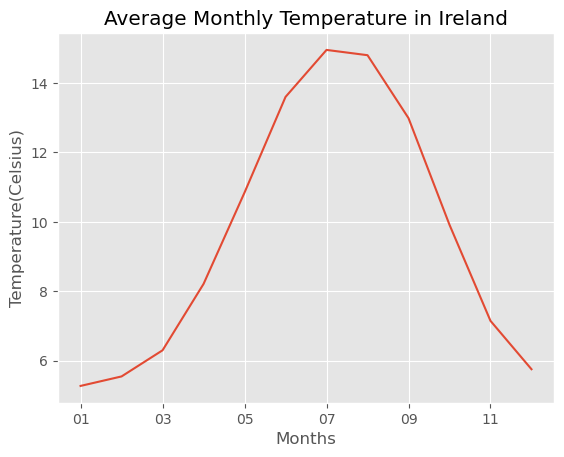

In [152]:
temp_year.plot()
plt.title('Average Monthly Temperature in Ireland')
plt.xlabel('Months')
plt.ylabel('Temperature(Celsius)')

In [153]:
#sns.distplot(temp_year, kde = True, color = "g", bins = 12)

Text(0.5, 1.0, 'Temperature in Ireland between 1831 and 1968')

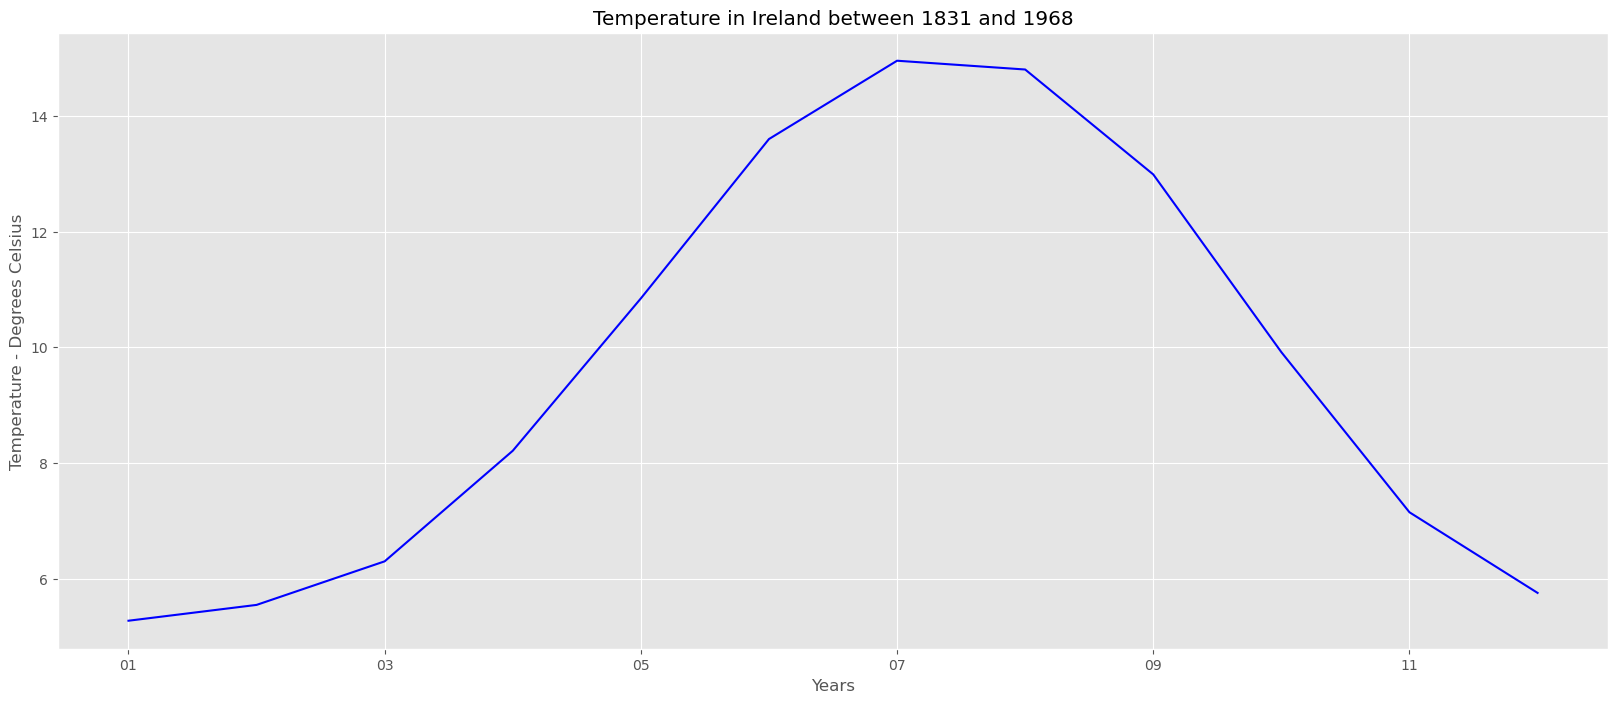

In [154]:
temp_year.plot(y="temp_year", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8), color="b")
plt.title('Temperature in Ireland between 1831 and 1968')

In [155]:
#concat.plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8))
#temp_year.plot(y="temp_year", figsize=(20,8), color="b")
#temp_year.plot(color="b")
#plt.title('Temperature Anomaly in Ireland between 1831 and 1968')

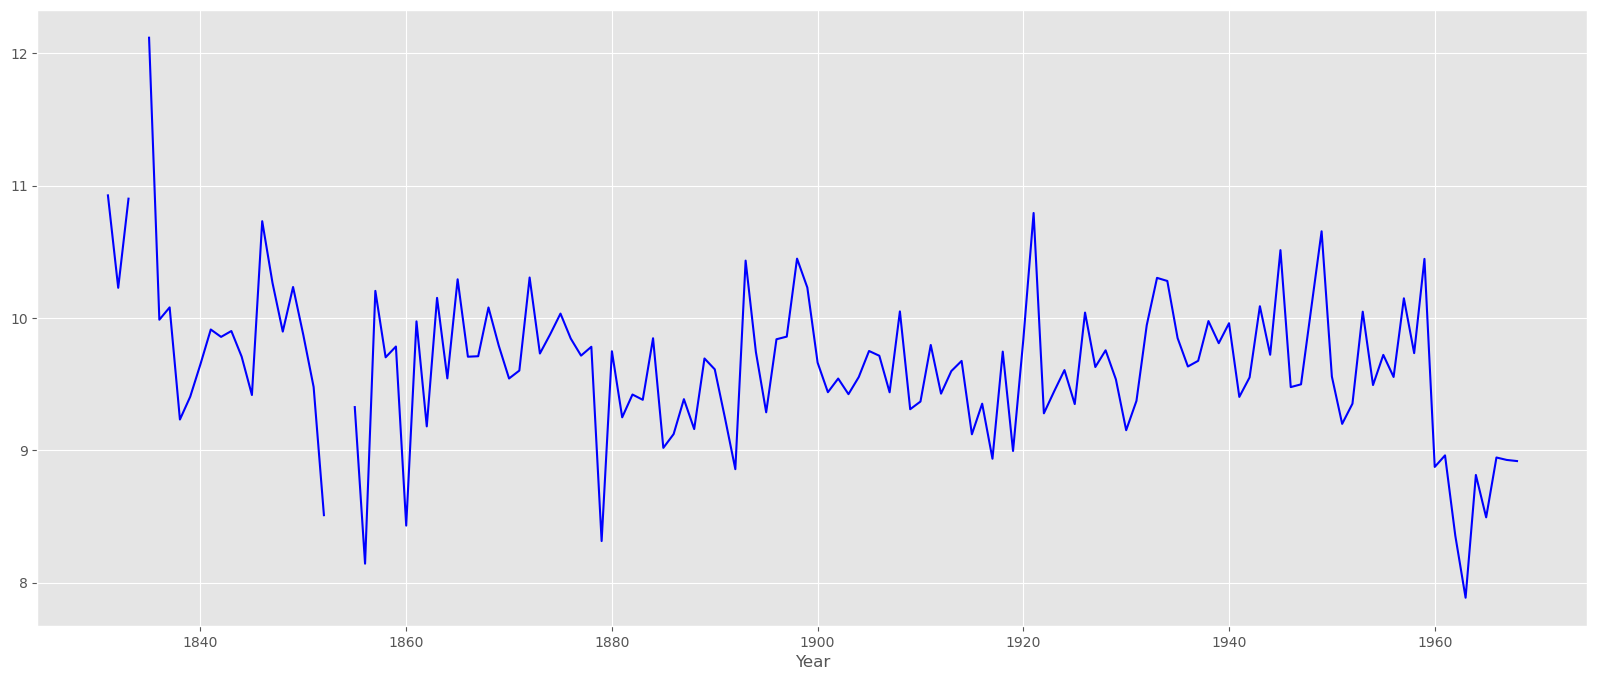

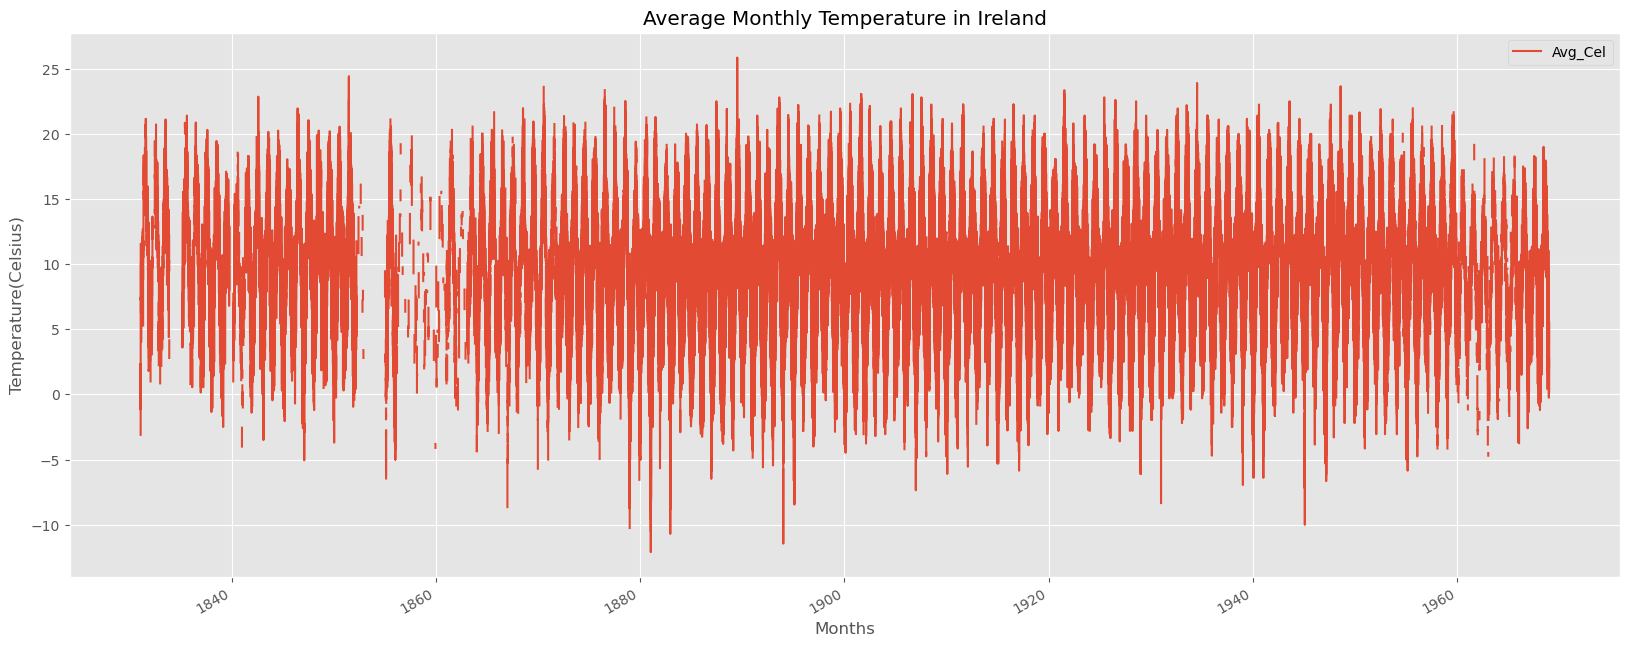

In [156]:
fig, ax = plt.subplots(figsize=(20,8))
concat.plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'),figsize=(20,8))
year_avg.plot(figsize=(20,8), color="b", ax=ax)
plt.title('Temperature and CO2 over the past 800,000 years')
plt.title('Average Monthly Temperature in Ireland')
plt.xlabel('Months')
plt.ylabel('Temperature(Celsius)')
plt.show()

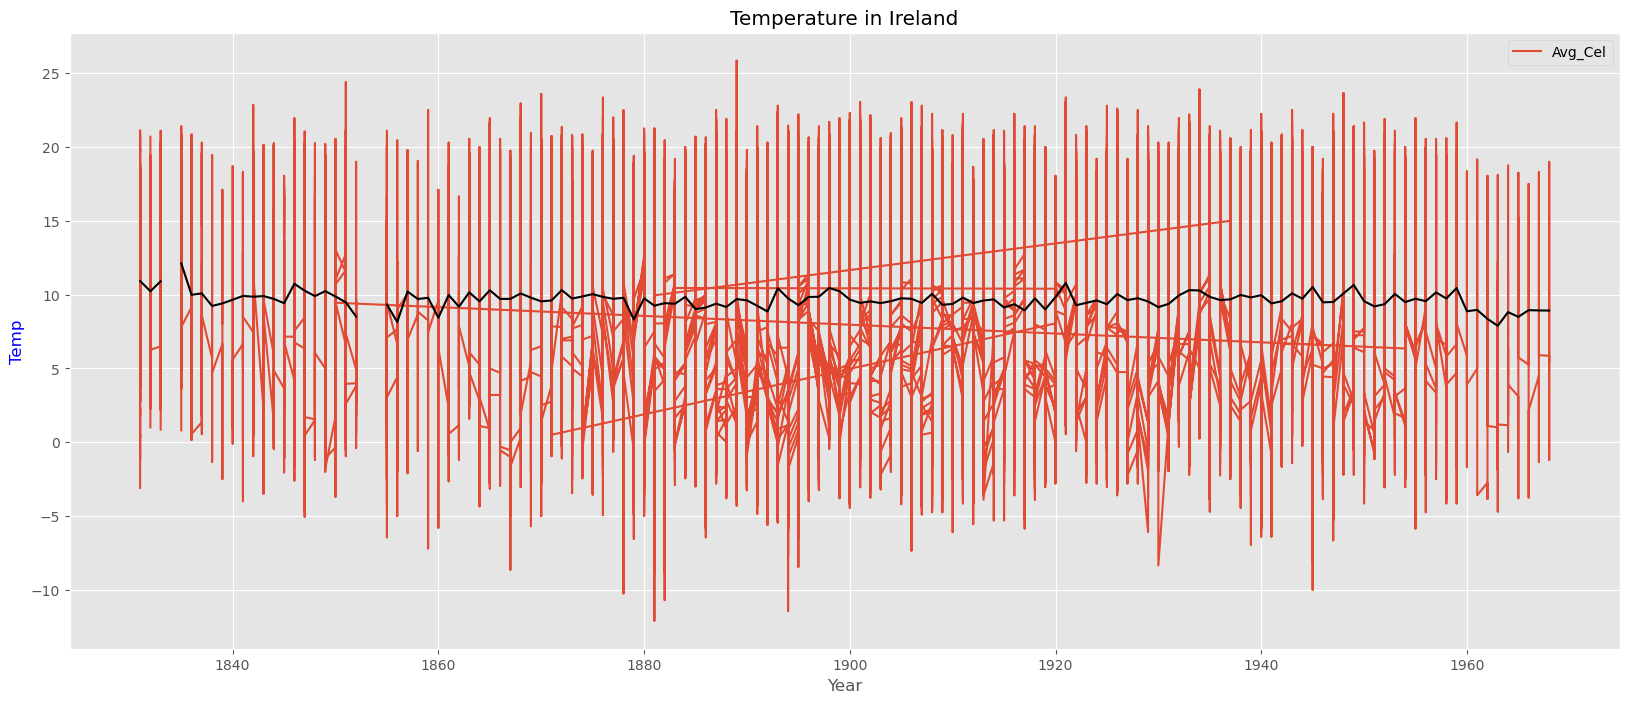

In [157]:
fig, ax = plt.subplots(figsize=(20,8))
concat.plot(x="Year", y="Avg_Cel",ax=ax)
ax.set_ylabel('Temp', color='b')
#ax.set_xlim(0, 800000)
year_avg.plot(color='k',ax=ax )
#ax.right_ax.set_ylabel('Temperature')
plt.title('Temperature in Ireland')
plt.show()

Text(0, 0.5, 'Temperature(Celsius)')

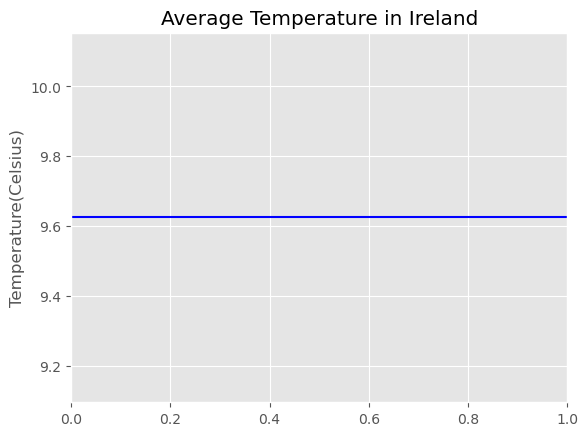

In [158]:
plt.axhline(y=9.62459703044022, color='b', linestyle='-')
plt.title('Average Temperature in Ireland')
plt.ylabel('Temperature(Celsius)')

Text(0, 0.5, 'Temperature(Celsius)')

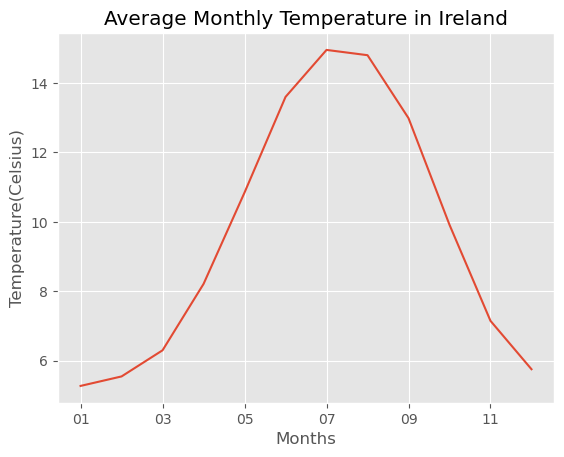

In [159]:
MTT.plot()
plt.title('Average Monthly Temperature in Ireland')
plt.xlabel('Months')
plt.ylabel('Temperature(Celsius)')

Text(0.5, 1.0, 'Temperature Anomaly in Ireland between 1831 and 1968')

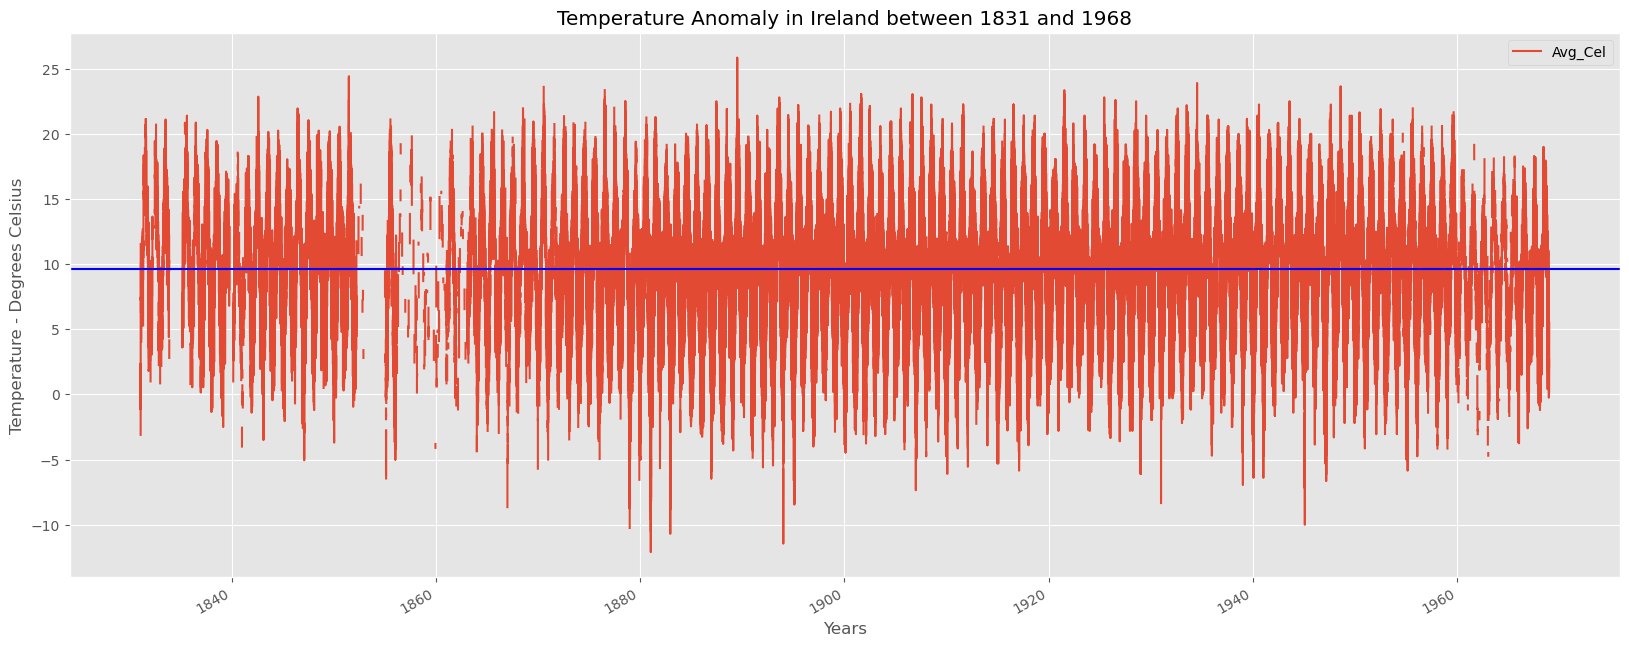

In [160]:
concat.plot(y="Avg_Cel", xlabel=('Years'), ylabel=('Temperature - Degrees Celsius'), figsize=(20,8))
plt.axhline(y=9.62459703044022, color='b', linestyle='-')
plt.title('Temperature Anomaly in Ireland between 1831 and 1968')

In [161]:
concat.corr()

Year     Month       Day    Max(F)    Min(F)    Max(C)  \
Year       1.000000 -0.004546 -0.000044  0.015029 -0.012695  0.013214   
Month     -0.004546  1.000000  0.010582  0.192879  0.217338  0.192476   
Day       -0.000044  0.010582  1.000000  0.002207  0.003161  0.002487   
Max(F)     0.015029  0.192879  0.002207  1.000000  0.785823  0.999982   
Min(F)    -0.012695  0.217338  0.003161  0.785823  1.000000  0.785834   
Max(C)     0.013214  0.192476  0.002487  0.999982  0.785834  1.000000   
Min(C)    -0.018677  0.216504  0.003552  0.785690  0.999981  0.785083   
Min (F)    0.136374  0.182247  0.025402  0.697189       NaN  0.697387   
Avg_Cel   -0.001296  0.216114  0.003375  0.947529  0.942223  0.947378   
Syn Temp   0.000868  0.000862  0.000008  0.000442  0.000804  0.000353   
year_avg        NaN       NaN       NaN       NaN       NaN       NaN   
temp_year       NaN       NaN       NaN       NaN       NaN       NaN   

             Min(C)   Min (F)   Avg_Cel  Syn Temp  year_avg  temp_year  
Year      -0.018677  0.136374 -0.001296  0.000868       NaN        NaN  
Month      0.216504  0.182247  0.216114  0.000862       NaN        NaN  
Day        0.003552  0.025402  0.003375  0.000008       NaN        NaN  
Max(F)     0.785690  0.697189  0.947529  0.000442       NaN        NaN  
Min(F)     0.999981       NaN  0.942223  0.000804       NaN        NaN  
Max(C)     0.785083  0.697387  0.947378  0.000353       NaN        NaN  
Min(C)     1.000000  0.999979  0.942048  0.000745       NaN        NaN  
Min (F)    0.999979  1.000000  0.929332  0.015707       NaN        NaN  
Avg_Cel    0.942048  0.929332  1.000000  0.000627       NaN        NaN  
Syn Temp   0.000745  0.015707  0.000627  1.000000       NaN        NaN  
year_avg        NaN       NaN       NaN       NaN       NaN        NaN  
temp_year       NaN       NaN       NaN       NaN       NaN        NaN

In [162]:
concat.dropna(subset=['Year',"Avg_Cel"])

Year  Month  Day  Max(F)  Min(F)  Max(C)  Min(C)   Station  \
date                                                                     
1872-05-01  1872      5    1    59.5    49.6    15.3     9.8      Birr   
1872-05-02  1872      5    2    56.8    47.6    13.8     8.7      Birr   
1872-05-03  1872      5    3    62.5    42.7    16.9     5.9      Birr   
1872-05-04  1872      5    4    59.2    42.1    15.1     5.6      Birr   
1872-05-05  1872      5    5    54.6    40.1    12.6     4.5      Birr   
...          ...    ...  ...     ...     ...     ...     ...       ...   
1909-09-26  1909      9   26    62.9    47.2    17.2     8.4  Valentia   
1909-09-27  1909      9   27    60.6    56.2    15.9    13.4  Valentia   
1909-09-28  1909      9   28    63.5    54.9    17.5    12.7  Valentia   
1909-09-29  1909      9   29    61.0    45.4    16.1     7.4  Valentia   
1909-09-30  1909      9   30    60.9    45.5    16.1     7.5  Valentia   

            Min (F)  Avg_Cel   Syn Temp  year_avg  temp_year  
date                                                          
1872-05-01      NaN    12.55   5.279960       NaN        NaN  
1872-05-02      NaN    11.25  16.801023       NaN        NaN  
1872-05-03      NaN    11.40  10.798115       NaN        NaN  
1872-05-04      NaN    10.35   5.321005       NaN        NaN  
1872-05-05      NaN     8.55   0.308598       NaN        NaN  
...             ...      ...        ...       ...        ...  
1909-09-26      NaN    12.80   7.873739       NaN        NaN  
1909-09-27      NaN    14.65  22.345154       NaN        NaN  
1909-09-28      NaN    15.10   9.817960       NaN        NaN  
1909-09-29      NaN    11.75   7.169592       NaN        NaN  
1909-09-30      NaN    11.80   8.272771       NaN        NaN  

[237611 rows x 13 columns]

In [163]:
import statsmodels.api as sm
model = sm.OLS(concat.Year, concat.Avg_Cel, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Year   R-squared (uncentered):                   0.823
Model:                            OLS   Adj. R-squared (uncentered):              0.823
Method:                 Least Squares   F-statistic:                          1.107e+06
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:46:01   Log-Likelihood:                     -1.9258e+06
No. Observations:              237611   AIC:                                  3.852e+06
Df Residuals:                  237610   BIC:                                  3.852e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Avg_Cel      163.0177      0.155   1052.296      0.000     162.714     163.321
==============================================================================
Omnibus:                     4140.874   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2586.256
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                       2.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
concat.Year.dtype

dtype('int64')

In [165]:
concat.Year = concat.Year.fillna('0.0')
arr_Year = np.array(concat.Year)

In [166]:
concat.Avg_Cel = concat.Avg_Cel.fillna('0.0')
arr_avg_cel = np.array(concat.Avg_Cel)

In [167]:
reshape_Year = arr_Year.reshape(-1,1)
reshape_avg_cel = arr_avg_cel.reshape(-1,1)

In [168]:
lr = LinearRegression()
lr.fit(reshape_Year,reshape_avg_cel)
#BELOW ARE MANY THINGS I TRIED THAT DIDN"T WORK
#mask = ~np.isnan(reshape_avg_cel) & ~np.isnan(reshape_Year)
#mask = mask.reshape(-1,1)
#reshape_Year = reshape_Year.reshape(-1,1)
#reshape_Year
#reshape_avg_cel
#lr.fit(reshape_Year,reshape_avg_cel)
#lr.fit(reshape_Year[mask],reshape_avg_cel[mask])
#my = ~(np.isnan(reshape_Year).any(axis=1))
#ma = ~(np.isnan(reshape_avg_cel).any(axis=1))
#m_y = reshape_Year[my]
#m_a = reshape_avg_cel[ma]
#regressor.fit(m_y[:, None], m_a)
#lr = LinearRegression().fit(m_y[:, None], m_a)

LinearRegression()

In [169]:
pred_avg_cel = lr.predict(reshape_Year)
pred_avg_cel

array([[6.61587939],
       [6.61587939],
       [6.61587939],
       ...,
       [8.06502473],
       [8.06502473],
       [8.06502473]])

In [170]:
lr.predict([[2030]])

array([[12.80412168]])

In [171]:
lr.predict([[2040]])

array([[13.19578258]])

In [172]:
lr.predict([[2050]])

array([[13.58744349]])

In [173]:
lr.predict([[2060]])

array([[13.97910439]])

In [174]:
pred_avg_cel.mean()

7.743575407171635

In [175]:
pred = lr.predict([[2070]])

In [176]:
for i in range(2024,2054):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature=%s" % ((i),*pred))

Year=2024, Predicted temperature=[12.56912513]
Year=2025, Predicted temperature=[12.60829123]
Year=2026, Predicted temperature=[12.64745732]
Year=2027, Predicted temperature=[12.68662341]
Year=2028, Predicted temperature=[12.7257895]
Year=2029, Predicted temperature=[12.76495559]
Year=2030, Predicted temperature=[12.80412168]
Year=2031, Predicted temperature=[12.84328777]
Year=2032, Predicted temperature=[12.88245386]
Year=2033, Predicted temperature=[12.92161995]
Year=2034, Predicted temperature=[12.96078604]
Year=2035, Predicted temperature=[12.99995213]
Year=2036, Predicted temperature=[13.03911822]
Year=2037, Predicted temperature=[13.07828431]
Year=2038, Predicted temperature=[13.1174504]
Year=2039, Predicted temperature=[13.15661649]
Year=2040, Predicted temperature=[13.19578258]
Year=2041, Predicted temperature=[13.23494867]
Year=2042, Predicted temperature=[13.27411476]
Year=2043, Predicted temperature=[13.31328085]
Year=2044, Predicted temperature=[13.35244694]
Year=2045, Pred

In [177]:
for i in range(2024,2124,10):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature=%s" % ((i),*pred))

Year=2024, Predicted temperature=[12.56912513]
Year=2034, Predicted temperature=[12.96078604]
Year=2044, Predicted temperature=[13.35244694]
Year=2054, Predicted temperature=[13.74410785]
Year=2064, Predicted temperature=[14.13576875]
Year=2074, Predicted temperature=[14.52742966]
Year=2084, Predicted temperature=[14.91909056]
Year=2094, Predicted temperature=[15.31075147]
Year=2104, Predicted temperature=[15.70241237]
Year=2114, Predicted temperature=[16.09407328]


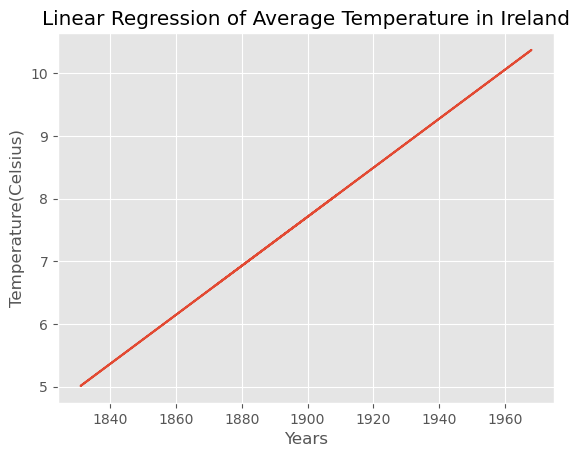

In [178]:
plt.plot(reshape_Year, pred_avg_cel)
plt.title('Linear Regression of Average Temperature in Ireland')
plt.xlabel('Years')
plt.ylabel('Temperature(Celsius)')
plt.show()

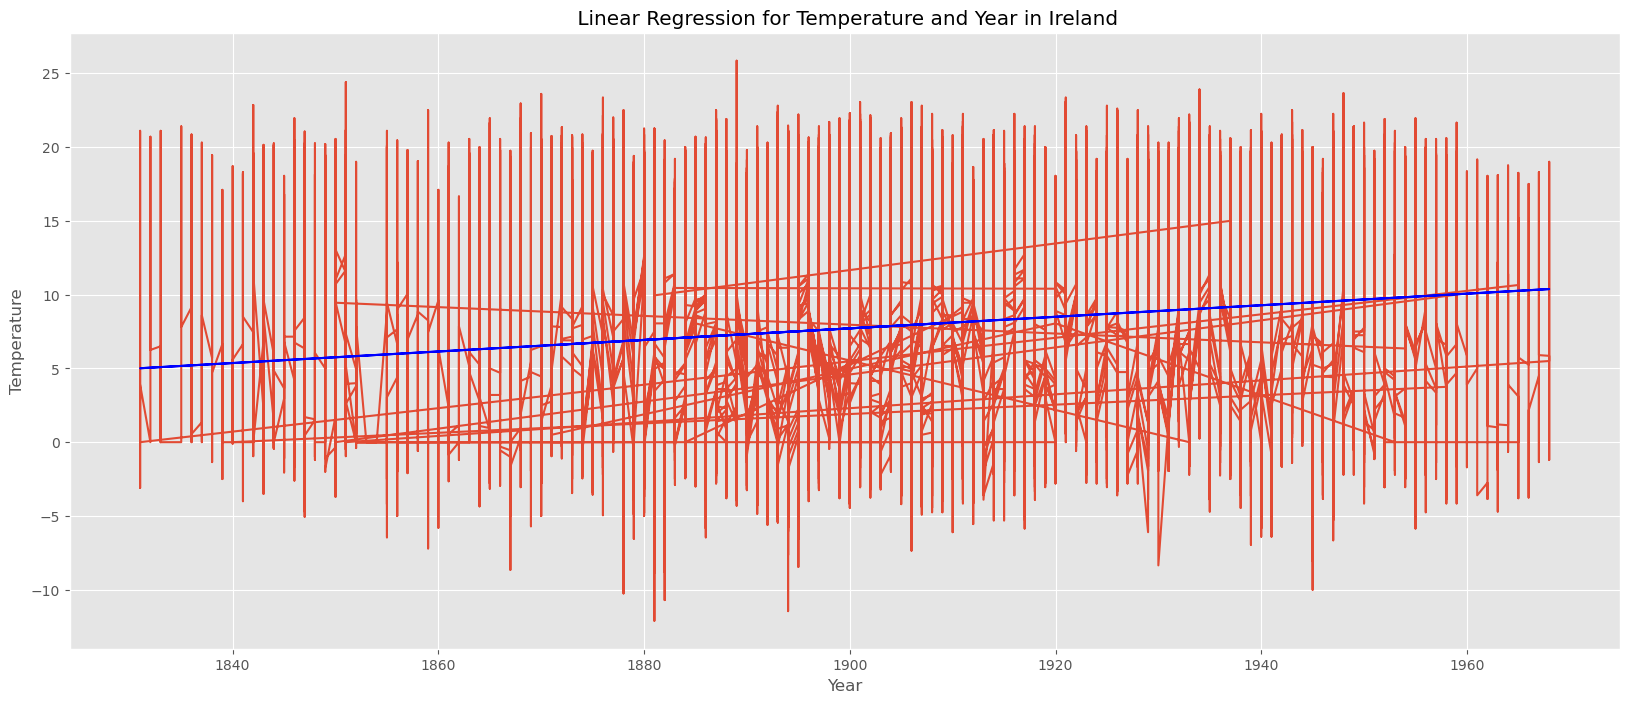

In [179]:
colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1, figsize=(20,8))
ax.plot(concat.Year,concat.Avg_Cel) 
ax.plot(concat.Year,pred_avg_cel,color="b")
#set(h(2),'linewidth',10)
  
# Set title 
ax.set_title(" Linear Regression for Temperature and Year in Ireland") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('Temperature')
plt.show()

In [180]:
knn = nei.KNeighborsClassifier(n_neighbors=1)

In [181]:
reshape_Year.dtype

dtype('int64')

In [182]:
reshape_avg_cel.dtype

dtype('O')

In [183]:
reshape_avg_cel

array([[12.55],
       [11.25],
       [11.399999999999999],
       ...,
       [15.1],
       [11.75],
       [11.8]], dtype=object)

In [184]:
pred_avg_cel.dtype

dtype('float64')

In [185]:
pred_avg_cel = pred_avg_cel.astype(int)
#pred_avg_cel = np.nan_to_num(pred_avg_cel, copy=True, nan=0.0, posinf=None, neginf=None)
#reshape_Year = np.nan_to_num(reshape_Year, copy=True, nan=0.0, posinf=None, neginf=None)

In [186]:
#warnings.filterwarnings("ignore", category=DataConversionWarning)
knn.fit(reshape_Year,pred_avg_cel)

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [187]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[2040]])

array([10])

In [188]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[2050]])

array([10])

In [189]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[2100]])

array([10])

In [190]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[2200]])

array([10])

## Examine one other (paleo/modern) feature(CH4)

In [191]:
#name = "https://www.epa.gov/system/files/other-files/2022-07/ghg-concentrations_fig-2.csv"
name = "./data/ghg-concentrations_fig-2.csv"
df_methane_historic = pd.read_csv(name, delimiter= ',', names =['year','level','level1','level2','level3','level4'], header=None)
df_methane_historic.tail()

year       level  level1  level2  level3  level4
2052 -164.9  594.286000     NaN     NaN     NaN     NaN
2053 -154.1  590.600000     NaN     NaN     NaN     NaN
2054  -94.8  603.700000     NaN     NaN     NaN     NaN
2055  -44.6  599.228075     NaN     NaN     NaN     NaN
2056   -1.3  605.400291     NaN     NaN     NaN     NaN

In [192]:
df_methane_historic['year'].dtype

dtype('float64')

In [193]:
df_methane_historic.sort_values(by=['year'], ignore_index=True)

year       level  level1  level2  level3  level4
0    -797446.1  399.300000     NaN     NaN     NaN     NaN
1    -796467.4  457.800000     NaN     NaN     NaN     NaN
2    -795327.0  396.100000     NaN     NaN     NaN     NaN
3    -794369.7  418.000000     NaN     NaN     NaN     NaN
4    -792988.0  428.300000     NaN     NaN     NaN     NaN
...        ...         ...     ...     ...     ...     ...
2052    -164.9  594.286000     NaN     NaN     NaN     NaN
2053    -154.1  590.600000     NaN     NaN     NaN     NaN
2054     -94.8  603.700000     NaN     NaN     NaN     NaN
2055     -44.6  599.228075     NaN     NaN     NaN     NaN
2056      -1.3  605.400291     NaN     NaN     NaN     NaN

[2057 rows x 6 columns]

In [194]:
df_methane_historic['year'] = df_methane_historic['year'].abs()

In [195]:
df_methane_historic.rename(columns={'level':'CH4'})

year         CH4  level1  level2  level3  level4
0     797446.1  399.300000     NaN     NaN     NaN     NaN
1     796467.4  457.800000     NaN     NaN     NaN     NaN
2     795327.0  396.100000     NaN     NaN     NaN     NaN
3     794369.7  418.000000     NaN     NaN     NaN     NaN
4     792988.0  428.300000     NaN     NaN     NaN     NaN
...        ...         ...     ...     ...     ...     ...
2052     164.9  594.286000     NaN     NaN     NaN     NaN
2053     154.1  590.600000     NaN     NaN     NaN     NaN
2054      94.8  603.700000     NaN     NaN     NaN     NaN
2055      44.6  599.228075     NaN     NaN     NaN     NaN
2056       1.3  605.400291     NaN     NaN     NaN     NaN

[2057 rows x 6 columns]

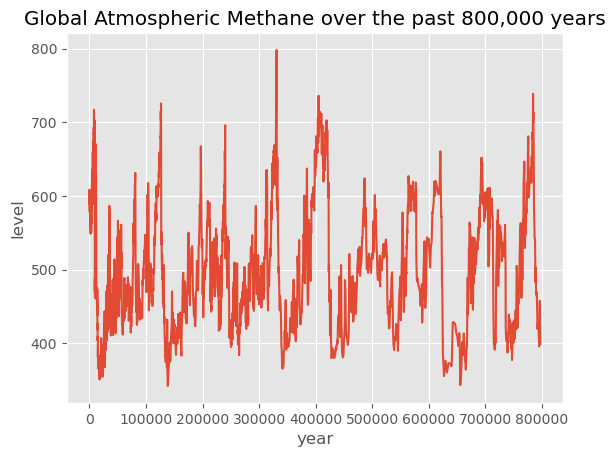

In [196]:
sns.lineplot(data=df_methane_historic, x="year", y="level").set(title='Global Atmospheric Methane over the past 800,000 years')
#methane.set(xlabel ="Years (Kyr)", ylabel = "Methane (CH4 ppb)")
plt.set_xlabel ="Years (Kyr)"

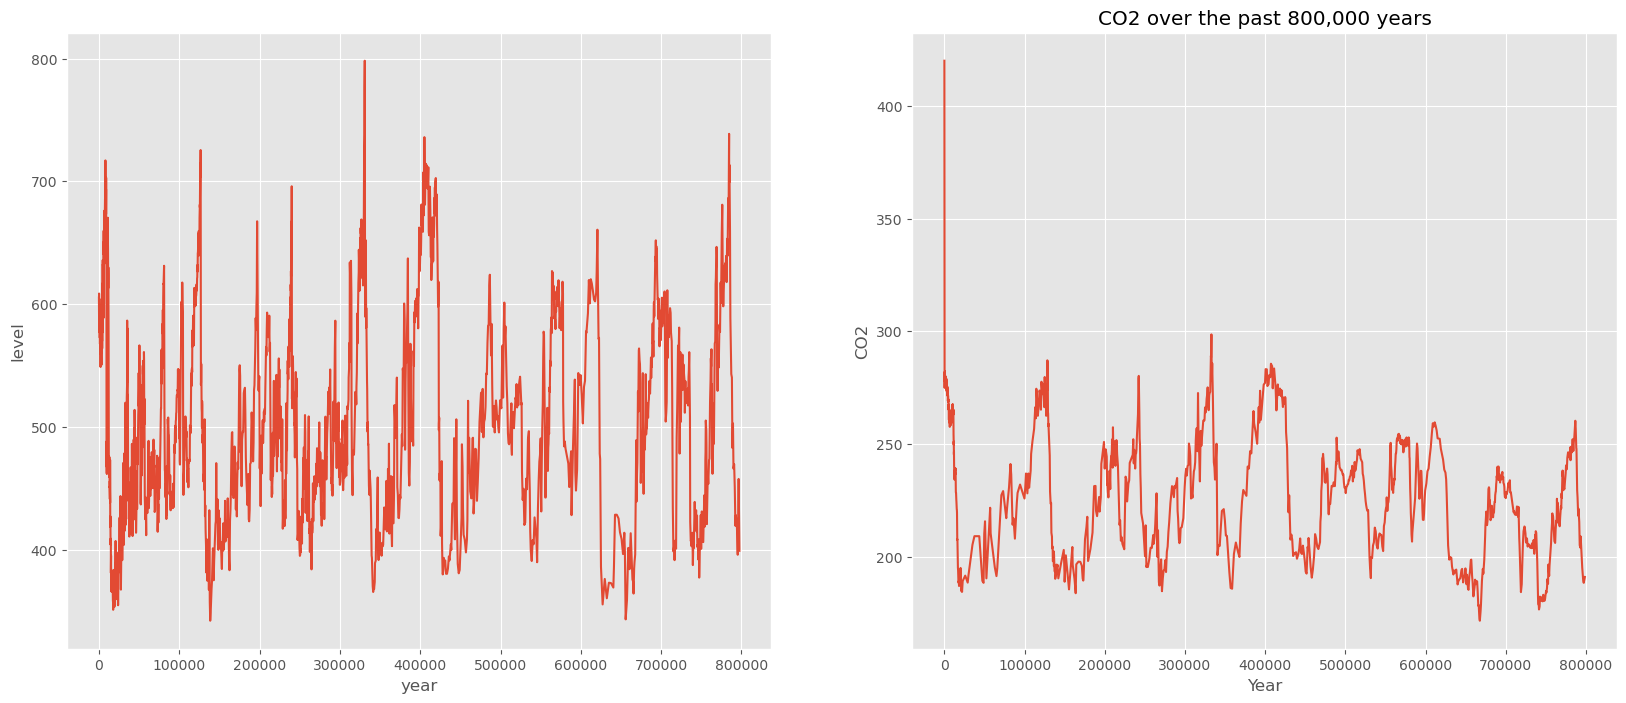

In [197]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.lineplot(data=df_methane_historic, x="year", y="level", ax=ax1)
plt.title('Methane over the past 800,000 years')
sns.lineplot(data=df_comp, x="Year", y="CO2",ax=ax2)
plt.title('CO2 over the past 800,000 years')
plt.show()

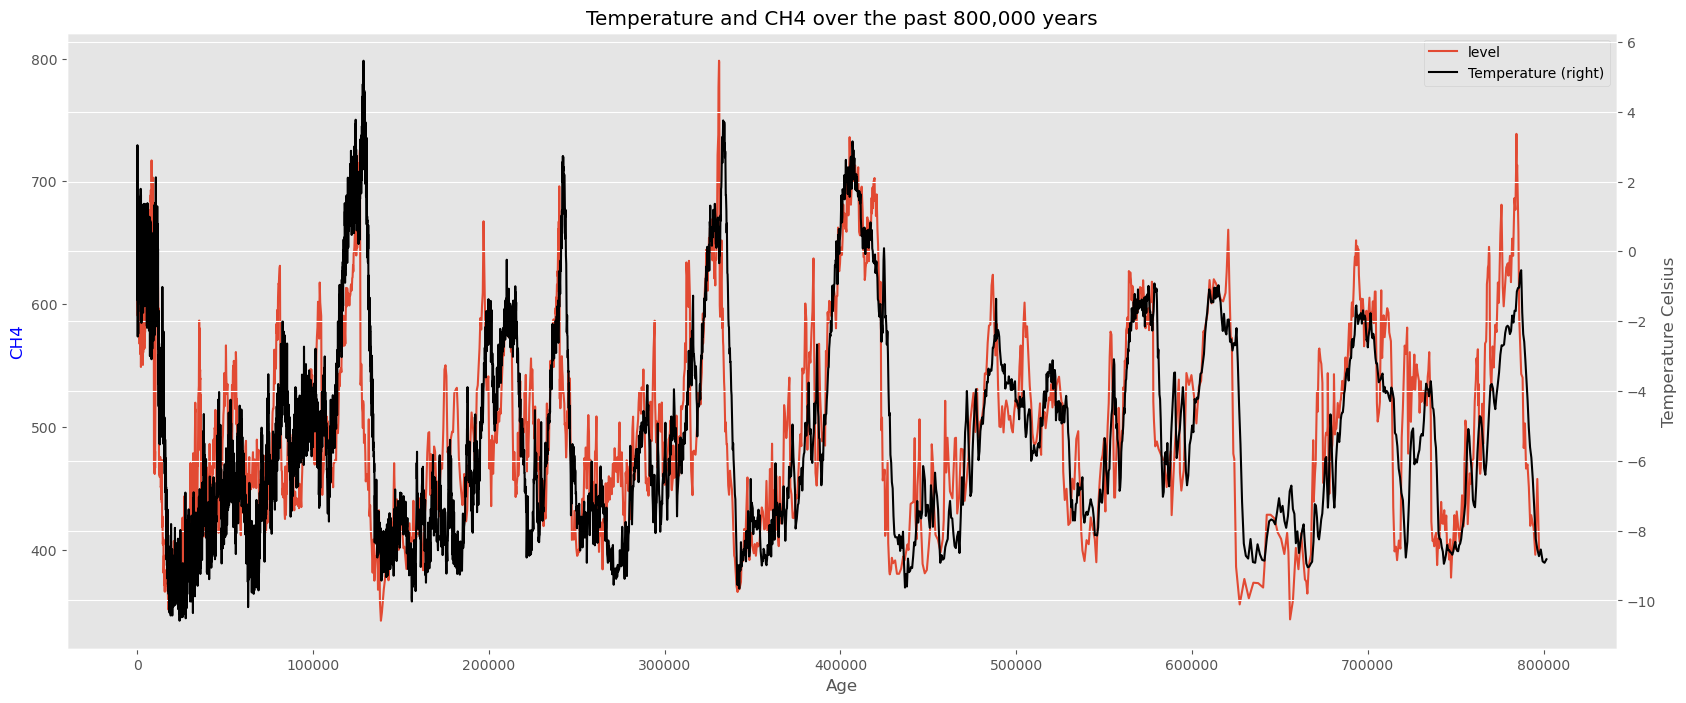

In [198]:
fig, ax = plt.subplots(figsize=(20,8))
df_methane_historic.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4', color='b')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.title('Temperature and CH4 over the past 800,000 years')
plt.show()

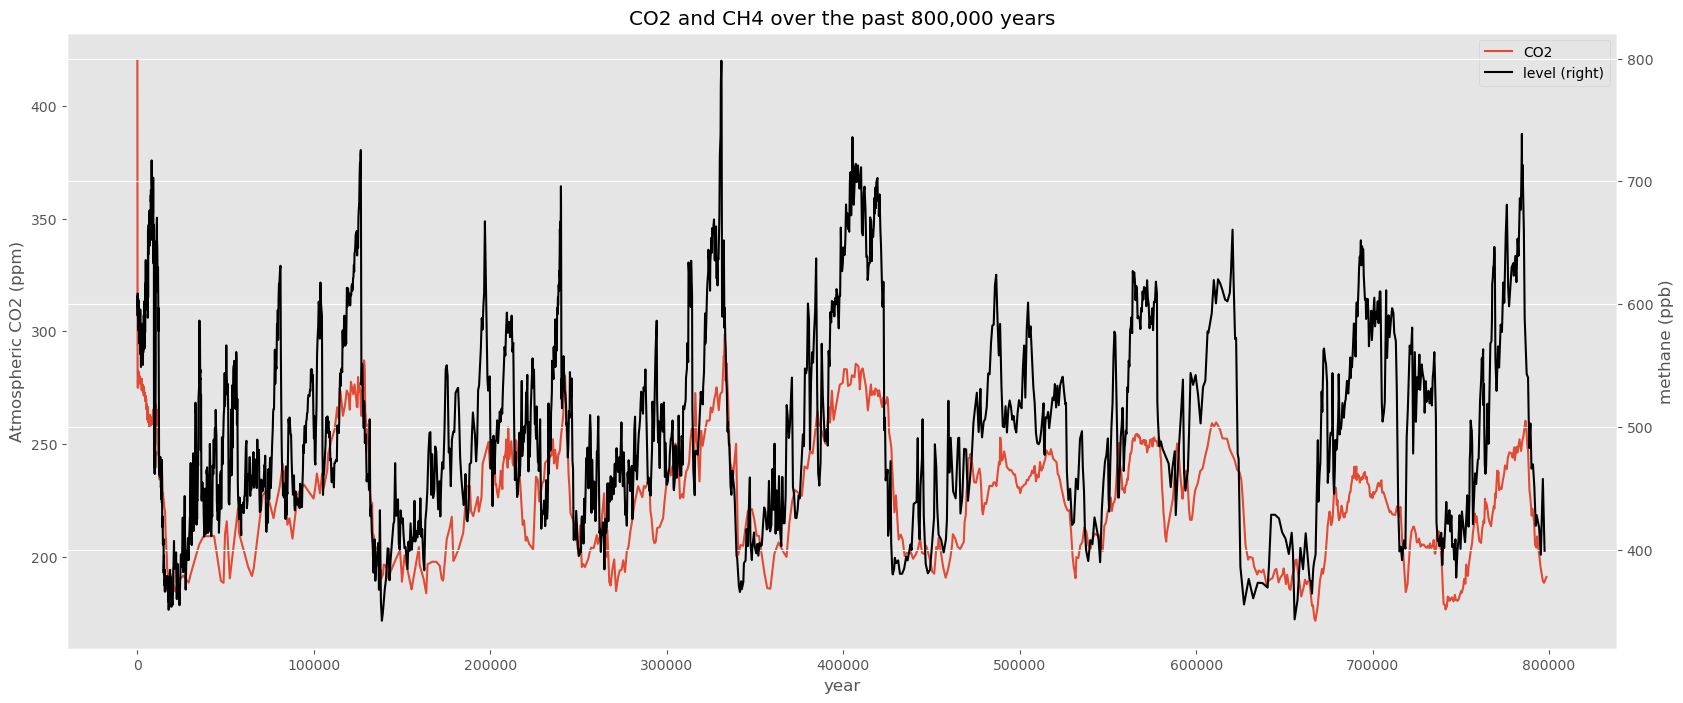

In [199]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2 (ppm)")
#ax.set_xlim(0, 800000)
df_methane_historic.plot(x="year", y="level",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('methane (ppb)')
#plt.gca().invert_xaxis()
plt.title('CO2 and CH4 over the past 800,000 years')
plt.show()

In [200]:
name = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
df_methane_global = pd.read_csv(name, skiprows=range(0,46), delimiter= '\s+', names =['year','mean','unc'], header=None)
df_methane_global.tail()

year     mean   unc
34  2018  1857.33  0.82
35  2019  1866.58  0.60
36  2020  1878.93  0.56
37  2021  1895.28  0.55
38  2022  1911.82  0.78

[Text(0.5, 1.0, 'Global Atmospheric Methane between 1984 and 2022')]

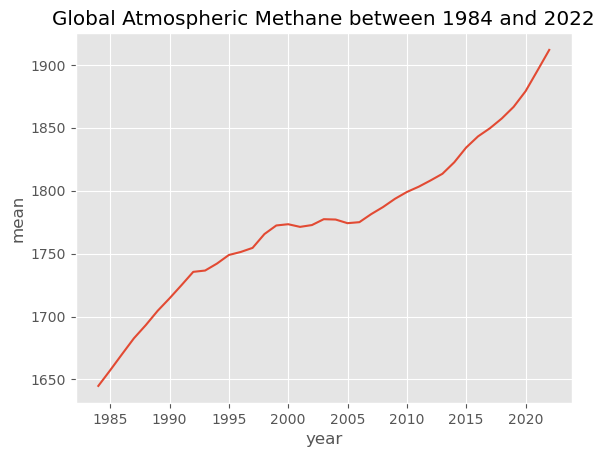

In [201]:
sns.lineplot(data=df_methane_global, x="year", y="mean").set(title='Global Atmospheric Methane between 1984 and 2022')

In [202]:
df = pd.DataFrame([[0,1911.83]],columns = ('year', 'level'))
df

year    level
0     0  1911.83

In [203]:
df_compo = pd.concat([df, df_methane_historic])
df_compo = df_compo.sort_values(['year']).reset_index(drop=True)
df_compo

year        level  level1  level2  level3  level4
0          0.0  1911.830000     NaN     NaN     NaN     NaN
1          1.3   605.400291     NaN     NaN     NaN     NaN
2         44.6   599.228075     NaN     NaN     NaN     NaN
3         94.8   603.700000     NaN     NaN     NaN     NaN
4        154.1   590.600000     NaN     NaN     NaN     NaN
...        ...          ...     ...     ...     ...     ...
2053  792988.0   428.300000     NaN     NaN     NaN     NaN
2054  794369.7   418.000000     NaN     NaN     NaN     NaN
2055  795327.0   396.100000     NaN     NaN     NaN     NaN
2056  796467.4   457.800000     NaN     NaN     NaN     NaN
2057  797446.1   399.300000     NaN     NaN     NaN     NaN

[2058 rows x 6 columns]

Text(0, 0.5, 'Methane (ppb)')

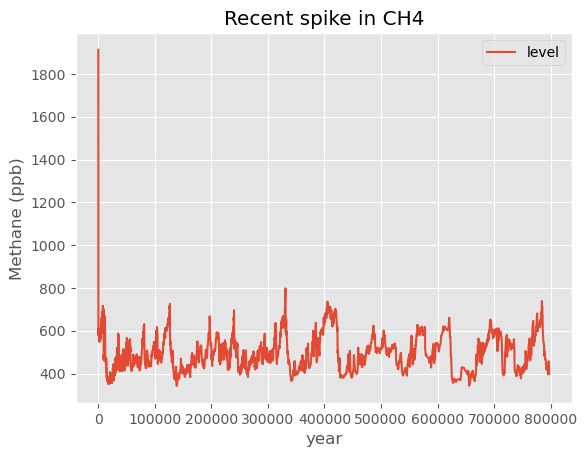

In [204]:
df_compo.plot(x='year', y='level',title="Recent spike in CH4")
plt.ylabel('Methane (ppb)')

Text(0.5, 1.0, 'Recent spike in CH4')

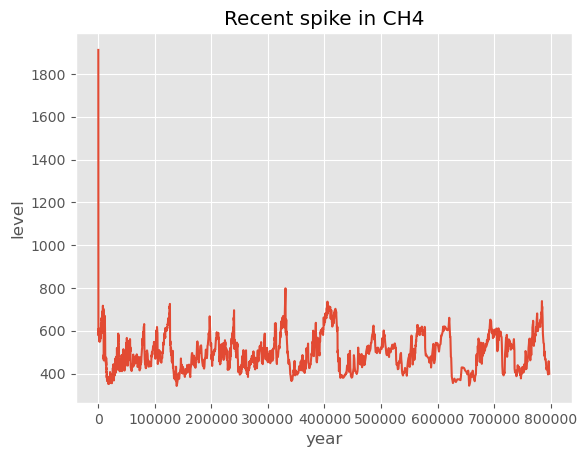

In [205]:
sns.lineplot(data=df_compo, x="year", y="level").set_title("Recent spike in CH4")

In [206]:
df_methane_global.rename(columns={'mean':'level'}).head()

year    level   unc
0  1984  1644.85  0.67
1  1985  1657.29  0.59
2  1986  1670.09  0.74
3  1987  1682.70  0.49
4  1988  1693.16  0.67

In [207]:
df_co4_comp = pd.concat([df_methane_global, df_methane_historic])
df_co4_comp

year     mean   unc       level  level1  level2  level3  level4
0     1984.0  1644.85  0.67         NaN     NaN     NaN     NaN     NaN
1     1985.0  1657.29  0.59         NaN     NaN     NaN     NaN     NaN
2     1986.0  1670.09  0.74         NaN     NaN     NaN     NaN     NaN
3     1987.0  1682.70  0.49         NaN     NaN     NaN     NaN     NaN
4     1988.0  1693.16  0.67         NaN     NaN     NaN     NaN     NaN
...      ...      ...   ...         ...     ...     ...     ...     ...
2052   164.9      NaN   NaN  594.286000     NaN     NaN     NaN     NaN
2053   154.1      NaN   NaN  590.600000     NaN     NaN     NaN     NaN
2054    94.8      NaN   NaN  603.700000     NaN     NaN     NaN     NaN
2055    44.6      NaN   NaN  599.228075     NaN     NaN     NaN     NaN
2056     1.3      NaN   NaN  605.400291     NaN     NaN     NaN     NaN

[2096 rows x 8 columns]

In [208]:
df_co4_comp['year'] -= 2022
df_co4_comp

year     mean   unc       level  level1  level2  level3  level4
0      -38.0  1644.85  0.67         NaN     NaN     NaN     NaN     NaN
1      -37.0  1657.29  0.59         NaN     NaN     NaN     NaN     NaN
2      -36.0  1670.09  0.74         NaN     NaN     NaN     NaN     NaN
3      -35.0  1682.70  0.49         NaN     NaN     NaN     NaN     NaN
4      -34.0  1693.16  0.67         NaN     NaN     NaN     NaN     NaN
...      ...      ...   ...         ...     ...     ...     ...     ...
2052 -1857.1      NaN   NaN  594.286000     NaN     NaN     NaN     NaN
2053 -1867.9      NaN   NaN  590.600000     NaN     NaN     NaN     NaN
2054 -1927.2      NaN   NaN  603.700000     NaN     NaN     NaN     NaN
2055 -1977.4      NaN   NaN  599.228075     NaN     NaN     NaN     NaN
2056 -2020.7      NaN   NaN  605.400291     NaN     NaN     NaN     NaN

[2096 rows x 8 columns]

Text(0, 0.5, 'Methane (ppb)')

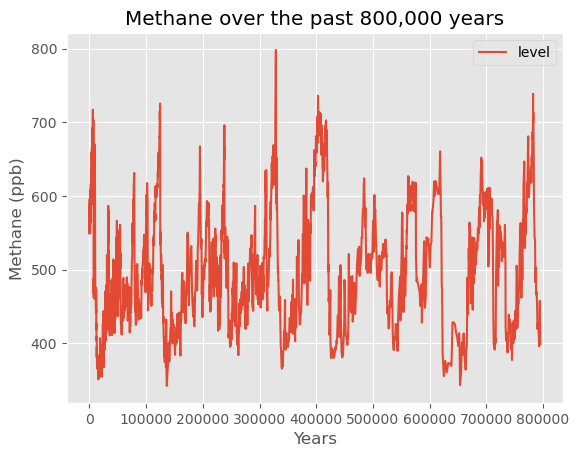

In [209]:
df_co4_comp['year'] = df_co4_comp['year'].abs()
#df_co4_comp['sum'] = df_co4_comp.mean + df_co4_comp.level
df_co4_comp.plot(x='year', y='level')
plt.title('Methane over the past 800,000 years')
plt.xlabel('Years')
plt.ylabel('Methane (ppb)')

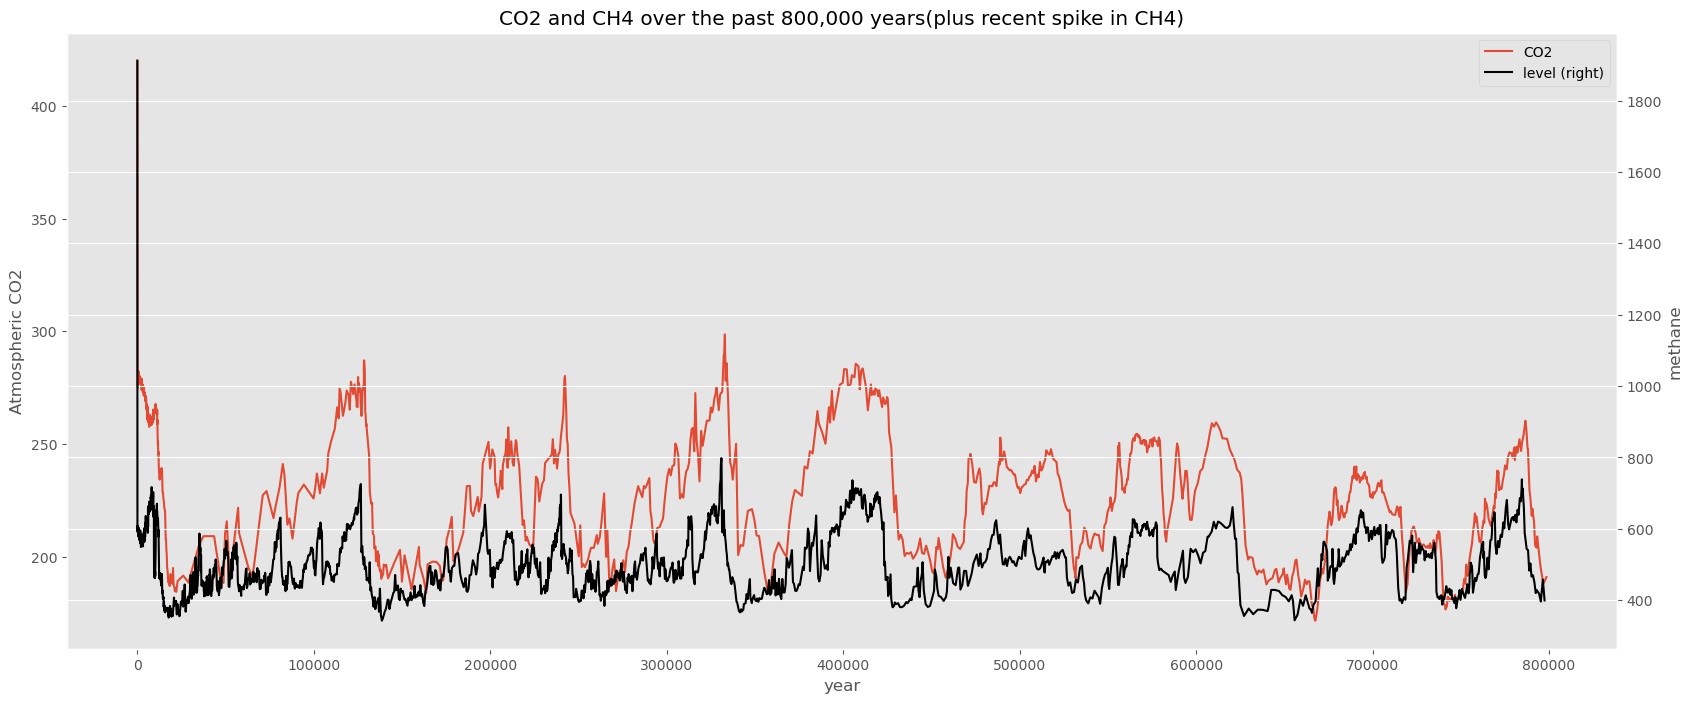

In [210]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df_compo.plot(x="year", y="level",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('methane')
#plt.gca().invert_xaxis()
plt.title('CO2 and CH4 over the past 800,000 years(plus recent spike in CH4)')
plt.show()

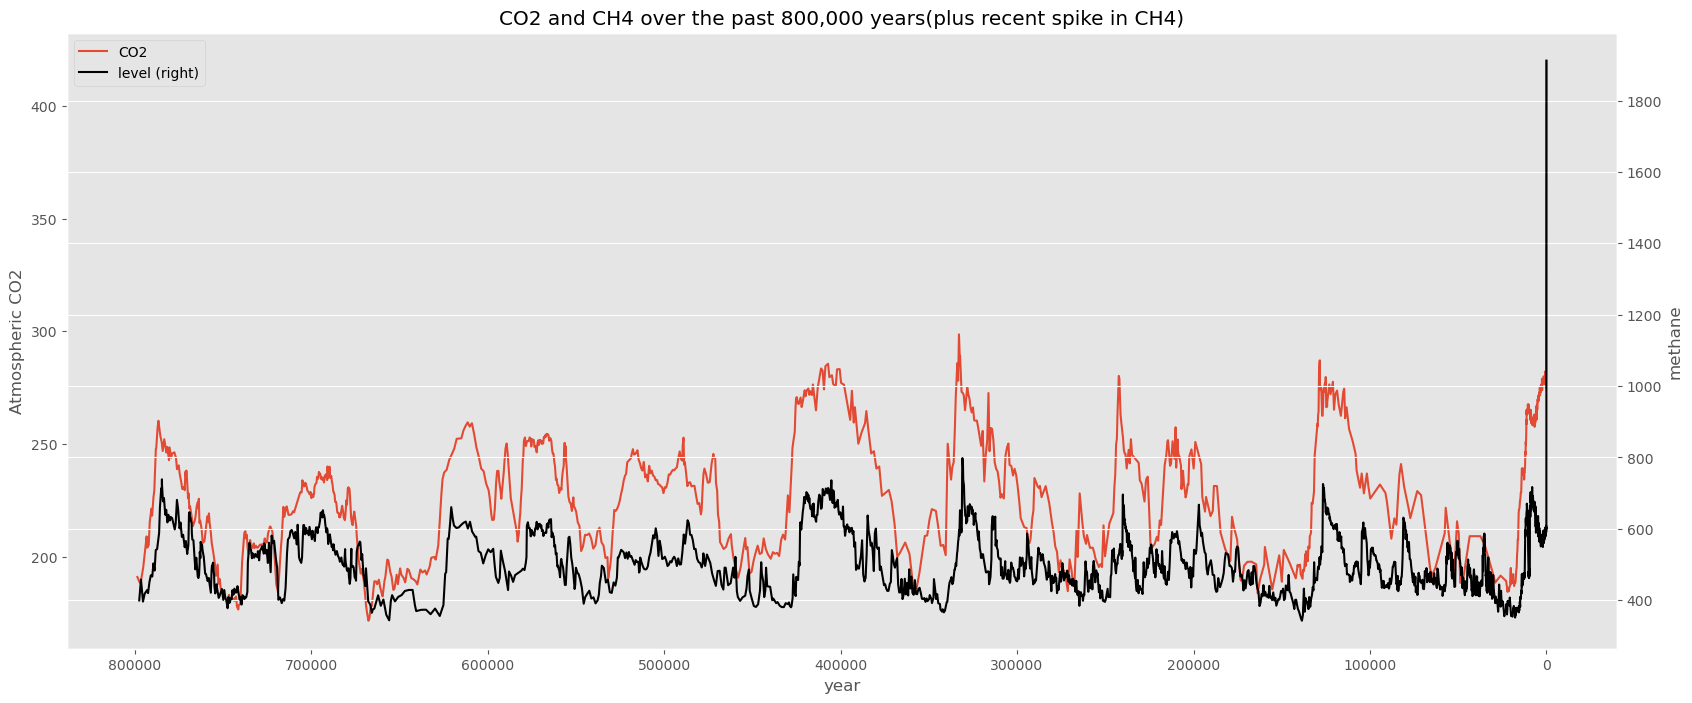

In [211]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
#ax.set_xlim(0, 800000)
df_compo.plot(x="year", y="level",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('methane')
plt.gca().invert_xaxis()
plt.title('CO2 and CH4 over the past 800,000 years(plus recent spike in CH4)')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_compo.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4', color='b')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.title('Temperature and CH4 over the past 800,000 years (plus recent spike in CH4)')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_compo.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4', color='b')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.gca().invert_xaxis()
plt.title('Temperature and CH4 over the past 800,000 years (plus recent spike in CH4)')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
df_compo.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4(ppb) and CO2(ppm)', color='b')
ax.set_xlabel('Years')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.title('Temperature, CO2 and CH4 over the past 800,000 years')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
df_compo.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4(ppb) and CO2(ppm)', color='b')
ax.set_xlabel('Years')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.gca().invert_xaxis()
plt.title('Temperature, CO2 and CH4 over the past 800,000 years')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2")
df_compo.plot(x="year", y="level",ax=ax)
ax.set_ylabel('CH4(ppb) and CO2(ppm)', color='b')
ax.set_xlabel('Years')
#ax.set_xlim(0, 800000)
#epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
df1.plot(x="AICC2012", y="temp", secondary_y=True, color='g',ax=ax )
ax.right_ax.set_ylabel('Temperature (Kelvin)')
plt.gca().invert_xaxis()
plt.title('Temperature(Kelvin), CO2 and CH4 over the past 800,000 years')
plt.show()

In [ ]:
df_co2_mm_mlo = pd.read_csv("https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv")
df_co2_mm_mlo

In [ ]:
df_co2_mm_mlo.Date.dtype

In [ ]:
pd.to_datetime(df_co2_mm_mlo['Date'])

In [ ]:
df_co2_mm_mlo['datetime'] = pd.to_datetime(df_co2_mm_mlo['Date'])

In [ ]:
df_co2_mm_mlo

In [ ]:
sns.lineplot(data=df_co2_mm_mlo, x="datetime", y="Interpolated").set(title='Global Atmospheric CO2 between 1958 and 2018')
sns.lineplot(data=df_co2_mm_mlo, x="datetime", y="Trend")

In [ ]:
df_co2_mm_mlo = df_co2_mm_mlo.set_index("datetime")

In [ ]:
df_co2_mm_mlo.index
#df_co2_mm_mlo.set_index('T', inplace=True
weekly_summary = df_co2_mm_mlo.resample('W')
interpolated = weekly_summary.interpolate(method='linear')
#df_co2_mm_mlo
weekly_summary
interpolated

***
## Fuse and analyse data
***

#### Concatenate 7 dataframes

In [ ]:
composite_df = pd.concat([df_domec,df_vostok,df_taylor,df_domec_1,df_domec_2,df_domec_bern,df_domec_gren]).reset_index(drop=True)
composite_df.dropna()

### PLOT Concatenated data for CO2 0 - 800 kyr BP (Dome C)(LDGE Grenoble)

In [ ]:
#composite_df.set_index("First Name", inplace = True)
sns.lineplot(data=composite_df, x="Year", y="CO2", hue='Place')
plt.title('Concatenated Dataframe : CO2 between 0 - 800 kyr BP')

In [ ]:
composite_df.CO2.dtype

In [ ]:
composite_df.CO2.dropna()

In [ ]:
CO2 = np.nan_to_num(composite_df['CO2'])

In [ ]:
CO2[:] = np.nan_to_num(CO2)

In [ ]:
composite_df = np.nan_to_num(composite_df)

In [ ]:
epica_df1.Temperature.mean()

In [ ]:
#epica_df2 = pd.read_excel("Book1.xlsx")
#epica_df2
df_comp

In [ ]:
df_comp.plot(x="Year", y="CO2", ylabel=('CO2'))
#ax.set_xlim(0, 800000)
ax = df_comp.plot(x="Year", y="temp",secondary_y=True, color='k')
ax.set_ylabel('temp', color='b')
#ax2.set_ylim(200, 230)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax)
ax.set_ylabel('CO2', color='b')
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
ax.right_ax.set_ylabel('Temperature Celsius')
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [ ]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="Year", y="CO2",ax=ax, ylabel="Atmospheric CO2(ppm)")
#ax.set_xlim(0, 800000)
epica_df1.plot(x="Age", y="Temperature",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature (Celsius)')
plt.gca().invert_xaxis()
plt.title('Temperature and CO2 over the past 800,000 years')
plt.show()

In [ ]:
df_comp.rename(columns={'Year':'year'},inplace=True)
epica_df1.rename(columns={'Age':'year'},inplace=True)
#df1.rename(columns={'AICC2012':'year'},inplace=True)
df_co4_co2_temp = pd.concat([df_compo, epica_df1, df_comp],ignore_index=True)
df_co4_co2_temp

In [ ]:
df_co4_co2_temp.rename(columns={'year':'Years(kyr)','level':'CH4(ppb)', 'Temperature':'Temp(Celsius)','temp':'Temp(Kelvin)', 'CO2':'CO2(ppm)'},inplace=True)
df_co4_co2_temp = df_co4_co2_temp[['Years(kyr)', 'CH4(ppb)', 'Temp(Celsius)','Temp(Kelvin)','CO2(ppm)']]
#df_co4_co2_temp
df_co4_co2_temp.to_csv('./data/output/concat_unsorted.csv')

In [ ]:
#df_co4_co2_temp.set_index("year",inplace = True)
df_co4_co2_temp

In [ ]:
df_co4_co2_temp.rename(columns={'Years(kyr)':'Years'},inplace=True)
df_co4_co2_temp['years_workaround'] = df_co4_co2_temp['Years']/100
df_co4_co2_temp

In [ ]:
df_co4_co2_temp.years_workaround = df_co4_co2_temp.years_workaround.astype(float)
df_co4_co2_temp

In [ ]:
span = pd.period_range("0001-01-01", "8943-01-01", freq="Y")
span

In [ ]:
df_co4_co2_temp.set_index(span)

In [ ]:
#df_co4_co2_temp.drop(columns=['years_workaround'], axis=1, inplace=True)
df_co4_co2_temp
#df_co4_co2_temp.drop('years_workaround', axis=1, inplace=True)

In [ ]:
df_co4_co2_temp.index
#df_co4_co2_temp.resample('M')

In [ ]:
df_ffill_bfill = df_co4_co2_temp.ffill().bfill()

In [ ]:
df_ffill_bfill.to_csv('./data/output/concat_ffill_bfill.csv')

In [ ]:
df_co4_co2_temp.dtypes
#df_co4_co2_temp.plot()

In [ ]:
#df_co4_co2_temp1 = df_co4_co2_temp[['year','level','TempCelsius','CO2']]
#df_co4_co2_temp1.rename(columns={'level':'CH4(ppb)', 'TempCelsius':'Temp(Celsius)', 'CO2':'CO2(ppm)'},inplace=True)
df_co4_co2_temp.sort_values(by=['Years'],inplace=True,ignore_index=True)
#df_co4_co2_temp.reset_index(drop=True)
#df_co4_co2_temp.set_index(drop=True)
df_co4_co2_temp.to_csv('./data/output/concat_sorted.csv')
df_co4_co2_temp

In [ ]:
#df_co4_co2_temp.set_index("Years(kyr)", inplace = True)
df_co4_co2_temp
df_co4_co2_temp.corr()

In [ ]:
temp_mean = df_co4_co2_temp['Temp(Celsius)'].mean()
temp_mean

In [ ]:
df_co4_co2_temp.rename(columns={'Years(kyr)':'Years','CH4(ppb)':'CH4','Temp(Celsius)':'Temp_Cel','Temp(Kelvin)':'Temp_Kel','CO2(ppm)':'CO2'},inplace=True)

In [ ]:
# Split data in training (not NaN values) and missing (NaN values)
missing = df_co4_co2_temp.isna().any(axis=1)
df_training = df_co4_co2_temp[~missing]
df_missing = df_co4_co2_temp[missing].reset_index(drop=True)

In [ ]:
df_training

In [ ]:
# Create function that interpolate missing value (from our training values)
#f = interp1d(df_training.Years,df_training.CH4)

***
## Analyse the data, the trends and the relationships between variables
***

### Examine Temperature Lag

In [ ]:
df_comp

In [ ]:
df_comp['lag_temp'] = df_comp['temp'].shift(-1)
#df_comp['lag_TempCelsius'] = df_comp['TempCelsius'].shift(-1)
df_comp

In [ ]:
temp_celsius = epica_df1.Temperature
df_comp["TempCelsius"] = temp_celsius
df_comp

In [ ]:
df_comp['lag_TempCelsius'] = df_comp['TempCelsius'].shift(-1)

In [ ]:
epica_df1['lagTemperature'] = epica_df1['Temperature'].shift(1)
epica_df1

In [ ]:
df_co4_co2_temp.corr()

In [ ]:
df_co4_co2_temp.dropna()

In [ ]:
df_co4_co2_temp.corr()

#### Correlation between CO2 and CH4

In [ ]:
sample_CO2 = df_comp.sample(n = 1097)
sample_CH4 = df_compo.sample(n = 1097)
correlation = np.corrcoef(sample_CO2.CO2, sample_CH4.level)
correlation

#### Correlation between CO2 and Temperature

In [ ]:
sample_CO2 = df_comp.sample(n = 1097)
sample_temp = epica_df1.sample(n = 1097)
correlation = np.corrcoef(sample_CO2.CO2, sample_temp.year)
correlation

#### Correlation between Temperature and CH4

In [ ]:
sample_CH4 = df_compo.sample(n = 1097)
sample_temp = epica_df1.sample(n = 1097)
correlation = np.corrcoef(sample_CH4.level, sample_temp.year)
correlation

### LAG ANALYSIS OF LUTHI DATASET
I shift the CO2 column forward one place in the dataframe. 

In [ ]:
df_comp

In [ ]:
df_comp['lag_CO2'] = df_comp['CO2'].shift(1)
df_comp

In [ ]:
df1

In [ ]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="year", y="lag_CO2",ax=ax, ylabel="Atmospheric CO2(ppm)")
#ax.set_xlim(0, 800000)
df_comp.plot(x="year", y="lag_temp",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature(Kelvin)')
plt.gca().invert_xaxis()
plt.title('Lag Analysis of Temperature and CO2 over the past 800,000 years')
plt.show()

In [ ]:
df1['lag_temp'] = df1['temp'].shift(-1)
df1

In [ ]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="year", y="lag_CO2",ax=ax, ylabel="Atmospheric CO2(ppm)")
#ax.set_xlim(0, 800000)
df1.plot(x="AICC2012", y="lag_temp",secondary_y=True, color='k',ax=ax )
#ax2.set_ylim(200, 230)
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature(Kelvin)')
plt.gca().invert_xaxis()
plt.title('Lag Analysis of Temperature and CO2 over the past 800,000 years')
plt.show()

### K NEAREST NEIGNBOUR OF CO2 DATA (DOME C)

In [ ]:
df_domec.isnull().values.any()

In [ ]:
inputs = df_domec['Year']
inputs.dropna()
outputs = df_domec['CO2']
outputs.dropna()

In [ ]:
inputs.isnull().values.any()

In [ ]:
outputs = np.array(outputs)
outputs = outputs.reshape(-1,1)

In [ ]:
outputs = outputs.astype(int)

In [ ]:
inputs = np.array(inputs)
inputs = inputs.reshape(-1,1)

In [ ]:
inputs = inputs.astype(int)

In [ ]:
outputs = np.array(outputs)
outputs = outputs.reshape(-1,1)

#### K Neighbors Classifier

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=1)

#### KNN FIT

In [ ]:
knn.fit(inputs,outputs)

#### KNN PREDICT

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[137]])

In [ ]:
df_comp['lag_CO2'] = df_comp['CO2'].shift(1)
df_comp

In [ ]:
df_comp.corrwith(df1_sample.temp)

In [ ]:
df1['lag_temp'] = df1['temp'].shift(-1)
df1

In [ ]:
df_comp.dropna()

In [ ]:
df1.dropna()

In [ ]:
df_comp.corrwith(df1)

In [ ]:
epica_df1

In [ ]:
fig, ax= plt.subplots(figsize=(20,8))
df_comp.plot(x="year", y="lag_CO2",ax=ax, ylabel="Atmospheric CO2(ppm)")
#ax.set_xlim(0, 800000)
epica_df1.plot(x="year", y="lagTemperature",secondary_y=True, color='k',ax=ax )
#ax.set_ylabel('Temperature', color='b')
ax.right_ax.set_ylabel('Temperature (Celsius)')
plt.gca().invert_xaxis()
plt.title('Lag Analysis of Temperature and CO2 over the past 800,000 years')
plt.show()

In [ ]:
Year = df_comp.year 
CO2 = df_comp.CO2
Temp = df_comp.temp
Temp1 = df1.temp
#Temp2 = epica_df1.temp
lag_temp = df_comp.lag_temp
lag_CO2 = df_comp.lag_CO2

In [ ]:
correlation = np.corrcoef(CO2, Temp)
correlation

In [ ]:
correlation = np.corrcoef(CO2, lag_temp)
correlation

In [ ]:
correlation = np.corrcoef(CO2, lag_temp)
correlation

In [ ]:
df_comp[['CO2', 'lag_temp']].dropna().corr()

In [ ]:
correlation = np.corrcoef(lag_CO2, lag_temp)
correlation

In [ ]:
df_comp[['lag_CO2', 'lag_temp']].dropna().corr()

In [ ]:
df_comp["lag_temp"] = pd.to_numeric(df_comp["lag_temp"])
df_comp["lag_temp"] = df_comp["lag_temp"].fillna("0").astype(int)

In [ ]:
correlation = np.corrcoef(CO2, Year)
correlation

In [ ]:
arr_year = np.array(Year)
arr_year

In [ ]:
arr_CO2 = np.array(CO2)
arr_CO2

In [ ]:
reshape_year = arr_year.reshape(-1,1)
reshape_CO2 = arr_CO2.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(reshape_year,reshape_CO2)

***
## Predict global temperature anomaly over next few decades
***

In [ ]:
epica_df1

In [ ]:
epica_df1.year = epica_df1.year.astype(int)

In [ ]:
Age = epica_df1.year
temp_celsius.mean()

In [ ]:
arr_temp_celsius = np.array(temp_celsius)
arr_temp_celsius

In [ ]:
arr_Age = np.array(Age)
arr_Age

In [ ]:
reshape_temp_celsius = arr_temp_celsius.reshape(-1,1)

In [ ]:
reshape_Age = arr_Age.reshape(-1,1)

In [ ]:
np.any(np.isnan(epica_df1))

In [ ]:
np.all(np.isfinite(epica_df1))

In [ ]:
np.any(np.isfinite(epica_df1))

In [ ]:
epica_df1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
epica_df1.dropna()

In [ ]:
print(reshape_Age[:,0].shape)
index = 0
for i in reshape_Age[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

In [ ]:
print(reshape_temp_celsius[:,0].shape)
index = 0
for i in reshape_temp_celsius[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

In [ ]:
temp_celsius.mean()

In [ ]:
#reshape_temp_celsius.replace((np.inf, -np.inf, np.nan), -4.58)
#reshape_temp_celsius.fillna(-4.58)
reshape_temp_celsius = np.nan_to_num(reshape_temp_celsius, copy=True, nan=0.0, posinf=None, neginf=None)

In [ ]:
print(reshape_temp_celsius[:,0].shape)
index = 0
for i in reshape_temp_celsius[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

In [ ]:
lr = LinearRegression()
lr.fit(reshape_Age,reshape_temp_celsius)

In [ ]:
lr.predict([[-2024]])

### Predict yearly temperature over next few decades

In [ ]:
for i in range(0,-30,-1):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature=%s" % ((i),*pred))

### Predict temperature anomaly every decade over next 9 decades

In [ ]:
for i in range(0,-100,-10):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature=%s" % ((i),*pred))

In [ ]:
lr.predict([[-10]])

In [ ]:
pred_temp = lr.predict(reshape_year)
pred_temp

In [ ]:
lr.predict([[-10]])

In [ ]:
lr.predict([[-20]])

In [ ]:
lr.predict([[-30]])

In [ ]:
lr.predict([[-40]])

In [ ]:
lr.predict([[-50]])

In [ ]:
lr.predict([[-500]])

In [ ]:
lr.predict([[-5000]])

In [ ]:
lr.predict([[-50000]])

In [ ]:
lr.predict([[-500000]])

In [ ]:
plt.plot(Year, pred_temp)
plt.title('Linear Regression of Temperature over 800,000 years')
plt.xlabel('Years')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [ ]:
#colour="blue"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1)
ax.plot(epica_df1.year,temp_celsius) 
ax.plot(Year,pred_temp,color="b") 
  
# Set title 
ax.set_title("Linear Regression for Temperature versus Actual Temperature data") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('Temperature(Celsius)')
plt.show()

In [ ]:
temp = df_comp.temp
arr_temp = np.array(temp)
arr_temp

In [ ]:
correlation = np.corrcoef(temp, Year)
correlation

In [ ]:
reshape_temp = arr_temp.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(reshape_year,reshape_temp)

In [ ]:
pred_temp = lr.predict(reshape_year)
pred_temp

In [ ]:
lr.predict([[-10]])

In [ ]:
lr.predict([[-20]])

In [ ]:
lr.predict([[-30]])

In [ ]:
lr.predict([[-40]])

In [ ]:
lr.predict([[-50]])

In [ ]:
lr.predict([[-500]])

In [ ]:
lr.predict([[-5000]])

In [ ]:
lr.predict([[-50000]])

In [ ]:
lr.predict([[-500000]])

### Predict yearly temperature in Kelvin over next 3 decades

In [ ]:
for i in range(-1,-30, -1):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature(Kelvin)=%s" % ((i),*pred))

### Predict temperature evey decade over next 9 decades

In [ ]:
for i in range(-1,-101, -10):
    pred = lr.predict([[i]])
    print("Year=%s, Predicted temperature(Kelvin)=%s" % ((i),*pred))

In [ ]:
plt.plot(reshape_year, pred_temp)
plt.title('Linear Regression of Temperature over 800,000 years')
plt.xlabel('Years')
plt.ylabel('Temperature (Kelvin)')
plt.show()

In [ ]:
#colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
fig, ax = plt.subplots(1, 1)
ax.plot(Year,temp) 
ax.plot(Year,pred_temp,color="b") 
  
# Set title 
ax.set_title(" Linear Regression for Temperature and Year") 
  
# adding labels 
ax.set_xlabel('Year') 
ax.set_ylabel('Temperature')
plt.show()

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=1)

In [ ]:
reshape_temp.dtype

In [ ]:
reshape_temp = reshape_temp.astype(int)

In [ ]:
knn.fit(reshape_year,reshape_temp)

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
knn.predict([[2050]])

***
## Examine Irish context (CO2)
***

In [ ]:
name = "./data/EAA01.20231217T171231.csv"
df_all_emissions = pd.read_csv(name)
df_all_emissions

In [ ]:
df_all_emissions = df_all_emissions.rename(columns={'Statistic Label': 'Label'})

In [ ]:
CO2 = df_all_emissions[df_all_emissions['Label']=='Carbon Dioxide (CO2) Emissions']
CO2.describe()

In [ ]:
#CO2.hist()

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=CO2, x="Year", y="VALUE", ax=ax).set(title='Irish Atmospheric CO2 between 19994 and 2007')

In [ ]:
CH4 = df_all_emissions[df_all_emissions['Label']=='Methane (CH4) Emissions']
CH4.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=CH4, x="Year", y="VALUE", ax=ax).set(title='Irish Atmospheric Methane between 1994 and 2007')

In [ ]:
#df_all_emissions = df_all_emissions.rename(columns={'Carbon Dioxide (CO2) Emissions': 'CO2'})
pie = df_all_emissions[(df_all_emissions.Label != 'All Greenhouse Gas Emissions')][(df_all_emissions.Label != 'Nitrous Oxide (N2O) Emissions')]
#pie = df_all_emissions[(df_all_emissions.Label != 'Nitrous Oxide (N2O) Emissions')]
pie.groupby(pie.Label).sum().plot(x="Year", y="VALUE",kind='pie', autopct='%1.0f%%', title='CO2 and CH4 Emissions in Ireland',labels=None)
#plt.set_ylabel(plt.get_ylabel(), labelpad=80)
plt.axis('equal')
plt.show()

In [ ]:
pie = df_all_emissions[(df_all_emissions.Label != 'All Greenhouse Gas Emissions')]
pie

In [ ]:
df_all_emissions.groupby('Label').sum().plot(y="VALUE", figsize=(11, 6), kind='bar', ylabel = "Emissions", title='Greenhouse Gas Emissions in Ireland')
plt.tight_layout()
plt.show()

In [ ]:
df_all_emissions.groupby('Sector').sum().plot(y="VALUE", figsize=(11, 6), kind='bar', ylabel = "Emissions", title='Greenhouse Gas Emissions by Sector in Ireland')
plt.tight_layout()
plt.show()

In [ ]:
#df_all_emissions.set_index('Year')
#df_all_emissions.groupby('Label').plot(x="Year", y="VALUE",legend=True, label=df_all_emissions.Label)

In [ ]:
sns.lineplot(data=df_all_emissions, x="Year", y="VALUE").set(title='Greenhouse gas emissions in Ireland between 1994 and 2007')

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=df_all_emissions, x="Year", y="VALUE", hue='Label', ax=ax).set(title='Greenhouse gas emissions in Ireland between 1994 and 2007')

In [ ]:
name = "./data/carbon-dioxide-co-emissi.csv"
df_co2_by_sector = pd.read_csv(name)
df_co2_by_sector

In [ ]:
df_co2_by_sector.set_index("Year", inplace = True)
df_co2_by_sector.head()

In [ ]:
df_co2_by_sector.plot().set(title='CO2 emissions by sector in Ireland between 1990 and 2022')

In [ ]:
sns.lineplot(data=df_co2_by_sector).set(title='CO2 emissions by sector in Ireland between 1990 and 2022')

In [ ]:
df_co2_by_sector.sum().plot(kind='pie',autopct='%.2f%%',pctdistance=0.8, labeldistance=1.2, legend=False, title='CO2 emissions by sector in Ireland between 1990 and 2022')
#plt.set_ylabel(None)
plt.axis('equal')
plt.show()

## How was Ireland powered over time ?
***
![power_past](./img/power_past.webp)

 RENEWABLES (Green)
 GAS (Red)
 OTHER (Purple)
 COAL (Black) 
 
 RENEWABLE TARGET is 80% of all pwer will be generated by renewable energy by 2030.
 By renewables, I mean wind, hydro, solar and other sources of renewable energy.[56]

## CONCLUSION
Before 400 kyr the character of the ice ages are seen to be somewhat different: interglacial warmth is distinctly less warm than the four most recent interglacials; however, the interglacial periods before 400 kyr occupied a much larger proportion of each cycle than subsequently. The interglacial 400 kyr ago, which is believed (from arguments about the configuration of the orbital parameters of the earth) to be an approximate analogue to the current interglacial, was quite long: 28 kyr. The Nature paper argues that if this analogue is accepted, then the current climate would be expected to continue like today's, in the absence of human influence (which it states is unlikely, given the predicted increases in greenhouse gas concentrations).[51]

I find that atmospheric carbon dioxide is strongly correlated with Antarctic temperature throughout eight glacial cycles but with significantly lower concentrations between 650,000 and 750,000 yr before present. Carbon dioxide levels are below 180 parts per million by volume (p.p.m.v.) for a period of 3,000 yr during Marine Isotope Stage 16, possibly reflecting more pronounced oceanic carbon storage. We report the lowest carbon dioxide concentration measured in an ice core, which extends the pre-industrial range of carbon dioxide concentrations during the late Quaternary by about 10 p.p.m.v. to 172–300 p.p.m.v.[52]

2023 was the warmest year on record for Ireland, beating the previous warmest year of 2022. For the first time, Ireland’s annual average temperature is greater than 11°C (record length 124 years). 2022 was the previous warmest year on record at nearly 10.9°C, narrowly beating 2007 by just 0.1°C.[54]

2023 was the warmest year on record for Ireland (record length 124 years).
For the first time, Ireland’s average annual temperature rises above 11°C.
2023 saw the warmest June on record.
2023 saw the wettest March and the wettest July on record.
For the first time in 23 years, four months of the year were within their top 5 warmest months on record (average stays between one and two months every year since the year 2000).
During the year we saw the following:

January 2023 observed the lowest temperature of the year with -7.2°C on Tuesday 17 January at Lullymore Nature Centre, Co Kildare.
February 2023 was ranked 5th mildest and 6th driest February.
March 2023 was the wettest March on record.
April 2023 saw storm Noa brought storm force winds and waves to up 17.3 m on the Kerry and Cork coast.
May 2023 was ranked 2nd warmest May.
June 2023 became the warmest June on record with above 16°C average temperatures for the first time.
July 2023 was the wettest July on record and wettest month of 2023.
Significant flooding during storm Betty occurred in August.
September 2023 was the 3rd warmest September with rare September heatwaves and the highest temperature of the year with 29.1°C on Friday 8th September 2023 at Lullymore Nature Centre, Co Kildare.
October 2023 was the 2nd wettest month of year. Cork Airport recorded its highest October rainfall ever, with 222% of October’s 1981-2020 long-term average. Storm Babet caused significant flooding.
November saw more rainfall and flooding.
Eleven named storms during the year, and three named storms in December – Elin, Fergus and Gerrit. [54]

2023 is the hottest year on record, the EU's climate change service says.

'Unprecedented’ global temperatures driven by human-caused climate change and boosted by the natural El Niño weather event were recorded by the Copernicus Climate Change Service.

It said 2023 was 0.60°C warmer than the 1991-2020 average and 1.48°C warmer than the 1850-1900 pre-industrial level.

Last year’s global average temperature of 14.98°C is 0.17°C higher than the previous highest annual value in 2016.[55]

# REFERENCES 

[1] How to change the figure size of a seaborn axes or figure level plot, Stackoverflow
https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

[2] Plot a bar plot from a Pandas DataFrame, Stackoverflow
https://stackoverflow.com/questions/29498652/plot-a-bar-plot-from-a-pandas-dataframe

[3] pandas.Series.resample API,  NumFOCUS, Inc.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

[4] TypeError: unsupported operand type(s) for +: 'float' and 'str', Stackoverflow
https://stackoverflow.com/questions/22664491/typeerror-unsupported-operand-types-for-float-and-str

[5] What is dtype('O'), in pandas?, Stackoverflow
https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas

[6] Convert ndarray from float64 to integer, Stackoverflow
https://stackoverflow.com/questions/8855574/convert-ndarray-from-float64-to-integer

[7] ValueError: invalid literal for int() with base 10: '', Stackoverflow
https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10

[8] sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64'), Stackoverflow
https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for

[9] KNN ValueError: Input contains NaN, infinity or a value too large for dtype('float64'), Stackoverflow
https://stackoverflow.com/questions/52306858/knn-valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypeflo

[10] percent label position in pie chart
https://stackoverflow.com/questions/21572870/percent-label-position-in-pie-chart

[11] pandas pie chart plot remove the label text on the wedge
https://stackoverflow.com/questions/30059862/pandas-pie-chart-plot-remove-the-label-text-on-the-wedge

[12] Labeling a pie and a donut
https://stackoverflow.com/questions/30059862/pandas-pie-chart-plot-remove-the-label-text-on-the-wedge

[13] How to Drop Rows that Contain a Specific Value in Pandas
https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-value-in-pandas/

[14] Delete a group after pandas groupby
https://stackoverflow.com/questions/16910114/delete-a-group-after-pandas-groupby

[15] How to plot pandas groupby values in a graph
https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph

[16] How do I plot a pie chart using Pandas with this data
https://stackoverflow.com/questions/31499033/how-do-i-plot-a-pie-chart-using-pandas-with-this-data

[17] pandas.core.groupby.DataFrameGroupBy.plot API
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html

[18] Plotting line plot with groupby in matplotlib/seaborn?
https://stackoverflow.com/questions/44682895/plotting-line-plot-with-groupby-in-matplotlib-seaborn

[19] Pandas dataframe groupby plot 
https://stackoverflow.com/questions/44682895/plotting-line-plot-with-groupby-in-matplotlib-seaborn

[20] Pandas dataframe.groupby() Method
https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

[21] Python | Pandas DataFrame.set_index()
https://www.geeksforgeeks.org/python-pandas-dataframe-set_index/

[22] NOAA GML DATA
https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt

[23] ATMOSPHERIC METHANE CONCENTRATIONS SINCE 1984
https://climate.nasa.gov/vital-signs/methane/#:~:text=Methane%20%28CH%204%29%20is%20a%20powerful%20greenhouse%20gas%2C,can%20persist%20for%20hundreds%20of%20years%20or%20more.

[24] Annual carbon dioxide emissions in Ireland from 1970 to 2022
https://www.statista.com/statistics/449777/co2-emissions-ireland/

[25] EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

[26] Latest emissions data
https://www.epa.ie/our-services/monitoring--assessment/climate-change/ghg/latest-emissions-data/

[27] better way to drop nan rows in pandas
https://stackoverflow.com/questions/36370839/better-way-to-drop-nan-rows-in-pandas

[28] Linear regression of arrays containing NANs in Python/Numpy
https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy

[29] LinearRegression().fit() Input contains NaN, infinity or a value too large for dtype('float64')
https://stackoverflow.com/questions/55883324/linearregression-fit-input-contains-nan-infinity-or-a-value-too-large-for-d

[30] numpy corrcoef - compute correlation matrix while ignoring missing data
https://stackoverflow.com/questions/31619578/numpy-corrcoef-compute-correlation-matrix-while-ignoring-missing-data

[31] How to arrange time series data into ascending order
https://stackoverflow.com/questions/75018953/how-to-arrange-time-series-data-into-ascending-order

[32] How to add a title to a pandas dataframe plot
https://stackoverflow.com/questions/68785645/how-to-add-a-title-to-a-pandas-dataframe-plot

[33] Pandas: Create Date Column from Year, Month and Day
https://www.statology.org/pandas-create-date-column-from-year-month-day/

[34] What historical records tell us about changing climate in Ireland
https://www.rte.ie/brainstorm/2023/0926/1407323-ireland-weather-records-observations-data/

[35] Load data from txt with pandas
https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas

[36] pandas.read_csv API
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[37] Random Sample of a subset of a dataframe in Pandas
https://stackoverflow.com/questions/38085547/random-sample-of-a-subset-of-a-dataframe-in-pandas

[38] Correlation between two dataframes
https://stackoverflow.com/questions/33157528/correlation-between-two-dataframes

[39] Does CO2 Lead Or Lag Temperature?
https://realclimatescience.com/2019/04/does-co2-lead-or-lag-temperature/#gsc.tab=0

[40] What does `ValueError: cannot reindex from a duplicate axis` mean?
https://stackoverflow.com/questions/27236275/what-does-valueerror-cannot-reindex-from-a-duplicate-axis-mean

[41] Plot a horizontal line on a given plot
https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-on-a-given-plot

[42] How to invert the x or y axis
https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis

[43] Adding a y-axis label to secondary y-axis in matplotlib
https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

[44] The emergence of a climate change signal in long-term Irish meteorological observations
https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

[45] Long Term Data Sets
https://www.met.ie/climate/available-data/long-term-data-sets/

[46] How to Use Lagged Time-Series Variables in a Python Pandas Regression Model?
https://stackoverflow.com/questions/39840890/how-to-use-lagged-time-series-variables-in-a-python-pandas-regression-model

[47] How To Resample and Interpolate Your Time Series Data With Python 
https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

[48] Pandas - how to convert RangeIndex into DateTimeIndex
https://stackoverflow.com/questions/48248239/pandas-how-to-convert-rangeindex-into-datetimeindex

[49] `ValueError: A value in x_new is above the interpolation range.` - what other reasons than not ascending values?
https://stackoverflow.com/questions/45429831/valueerror-a-value-in-x-new-is-above-the-interpolation-range-what-other-re

[50] Pandas Resampling: TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'
https://stackoverflow.com/questions/51656065/pandas-resampling-typeerror-only-valid-with-datetimeindex-timedeltaindex-or-p

[51] European Project for Ice Coring in Antarctica
https://en.wikipedia.org/wiki/European_Project_for_Ice_Coring_in_Antarctica

[52] High-resolution carbon dioxide concentration record 650,000–800,000 years before present
https://www.nature.com/articles/nature06949

[53] How to Make Predictions with scikit-learn, Machine Learning Mastery
https://machinelearningmastery.com/make-predictions-scikit-learn/

[54] Met Éireann data shows 2023 is the warmest year on record and a year of firsts for Ireland, Government of Ireland
https://www.gov.ie/en/press-release/ea1f7-met-eireann-data-shows-2023-is-the-warmest-year-on-record-and-a-year-of-firsts-for-ireland/

[55] Watch: Key takeaways from climate change report, RTE News
https://www.rte.ie/news/2024/0109/1425654-key-takeaways-climate-change/

[56] How was Ireland powered today ?, RTE
https://www.rte.ie/eile/climate-change/

[57] pandas.read_excel API,  NumFOCUS, Inc.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

[58] pandas.DataFrame.size, NumFOCUS, Inc. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html#pandas.DataFrame.size

[59] How to calculate summary statistics, NumFOCUS, Inc. https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

[60] pandas.DataFrame API, NumFOCUS, Inc. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[61] Types of Variable, Laerd Statistics 
https://statistics.laerd.com/statistical-guides/types-of-variable.php

[62] Built-in Types, The Python Software Foundation 
https://docs.python.org/3/library/stdtypes.html

[63] pandas.DataFrame.rename API, NumFOCUS, Inc.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html